Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

Understanding the Data

In [3]:
inp0 = pd.read_csv('application_data.csv')


In [4]:
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
inp0.shape

(307511, 122)

In [6]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
inp0.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
inp0.iloc[:,100:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_DOCUMENT_6             307511 non-null  int64  
 1   FLAG_DOCUMENT_7             307511 non-null  int64  
 2   FLAG_DOCUMENT_8             307511 non-null  int64  
 3   FLAG_DOCUMENT_9             307511 non-null  int64  
 4   FLAG_DOCUMENT_10            307511 non-null  int64  
 5   FLAG_DOCUMENT_11            307511 non-null  int64  
 6   FLAG_DOCUMENT_12            307511 non-null  int64  
 7   FLAG_DOCUMENT_13            307511 non-null  int64  
 8   FLAG_DOCUMENT_14            307511 non-null  int64  
 9   FLAG_DOCUMENT_15            307511 non-null  int64  
 10  FLAG_DOCUMENT_16            307511 non-null  int64  
 11  FLAG_DOCUMENT_17            307511 non-null  int64  
 12  FLAG_DOCUMENT_18            307511 non-null  int64  
 13  FLAG_DOCUMENT_

ANALYZE MISSING VALUES

calculate missing values

In [9]:
missing_values = inp0.count() / len(inp0)

missing_values = (1 - missing_values) * 100

Removing columns whose more than 50% missing values

In [10]:
print("\nMissing Values in Application Data (>50%):")
print(missing_values[missing_values > 50])



Missing Values in Application Data (>50%):
OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIV

In [11]:
missing_values.sort_values(ascending=False).head(60)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

handling missing values

OBSERVATIONS
From the information of data frame we observe that the column 'OWN_CAR_AGE' is having a large number of null values (greater than 50%), therefore we can remove the column.
Columns named 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE' and 'CNT_FAM_MEMBERS' have very less number of null values and these columns contain numeric variables, thus we need to either replace them with mean or median depending on the presence of outliers or drop the rows having null values in the corresponding column if the standard deviation is large. To confirm the presence of outliers, we find the 95th and 99th percentile and compare it with the maximum value.
Categorical Columns "NAME_INCOME_TYPE" and "OCCUPATION_TYPE" have less than 50% of null values, but it still has a significant number of null values. In this case we can create another level for missing categorical data, because sometimes it is better to let the missing values be and continue the analysis, as adding the value to data is good but exaggeration is bad.

filter dataframe and take out columns with less than 40% missing values

In [12]:
inp = inp0.loc[:, missing_values < 40]

Calculate non-missing values for each column and calculate the percentage of missing values for each column

In [13]:
inp_2 = inp.count() / len(inp)
inp_2 = (1 - inp_2) * 100

inp_2[inp_2 > 0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

analyze columns one by one 

Dropping "OWN_CAR_AGE" column

In [14]:
inp0.drop('OWN_CAR_AGE', axis = 1, inplace = True)

 Analysing 'CNT_FAM_MEMBERS' Column

In [15]:
df_quantile_Family_Members = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                           'values':[inp0.CNT_FAM_MEMBERS .quantile(0.95), inp0.CNT_FAM_MEMBERS .quantile(0.99),
                                                     inp0.CNT_FAM_MEMBERS .max(), inp0.CNT_FAM_MEMBERS.std(), inp0.CNT_FAM_MEMBERS.median()]})
df_quantile_Family_Members

statistical terms     values
0     95th percentile   4.000000
1     99th percentile   5.000000
2           max_value  20.000000
3  Standard_Deviation   0.910682
4              median   2.000000

OBSERVATIONS:
Since there is a significant difference between the 95th/99th values and the maximum value, we can conclude that there are outliers in the CNT_FAM_MEMBERS column, and secondly there is no as such deviation in these values.
Therefore we can replace the null values with the median

 Analysing 'AMT_ANNUITY' Column

In [16]:
df_quantile_AMT_ANNUITY = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[inp0.AMT_ANNUITY.quantile(0.95), inp0.AMT_ANNUITY.quantile(0.99),inp0.AMT_ANNUITY.max(),
                                                  inp0.AMT_ANNUITY.std(), inp0.AMT_ANNUITY.median()]})
df_quantile_AMT_ANNUITY

statistical terms         values
0     95th percentile   53325.000000
1     99th percentile   70006.500000
2           max_value  258025.500000
3  Standard_Deviation   14493.737315
4              median   24903.000000

OBSERVATIONS:
Since there is a significant difference between the 95th/99th values and the maximum value, we can conclude that there are outliers in the AMT_ANNUITY column.
Since the standard deviation is large, the data is widely spread.
In such conditions it is advisable to remove the rows with null values in the corresponding columns.

Description of 'AMT_GOODS_PRICE' Column

In [17]:

df_quantile_AMT_GOODS_PRICE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[inp0.AMT_GOODS_PRICE.quantile(0.95), inp0.AMT_GOODS_PRICE.quantile(0.99),inp0.AMT_GOODS_PRICE.max(),
                                                  inp0.AMT_GOODS_PRICE.std(), inp0.AMT_GOODS_PRICE.median()]})
df_quantile_AMT_GOODS_PRICE

statistical terms        values
0     95th percentile  1.305000e+06
1     99th percentile  1.800000e+06
2           max_value  4.050000e+06
3  Standard_Deviation  3.694465e+05
4              median  4.500000e+05

OBSERVATIONS
Since there is a significant difference between the 99th values and the maximum value, we can conclude that there are outliers in the AMT_GOODS_PRICE column and secondly there is higher deviation in values since standard deviation is large.
We can remove the rows with null values in corresponding columns.

 Description of 'DAYS_LAST_PHONE_CHANGE' Column

In [18]:
df_quantile_DAYS_LAST_PHONE_CHANGE = pd.DataFrame({'statistical terms': ['95th percentile', '99th percentile', 'max_value', 'Standard_Deviation', 'median'],
                                        'values':[inp0.DAYS_LAST_PHONE_CHANGE.quantile(0.95), inp0.DAYS_LAST_PHONE_CHANGE.quantile(0.99),inp0.DAYS_LAST_PHONE_CHANGE.max(),
                                                  inp0.DAYS_LAST_PHONE_CHANGE.std(), inp0.DAYS_LAST_PHONE_CHANGE.median()]})
df_quantile_DAYS_LAST_PHONE_CHANGE

statistical terms      values
0     95th percentile    0.000000
1     99th percentile    0.000000
2           max_value    0.000000
3  Standard_Deviation  826.808487
4              median -757.000000

OBSERVATIONS:
The standard deviation is high, therefore we cant impute the null values with median.
We have also observed that there is only one null value in this column, therefore it is advisable to drop this record.:

In [19]:
inp0.shape

(307511, 121)

In [20]:
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

 Standardizing the DAYS_BIRTH Column, DAYS_REGISTRATION,DAYS_ID_PUBLISH 

In [21]:
inp0["DAYS_BIRTH"] = abs(inp0.DAYS_BIRTH)/365
inp0["DAYS_REGISTRATION"] = abs(inp0.DAYS_REGISTRATION)/365
inp0["DAYS_ID_PUBLISH"] = abs(inp0.DAYS_ID_PUBLISH)/365

STUDY OF OUTLIERS AND DATA DISTRIBUTION

 Developing a function to plot boxplots:

In [22]:
def box_plot(VAR):
    plt.figure(figsize = [10,5])
    g = sns.catplot(x="TARGET",y=VAR,kind="box",data=inp0)
    plt.show()

BoxPlot for AMT_INCOME_TOTAL

<Figure size 1000x500 with 0 Axes>

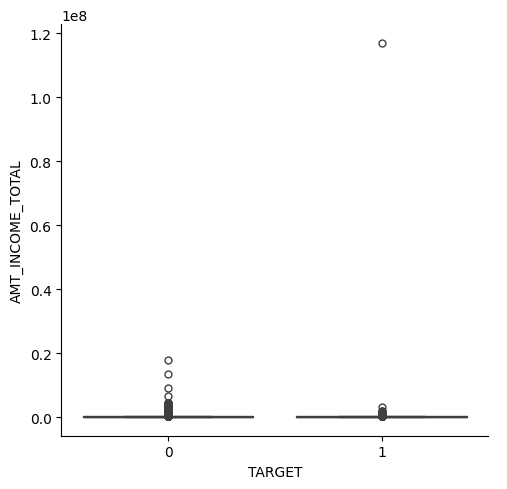

In [23]:
box_plot("AMT_INCOME_TOTAL")

OBSERVATIONS
We can observe from the above plot that there are outliers, corresponding to both TARGET = 0 and TARGET = 1.
In TARGET = 1 there is one extreme value , it is advisable to drop this outlier.
AMT_INCOME_TOTAL column is a continuous variable column, therefore we can bin the values without it affecting our analysis.

 Binning the AMT_INCOME_TOTAL data

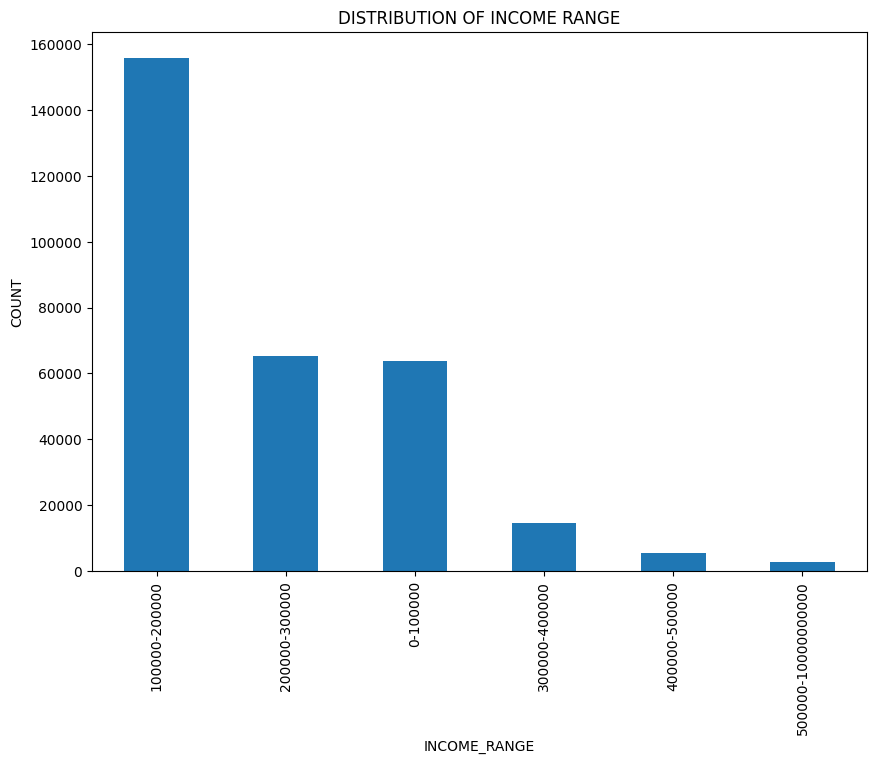

In [24]:
plt.figure(figsize=[10,7])
inp0["AMT_INCOME_TOTAL_Range"] = pd.cut(inp0["AMT_INCOME_TOTAL"], bins= [0,100000,200000,300000,400000,500000,10000000000], labels = ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-10000000000"]).value_counts().plot(kind = "bar")
plt.xlabel("INCOME_RANGE")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF INCOME RANGE")
plt.show()

OBSERVATIONS:
We can observe that majority of the clients lie in 100000-200000 income range, followed by 200000-300000, followed by 0-100000 etc.

 BoxPlot for AMT_CREDIT

<Figure size 1000x500 with 0 Axes>

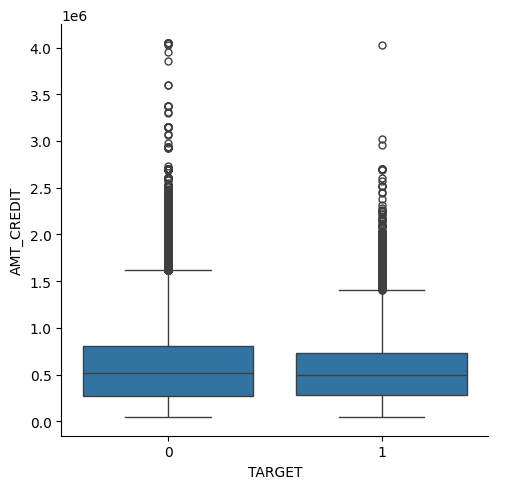

In [25]:
box_plot("AMT_CREDIT")

OBSERVATIONS
As we observed previously, AMT_CREDIT is also continuous variable column, therefore we can bin the values without it affecting our analysis.

 Binning the AMT_CREDIT data

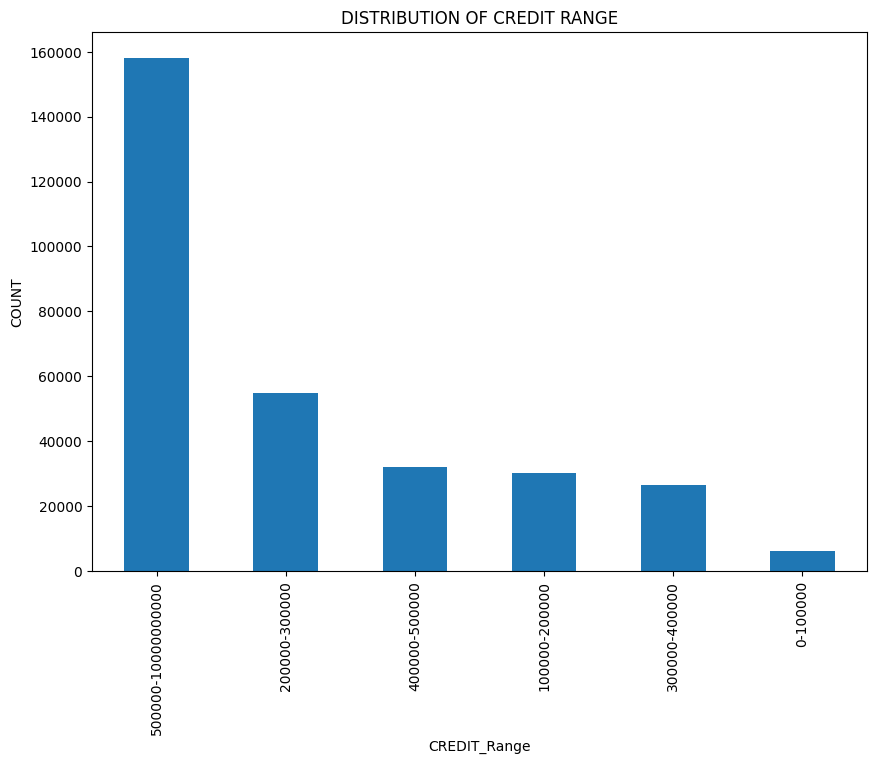

In [26]:
plt.figure(figsize=[10,7])
inp0["AMT_CREDIT_Range"] = pd.cut(inp0["AMT_CREDIT"], bins= [0,100000,200000,300000,400000,500000,10000000000], labels = ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-10000000000"]).value_counts().plot(kind = "bar")
plt.xlabel("CREDIT_Range")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF CREDIT RANGE")
plt.show()

OBSERVATIONS
Most if the clients lie in the credit range of 500000-Highest credit value, followed by 200000-300000, and 400000-500000

BoxPlot for AMT_ANNUITY

<Figure size 1000x500 with 0 Axes>

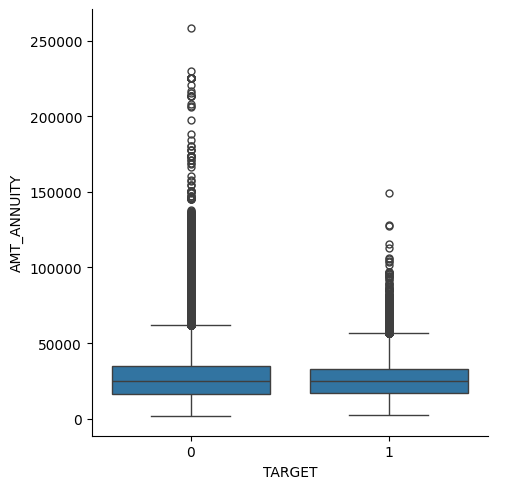

In [27]:
box_plot("AMT_ANNUITY")

OBSERVATIONS
AMT_ANNUITY is a continuous variable column as well, therefore we can proceed by binning the values.
We can't just impute the values like mean/median, as this may deviate the result of our analysis.

BoxPlot for AMT_GOODS_PRICE

<Figure size 1000x500 with 0 Axes>

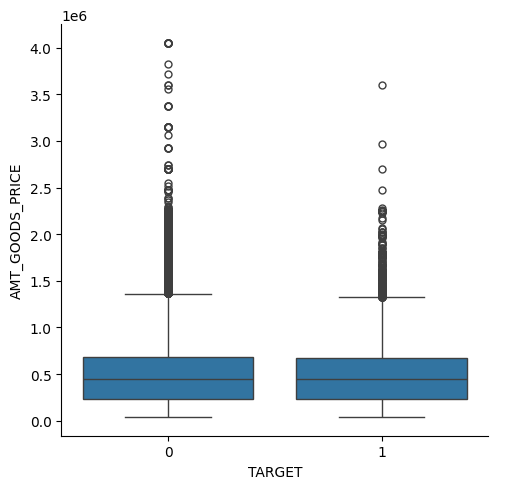

In [28]:
box_plot("AMT_GOODS_PRICE")

OBSERVATIONS
AMT_GOODS_PRICE is a continuous variable column as well, therefore we can proceed by binning the values.
We can't just impute the values like mean/median, as this may deviate the result of our analysis.

BoxPlot for DAYS_EMPLOYED

<Figure size 1000x500 with 0 Axes>

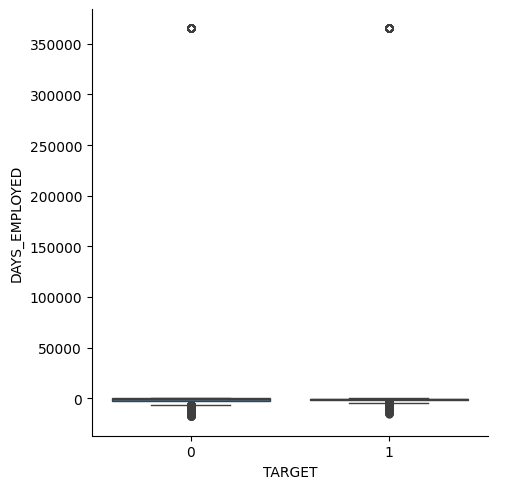

In [29]:
box_plot("DAYS_EMPLOYED")

OBSERVATIONS
We can observe that extreme outliers are present in the DAYS_EMPLOYED column.
The data seems to be incorrect as it is impossible that days employed for a client is 350000 which is approximately equal to 958 years.
Outliers are present due to errors made while entering the values.
We have to observe the count of the outliers, if there are more number of such observations then it is better to remove the column, and if there are only a few outliers spotted, then we can impute the outliers value with median value.

BoxPlot for AMT_GOODS_PRIZE

<Figure size 1000x500 with 0 Axes>

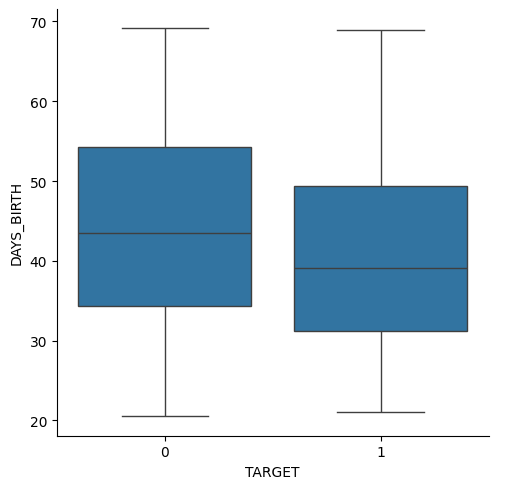

In [30]:
box_plot("DAYS_BIRTH")

OBSERVATIONS:
The above data has been converted from days to years.
It is clearly evident that no outliers are present in the DAYS_BIRTH data.
Since the median and IQR is lower for TARGET=1 , we can conclude that younger clients are more likely to default

 BoxPlot for AMT_GOODS_PRICE

<Figure size 1000x500 with 0 Axes>

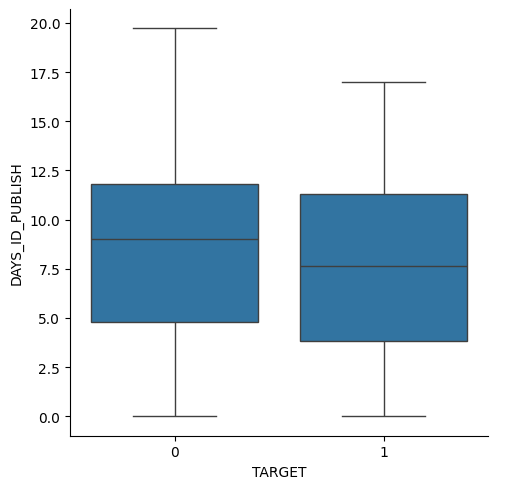

In [31]:
box_plot("DAYS_ID_PUBLISH")

OBSERVATIONS
It is clearly evident that no outliers are present in the DAYS_ID_PUBLISH data.

ANALYSING THE APPLICATION DATA

 Checking the data imbalance

In [32]:
inp0.TARGET.value_counts(normalize= True) 

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

OBSERVATIONS:
The data is highly imbalanced, where 91.9% of 'TARGET' variable is 0 (other cases/no difficulty) and 8.1% of 'TARGET' variable is 1(difficulty in repaying)

 UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

Developing a function to perform efficient univariate analysis of categorical variables:

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot(inp0, attribute, hori=True, rot=False):
    variable = inp0[attribute].value_counts(normalize=True)
    variable_data_percentage = inp0.groupby(attribute)['TARGET'].mean()

    fig, axes = plt.subplots(1, 2 if hori else 2, figsize=(15, 7) if hori else (14, 20))
    
    # First plot: Distribution of applicants
    sns.barplot(x=variable.index, y=variable.values, palette='magma', ax=axes[0])
    axes[0].set_xlabel(attribute)
    axes[0].set_ylabel("Percentage of Applicants")
    if rot:
       axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

    # Second plot: Loan repayment difficulty
    sns.barplot(x=variable_data_percentage.index, y=variable_data_percentage.values, palette='magma', ax=axes[1])
    axes[1].set_xlabel(attribute)
    axes[1].set_ylabel("Percentage of clients having difficulty in repaying loan")
    if rot:
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

    plt.show()

 BarPlots for NAME_CONTRACT_TYPE

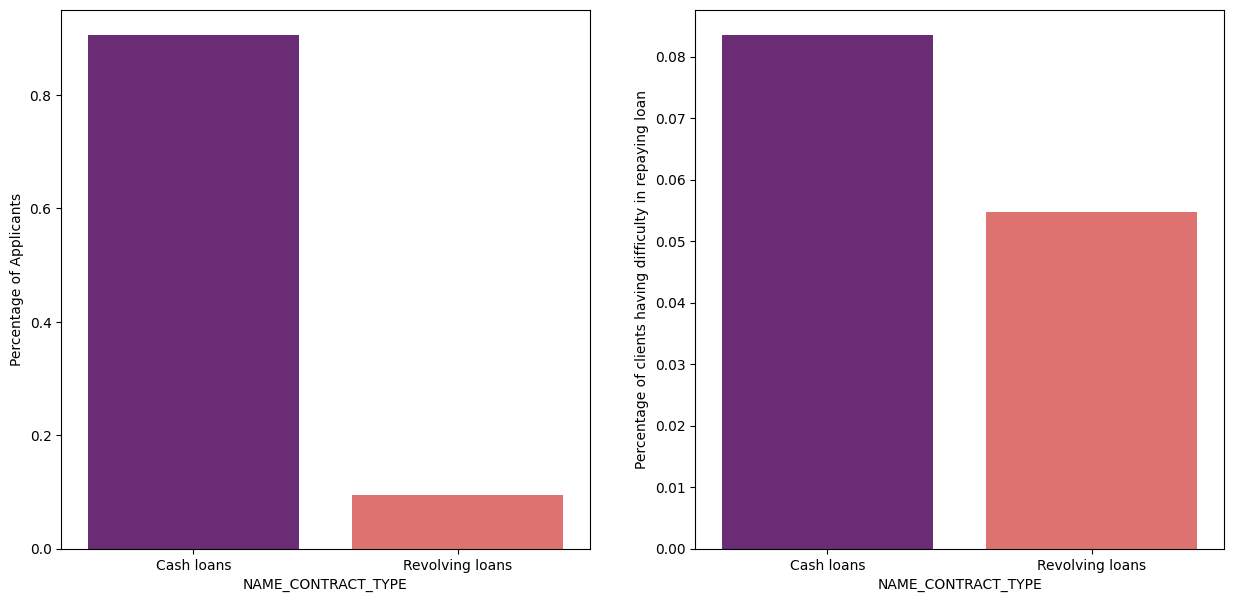

In [34]:
bar_plot(inp0,"NAME_CONTRACT_TYPE")

From the above plots the following inferences can be made:
Mao default.jor portion of the clients have opted for Cash loans(Approximately 85-90%), whereas 10-15% have opted for Revolving loans.
The mean for Cash loans is approximately 8.5%, whereas for revolving loans it is approximately 5.5%. This shows that the clients who have opted for cash loans are more likely to default.

BarPlots for CODE_GENDER

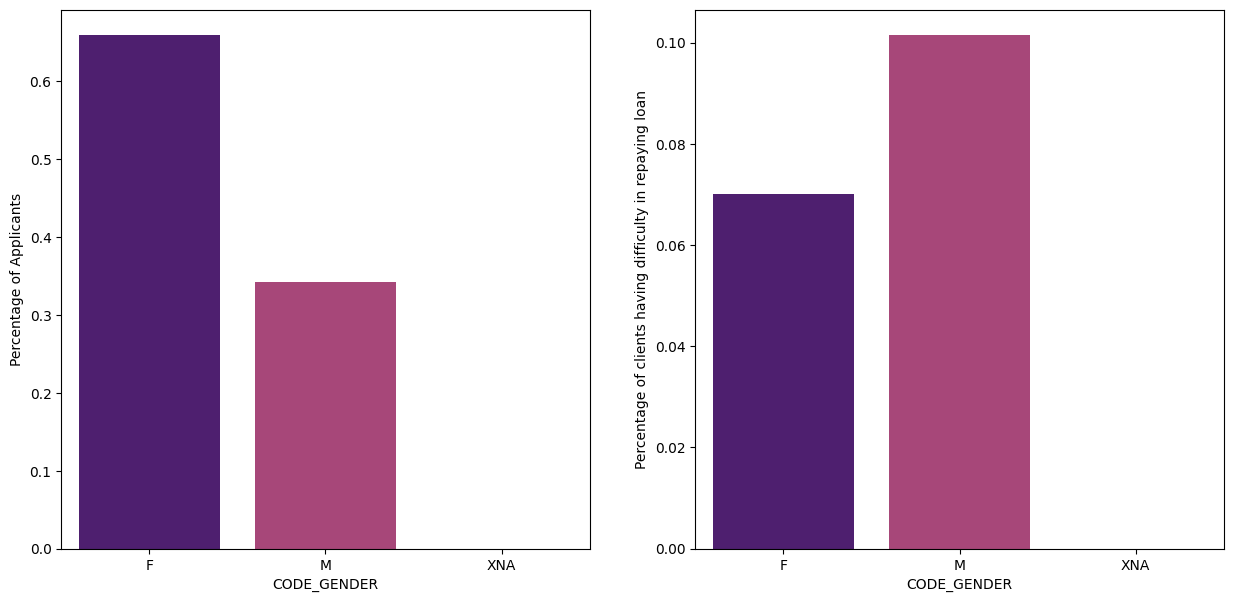

In [35]:
bar_plot(inp0,'CODE_GENDER')

 From the above plots the following inferences can be made:
There are considerably more female clients (approximately 65%) than male clients (approximately 35%)
Male clients are more likely to default (approximately 10%) when compared to female clients (approximately 7%)

BarPlots for FLAG_OWN_CAR

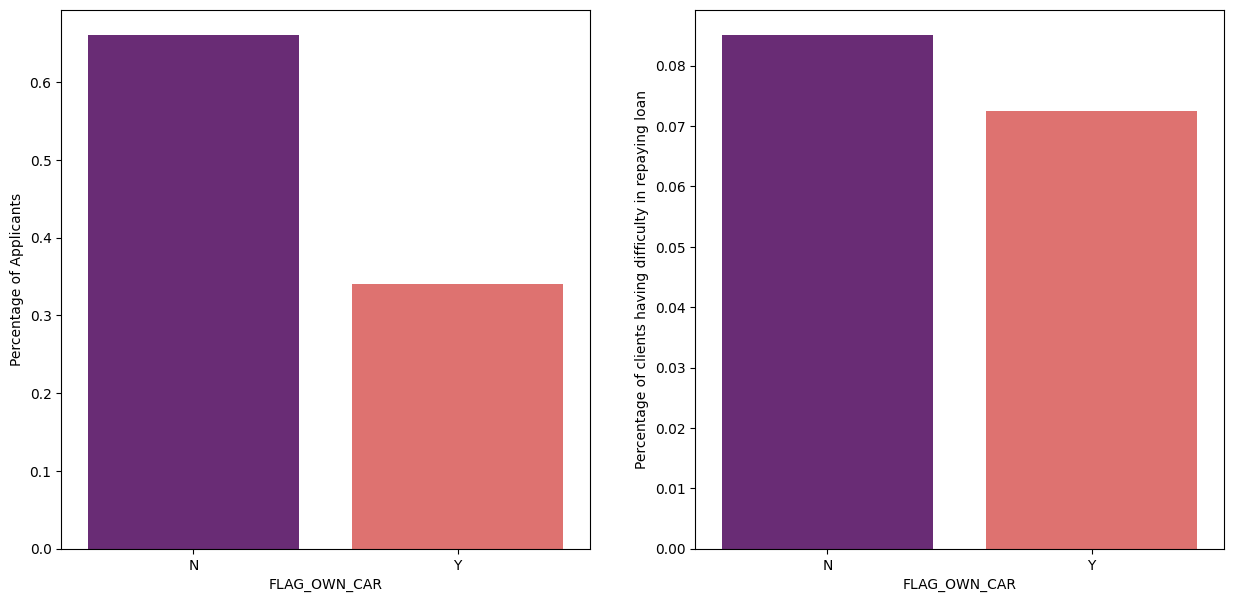

In [36]:
bar_plot(inp0,"FLAG_OWN_CAR")

 From the above plots the following inferences can be made:
Majority of the loan clients do not own a car (approximately 65-70%), whereas approximately 30-35% of them own one or more cars.
The clients who do not own a car are more likely to default (approximately 8.5%) than the clients who own one or more cars (approximately 7%)

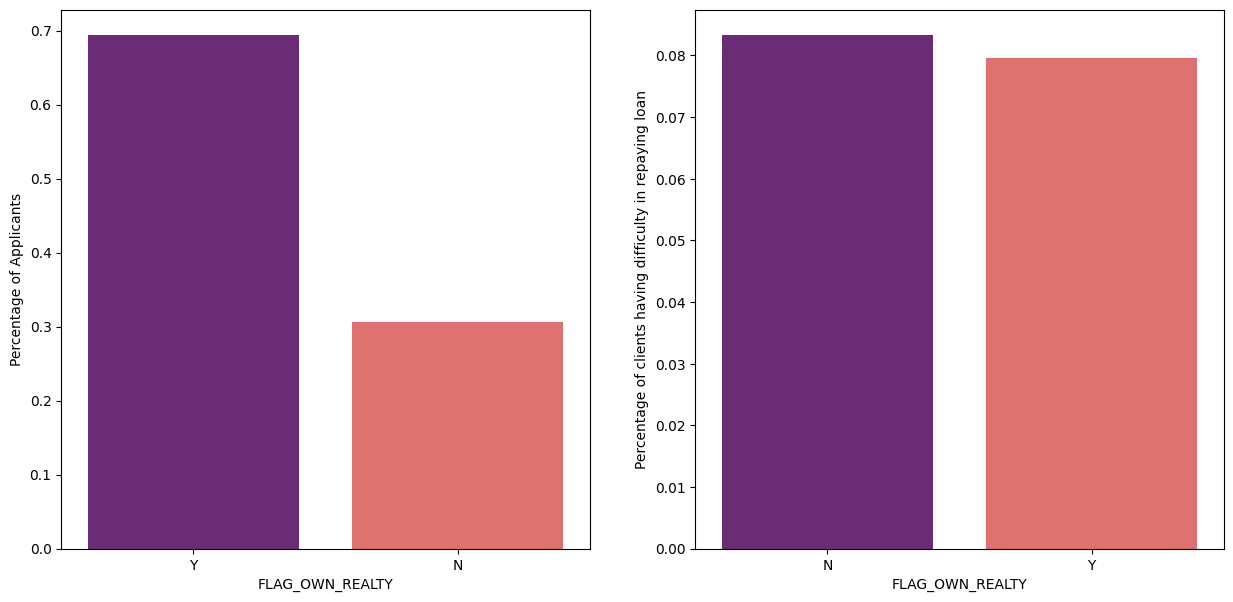

In [37]:
bar_plot(inp0,"FLAG_OWN_REALTY")

From the above plots the following inferences can be made:
Majority of the clients own realty (approximately 70%), whereas approximately 30% of them do not own realty.
Surprisingly the clients who own realty have a higher chance of not returning their loans (approximately 5.5%) as opposed to clients who do not own realty (approximately 2.5%)

  BarPlots for CNT_CHILDREN

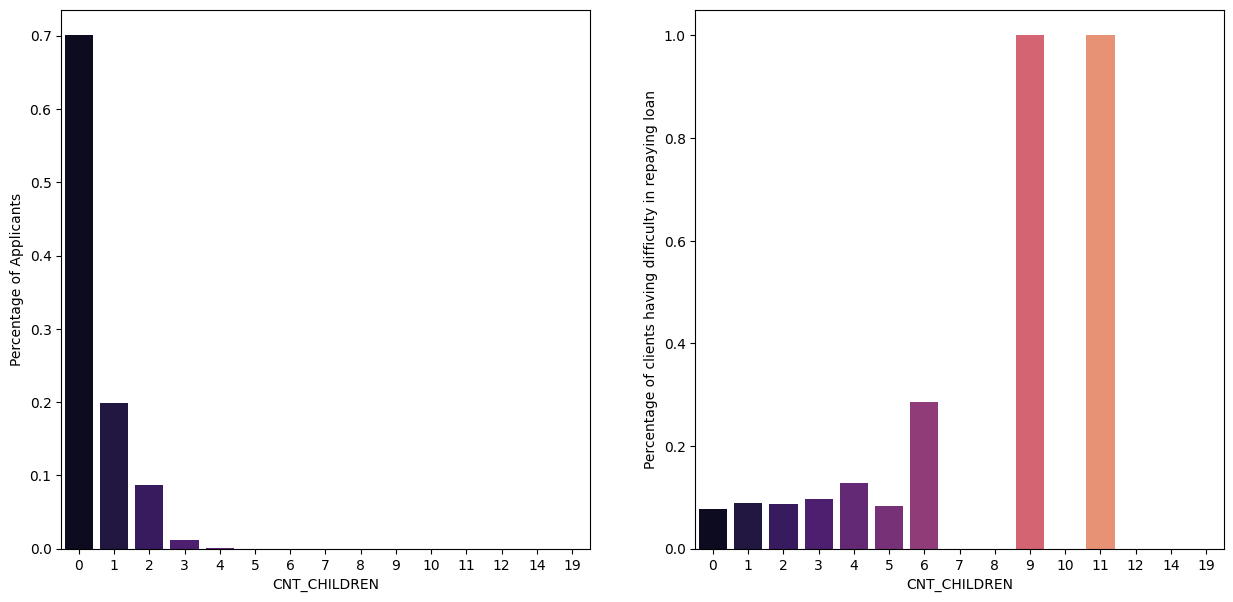

In [38]:
bar_plot(inp0,"CNT_CHILDREN")

From the above plots the following inferences can be made:
Majority of the clients do not have children (approximately 70%), and about 20% of the applicants have 1 child and less than 10% of the clients have 2 children.
Looks like the chances of not repaying the loan increases with the number of children the clients has. And the clients who have 9 or 11 children have approximately 100% chance of defaulting.

 BarPlots for NAME_TYPE_SUITE

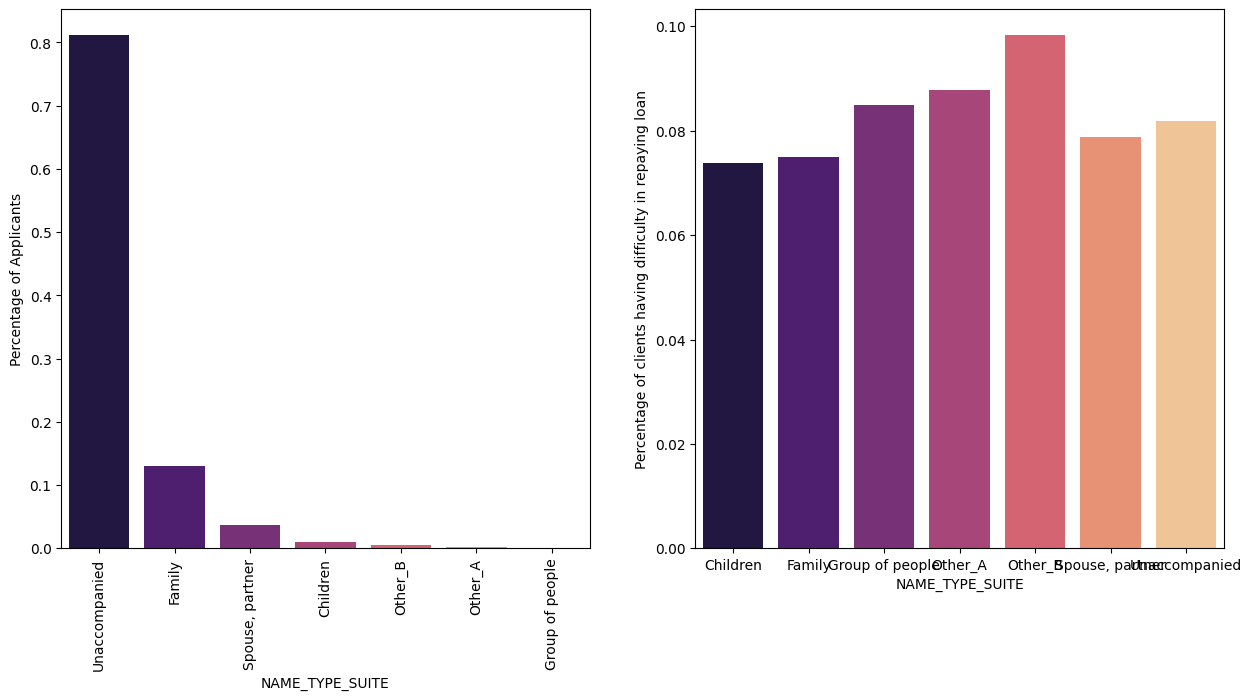

In [39]:
bar_plot(inp0,"NAME_TYPE_SUITE", rot = True)

From the above plots the following inferences can be made:
Most of the clients were unaccompanied while applying for the loan (~80%), about 10-15% of the clients were with their families while applying, about 5% of them were accompanied by their spouse.
Approximately all these categories have the same default rate, therefore the people who accompany the client while applying for the loan does not play a big role in deciding whether he/she defaults the loan.

 BarPlots for NAME_INCOME_TYPE

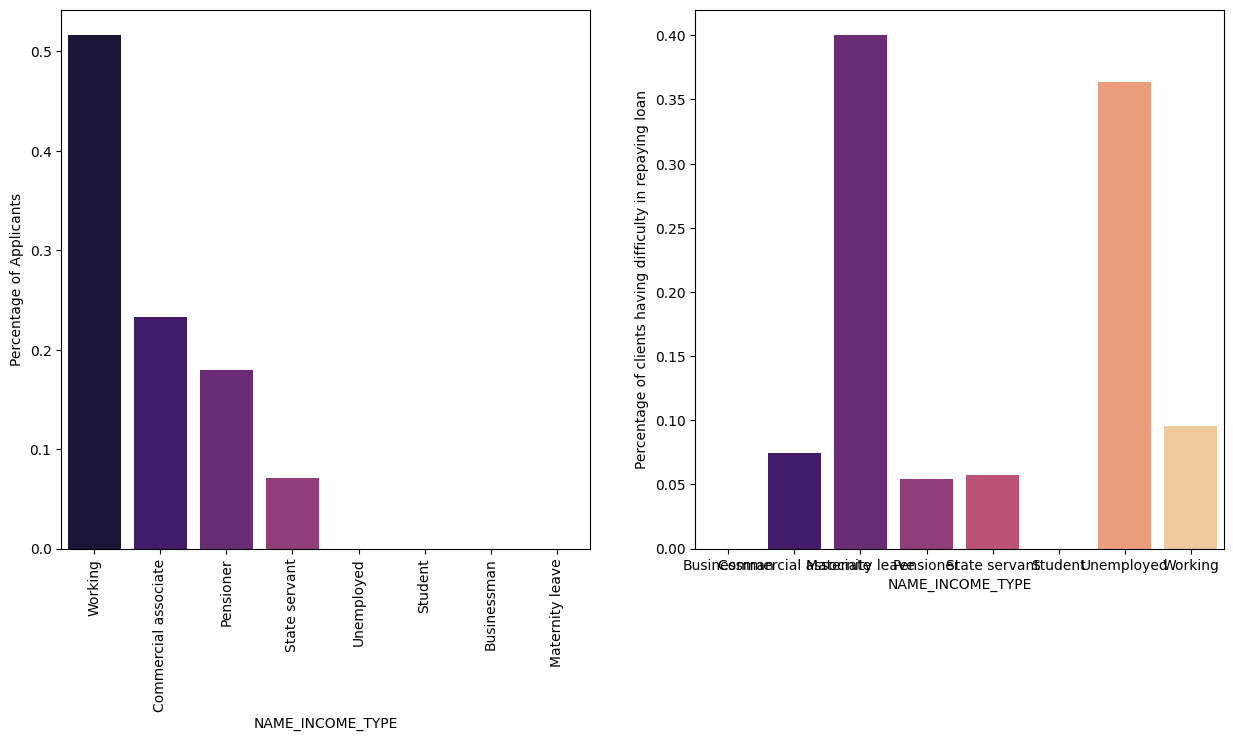

In [40]:
bar_plot(inp0,"NAME_INCOME_TYPE", rot = True)

From the above plots the following inferences can be made:
More than half of the clients are working, about 20-25% are commercial associates, nearly 20% are pensioners and nearly 10% are state servants.
Clients who are on maternity leave and unemployed clients are most likely to default (approximately 35-40%), the remaining income types have around 10% chance of defaulting.


 BarPlots for NAME_EDUCATION_TYPE

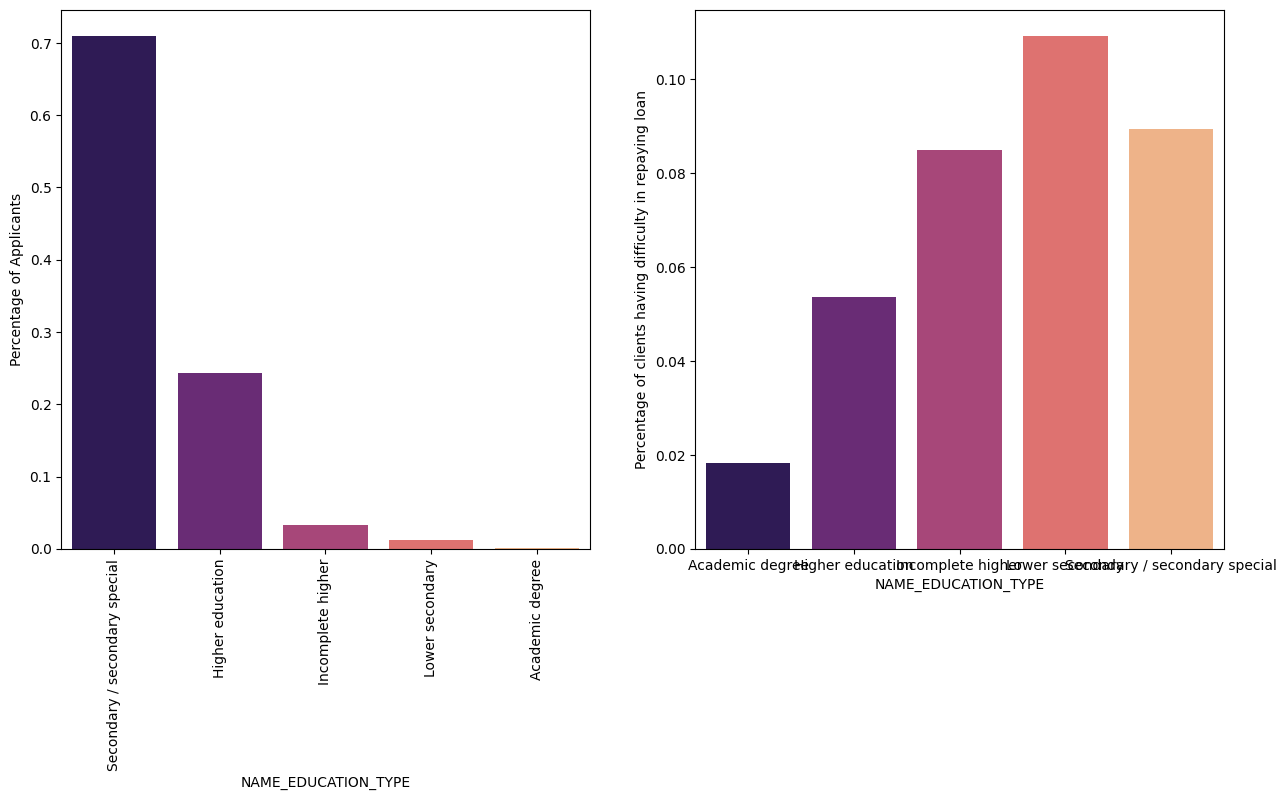

In [41]:
 bar_plot(inp0,"NAME_EDUCATION_TYPE", rot = True)

From the above plots the following inferences can be made:
Majority of the clients have completed Secondary education (~70%), followed by clients who have completed higher education (about 25%), followed by incomplete higher education and lower secondary education.
Clients who have have completed lower secondary education are most likely to default (around 10%), followed by incomplete higher (around 8%) and secondary education (around 8%), and the clients who have an academic degree are least likely to default (nearly 2%)

BarPlots for NAME_FAMILY_STATUS

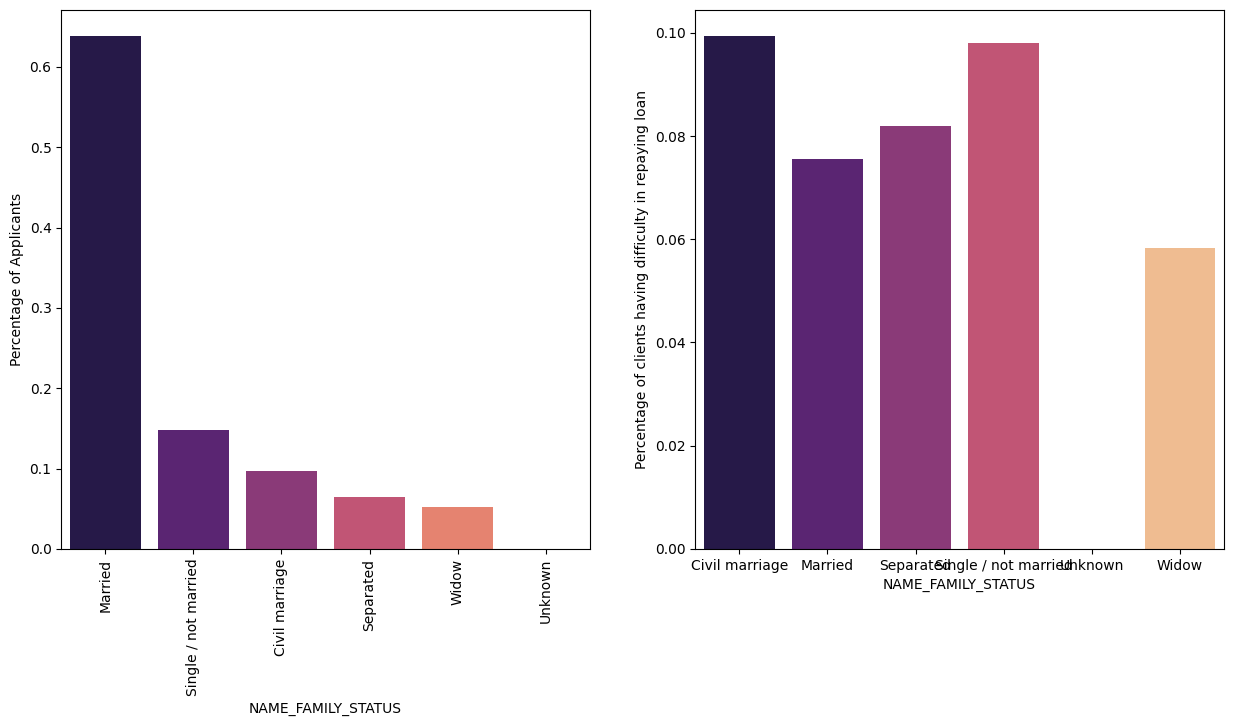

In [42]:
bar_plot(inp0,"NAME_FAMILY_STATUS", rot = True)

From the above plots the following inferences can be made:
More than half of the clients are married (~60%), about 15% of the clients are not married, and about 10% of the clients have undergone civil marriage followed by separated and widows.
Single clients and clients who have undergone civil marriage are mosy likely to defualt (nearly 10%), followed by separated and married clients (approximately 8%) and widows have the least default rate of around 6%

 BarPlots for NAME_HOUSING_TYPE

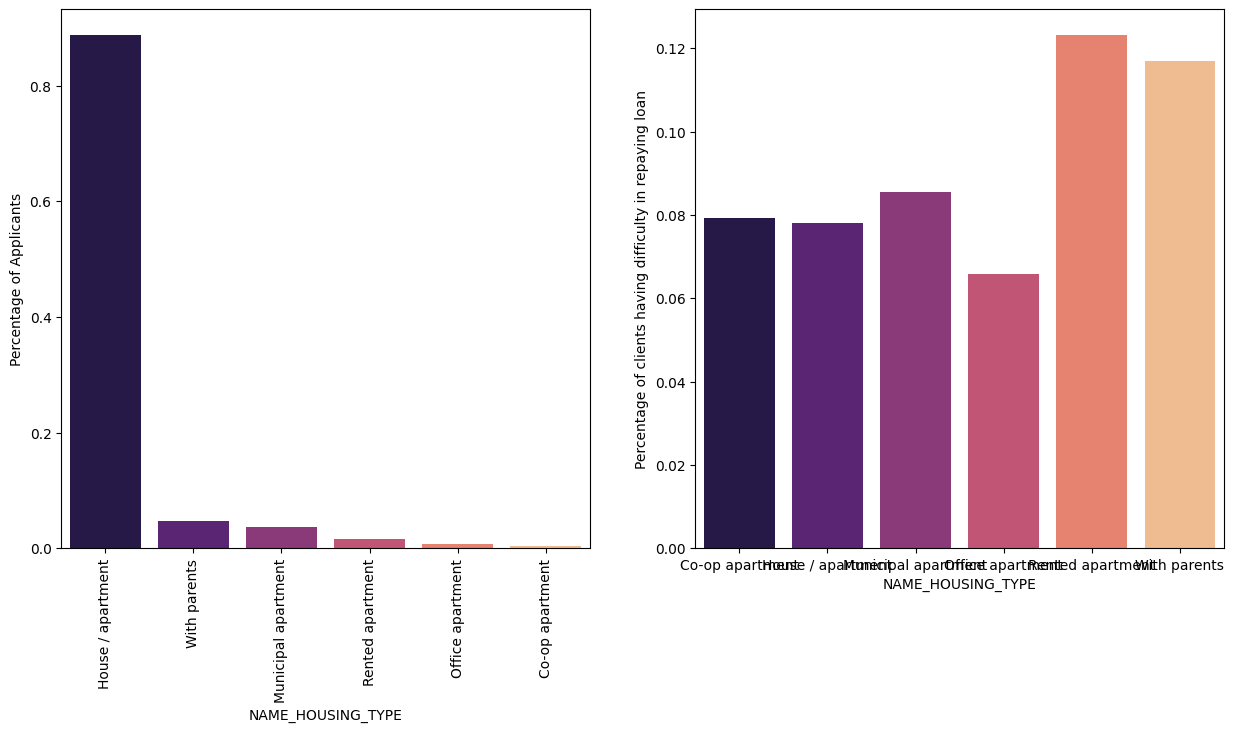

In [43]:
bar_plot(inp0,"NAME_HOUSING_TYPE", rot = True)

From the above plots the following inferences can be made:
Almost 90% of the clients live in a House/apartment, followed by living with parents, municipal apartment etc.
Clients who live in a rented apartment have the highest default rate of around 12%, followed by clients living with parents (almost 12%), followed by municipal apartments etc

BarPlots for ORGANIZATION_TYPE

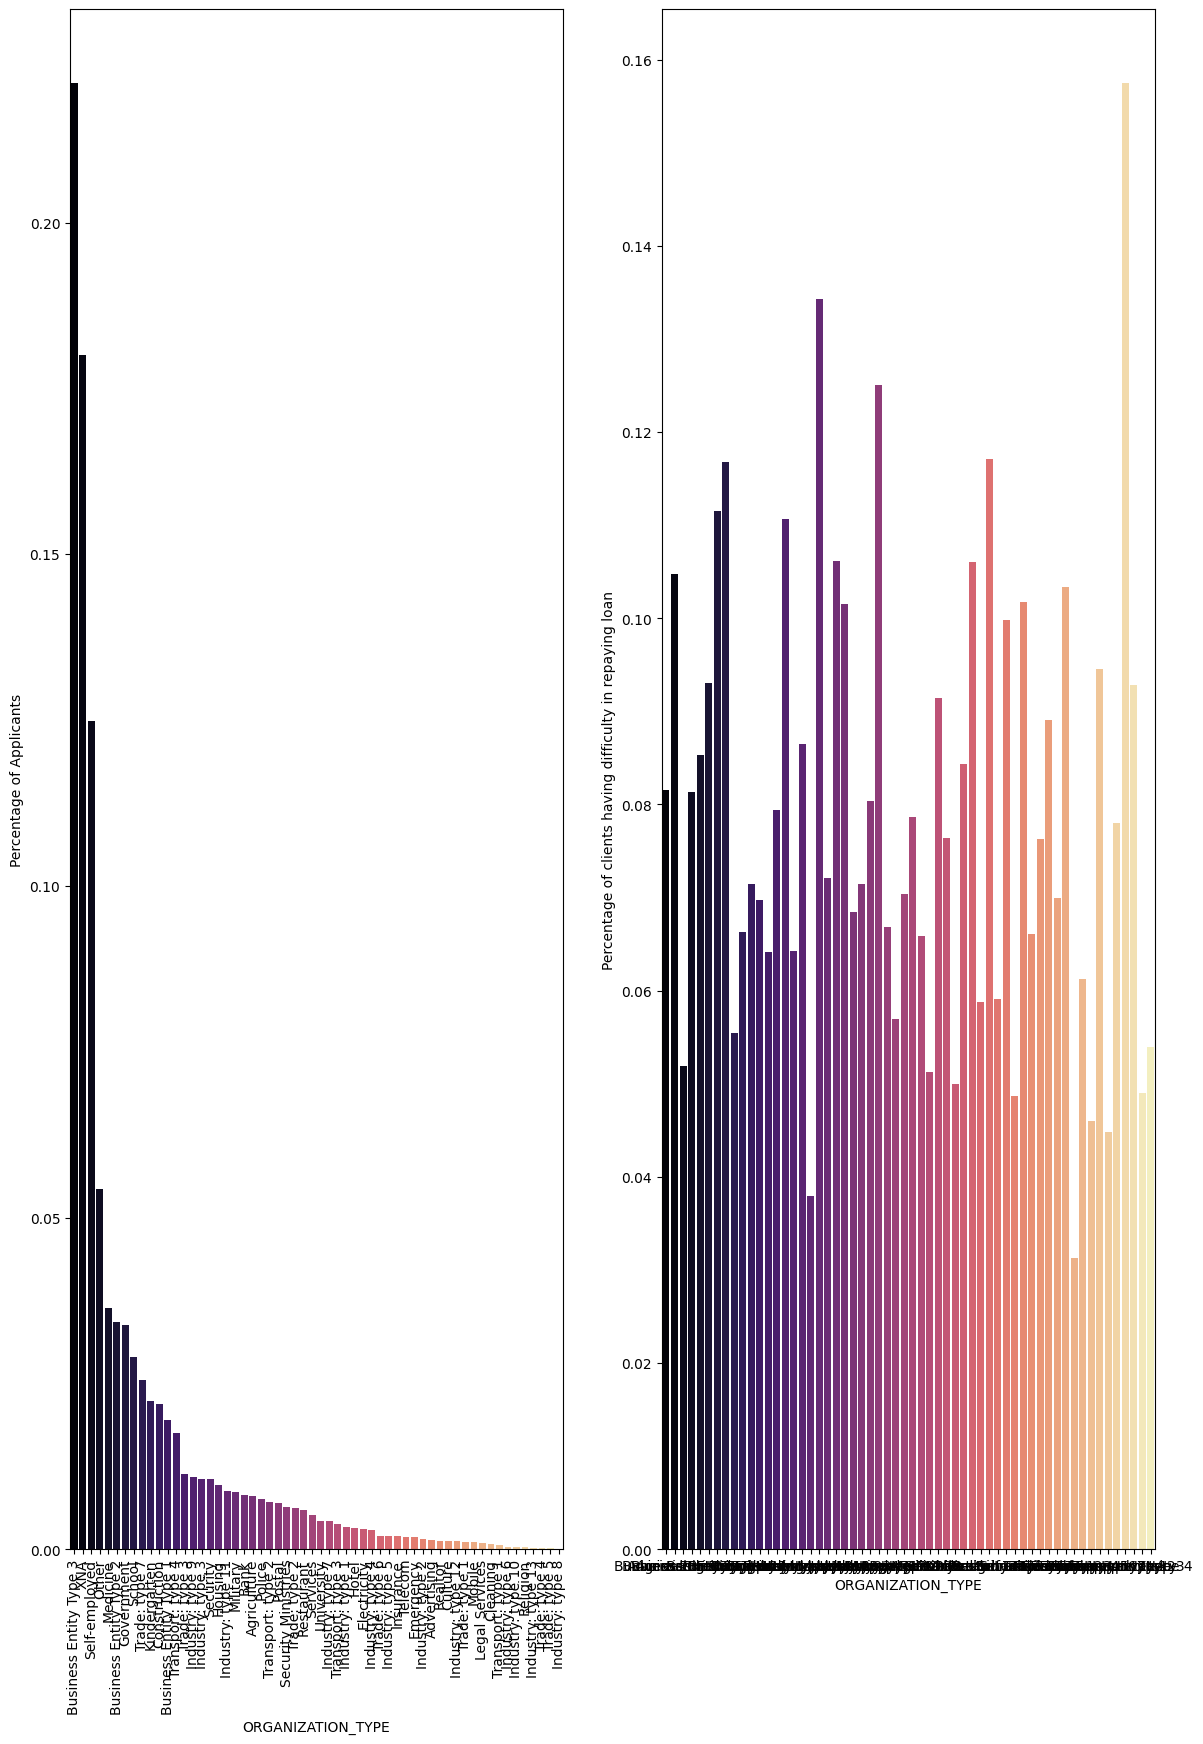

In [44]:
bar_plot(inp0,"ORGANIZATION_TYPE",hori=False, rot = True)

From the above plots the following inferences can be made:
Most of the clients belong to Business Entity Type-3 (arount 20%), followed by self employed ( around 12%) etc.
As we can see Transport type 3 has the highest default rate of nearly 16%, followed by Industry type 13 (around 13%) and Industy type 8 (around 12%).

 BarPlots for CNT_FAM_MEMBERS

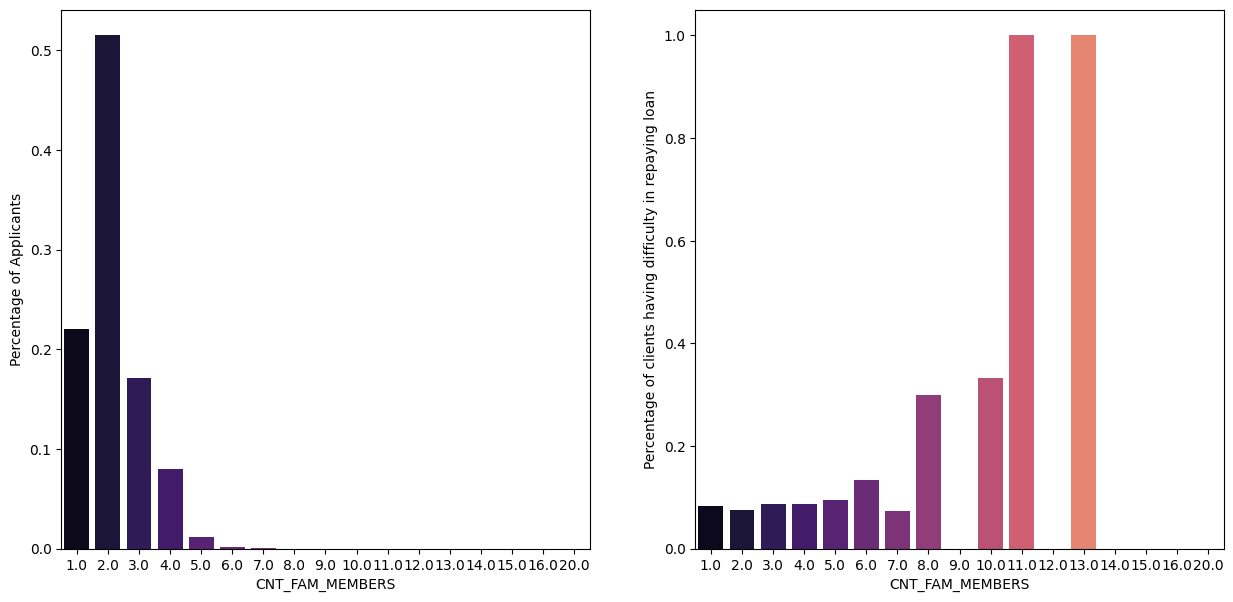

In [45]:
bar_plot(inp0,"CNT_FAM_MEMBERS")

From the above plots the following inferences can be made:
Clients with family members of 2 are the top category (approximately 50%), followed by 1 (single people), 3 ( probably families with 1 child) and 4 family members.
Looks like the default rate increases with the increase in family members, also clients with 11 and 13 family members have 100% default rate

BarPlots for OCCUPATION_TYPE

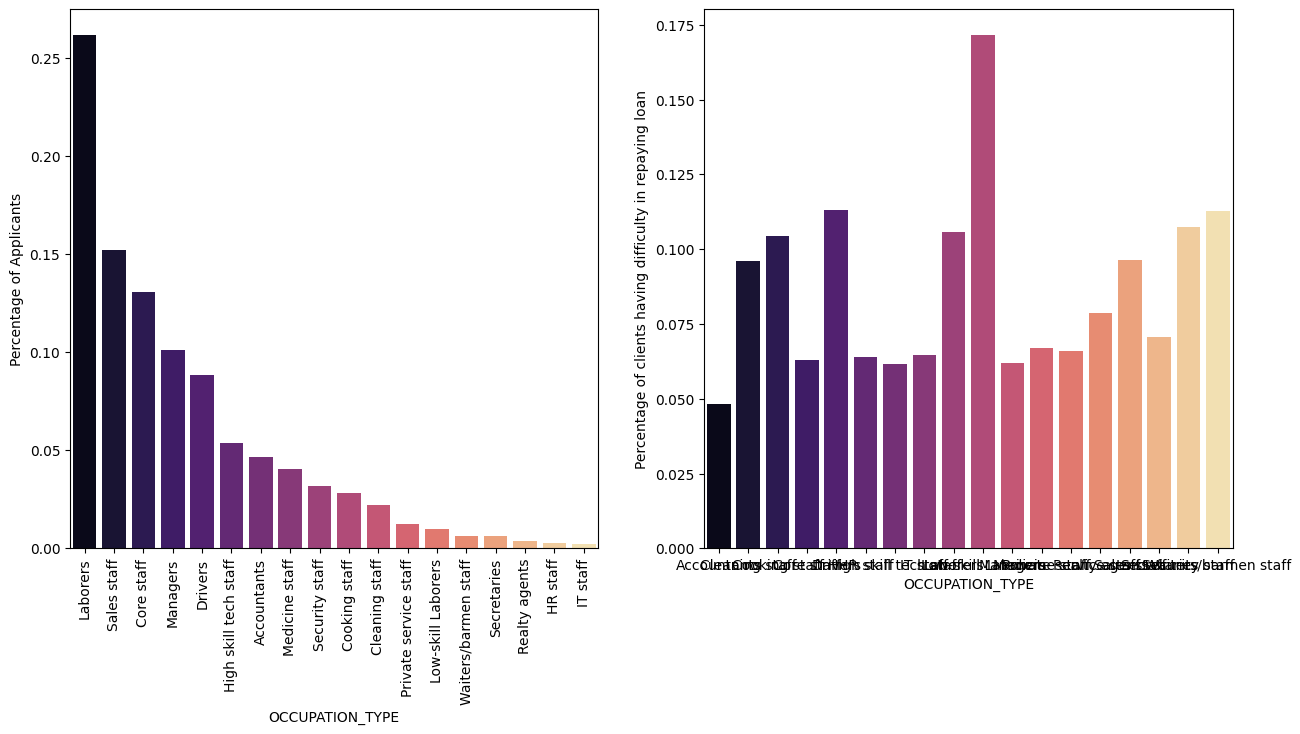

In [46]:
bar_plot(inp0,"OCCUPATION_TYPE", rot = True)

From the above plots the following inferences can be made:
Most of the clients are Laborers(approximatey 25%), followed by Sales staff, Core staff, Managers etc. IT staff take the least number of loans.
Low-skill labourers have the highest default rate, followed by Drivers, Waiters/barmen staff, Security staff, Laborers, Cooking staff, sales staff, cleaning staff etc.

Univariate analysis of continuous variables

Segmenting the data based on the TARGET variable

In [47]:
target_0 = inp0.loc[inp0['TARGET'] == 0]
target_1 = inp0.loc[inp0['TARGET'] == 1]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot(df, attribute, target_column='TARGET'):
    plt.figure(figsize=[15, 7])

    # Overall KDE Plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[attribute], fill=True, color='purple')
    plt.xlabel(attribute)
    plt.ylabel("Density")
    plt.title(f"Overall Distribution of {attribute}")

    # KDE Plot for TARGET 0 vs TARGET 1
    plt.subplot(1, 2, 2)
    target_0 = df[df[target_column] == 0][attribute]
    target_1 = df[df[target_column] == 1][attribute]

    sns.kdeplot(target_0, fill=True, label='TARGET = 0', color='blue', alpha=0.5)
    sns.kdeplot(target_1, fill=True, label='TARGET = 1', color='red', alpha=0.5)

    plt.xlabel(attribute)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Distribution of {attribute} by {target_column}")

    plt.show()

 DistPlots for AMT_CREDIT 

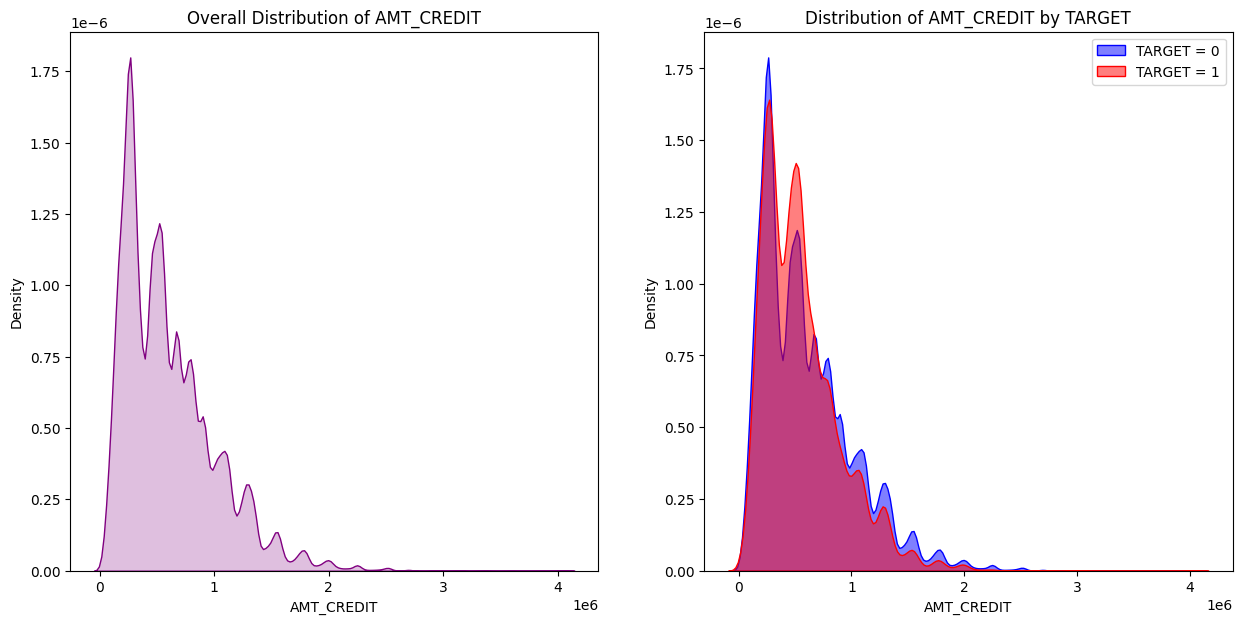

In [49]:
distribution_plot(inp0,'AMT_CREDIT')

From the above plots the following inferences can be made:
The credit amount of the loan lies mostly around 200000-1000000 for both, client with payment difficulties(TARGET=1) and all other cases(TARGET=0).

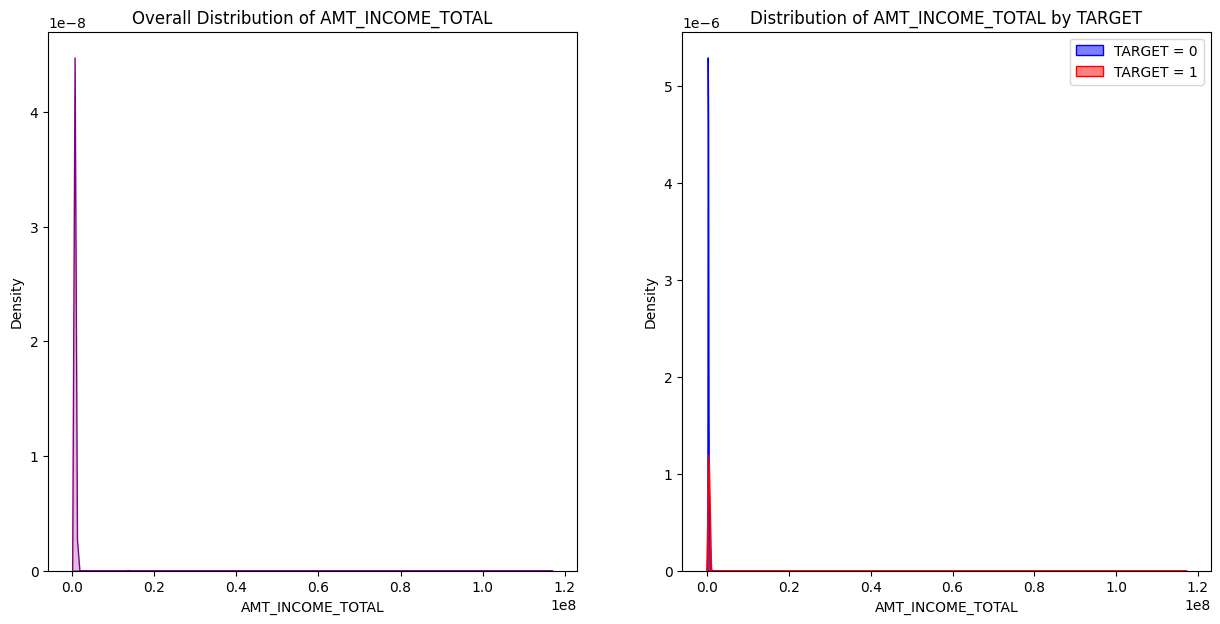

In [50]:
distribution_plot(inp0,'AMT_INCOME_TOTAL')

From the above plots the following inferences can be made:
The income of clients of both target types mostly lie at around 10000000. We can see some outliers as well.

 DistPlots for AMT_ANNUITY 

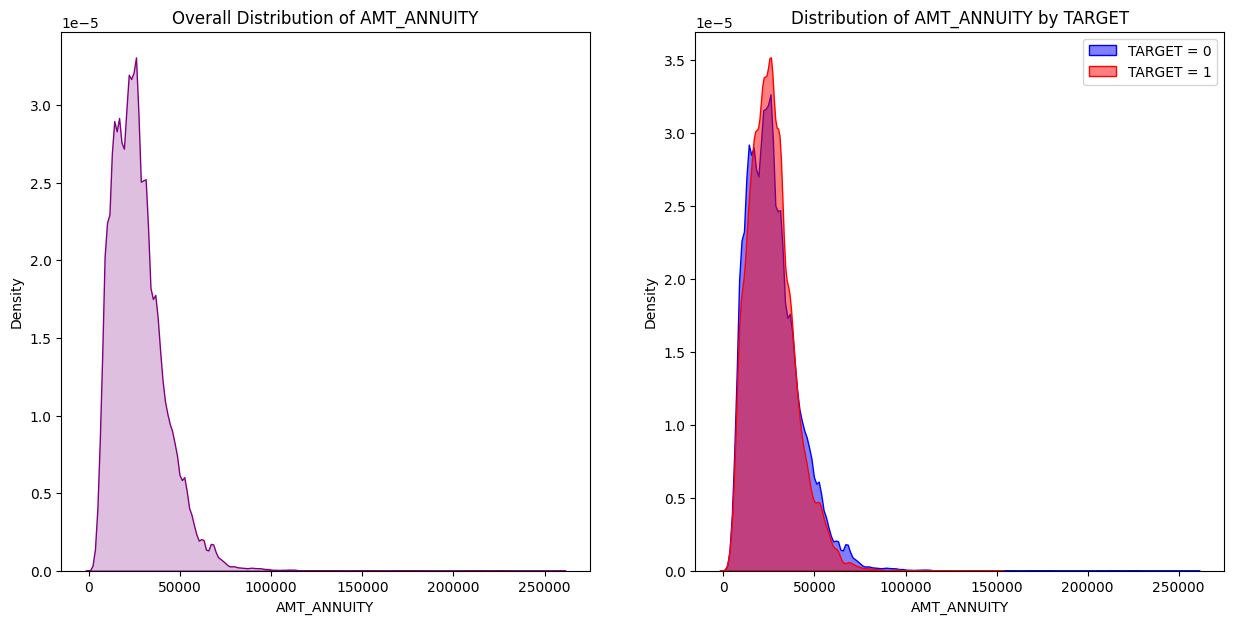

In [51]:
distribution_plot(inp0,'AMT_ANNUITY')

From the above plots the following inferences can be made:
The annuity amount seems to be similar for both target types, they are concentrated at around 50000.

DistPlots for AMT_GOODS_PRICE 

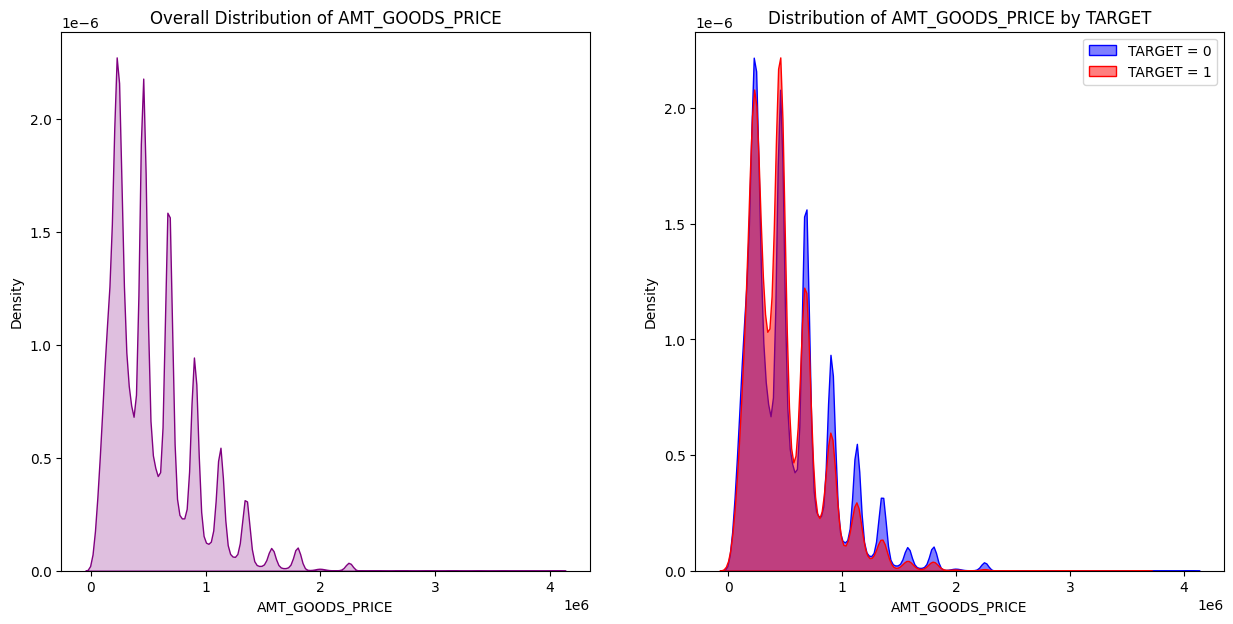

In [52]:
distribution_plot(inp0,"AMT_GOODS_PRICE")

From the above plots the following inferences can be made:
The goods for which the clients have received loan are mostly concentrated between 200000-1000000

DistPlots for DAYS_BIRTH 

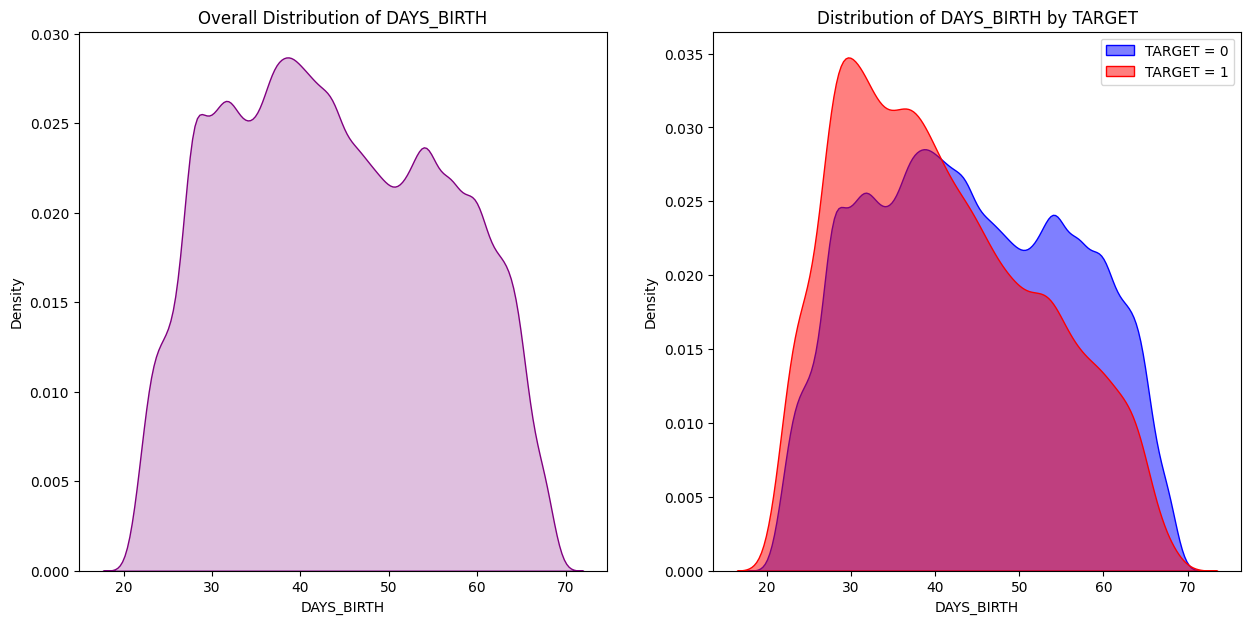

In [53]:
distribution_plot(inp0,"DAYS_BIRTH")

From the above plots the following inferences can be made:
We have converted the above plot from days to years for better analysis.
When we see the entire dataset inclusing both the target types we see that we have clients of all ages, with the most number of customers around 40 years old.
When we compare for the two target types, we see that the clients who have difficulty in payment are relatively younger and most of them lie at around 27 years old. Therefore the younger population have the highest default rate.

DistPlots for DAYS_EMPLOYED 

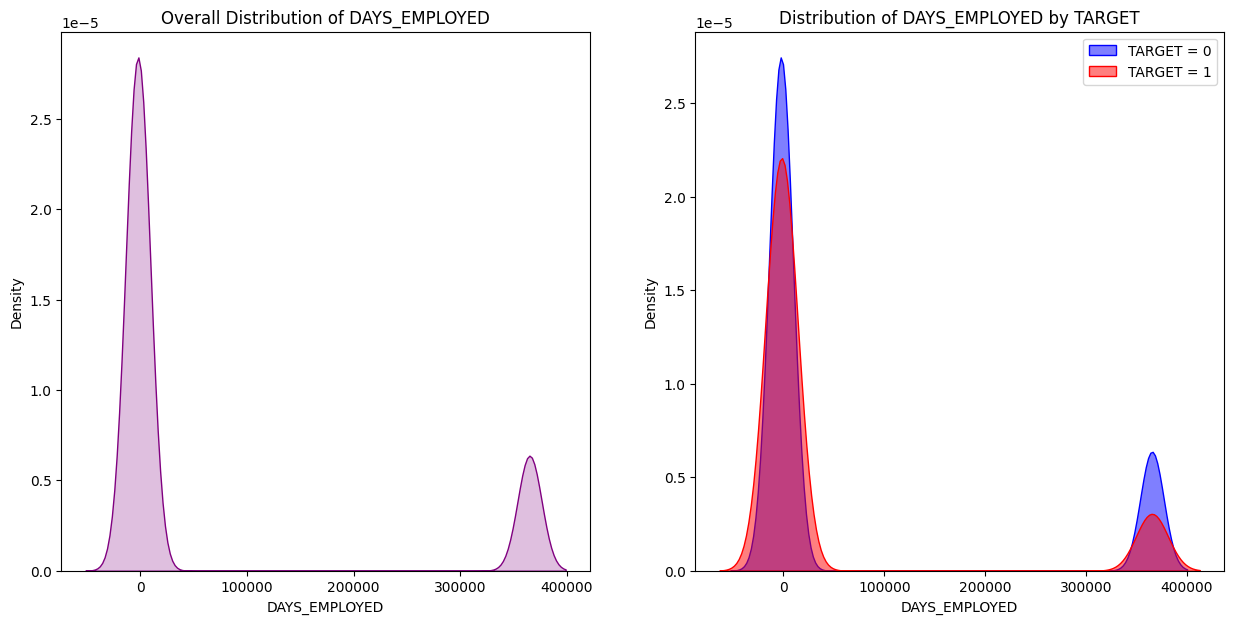

In [54]:
distribution_plot(inp0,"DAYS_EMPLOYED")

From the above plots the following inferences can be made:
This data seems to be unreliable due the large number of people who are employed for more than 100 years, and the negative values might suggest that those clients are unemployed.

 DistPlots for DAYS_REGISTRATION 

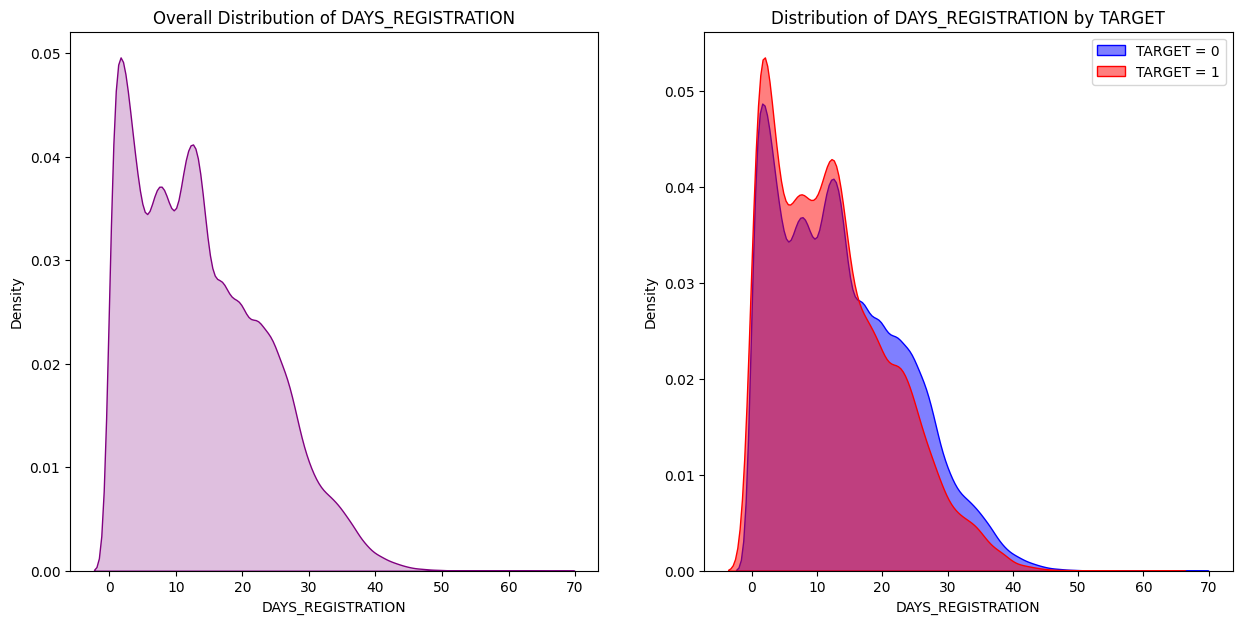

In [55]:
distribution_plot(inp0,'DAYS_REGISTRATION')

From the above plots the following inferences can be made:
The above data has been converted from days to years for better analysis.
Looks like majority of the clients changed their registration in the early stages.
The distribution is similar for both target types.

 DistPlots for DAYS_ID_PUBLISH 

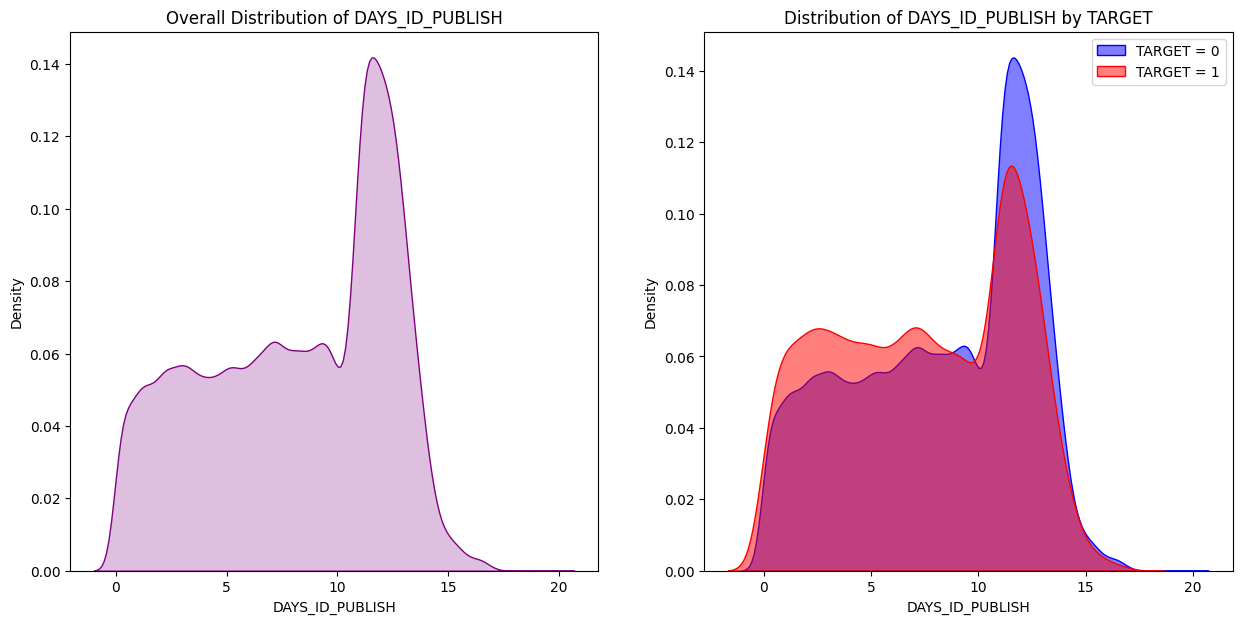

In [56]:
distribution_plot(inp0,"DAYS_ID_PUBLISH")

BIVARIATE ANALYSIS

NUMERICAL TO NUMERICAL ANALYSIS

In [57]:
inp_T1 = inp0[inp0["TARGET"] == 1]
inp_T0 = inp0[inp0['TARGET'] == 0]
data_numeric_corr_T0 = inp_T0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()
data_numeric_corr_T1 = inp_T1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr()

Heatmap to visualize the correlation between numeric variables for TARGET = 0 

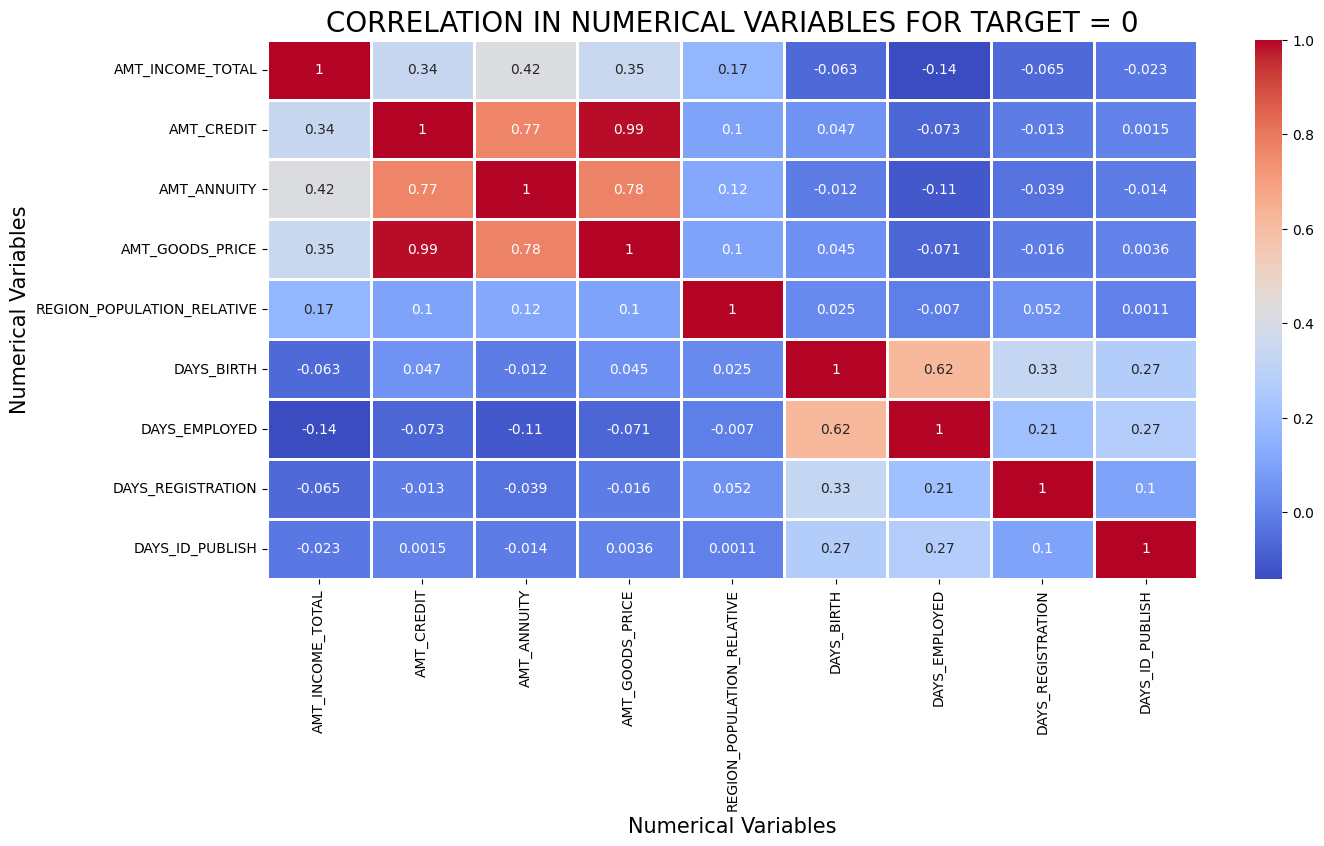

In [58]:
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T0, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 0",fontdict={"fontsize": 20} )
plt.show()

From the above heatmap(for TARGET=0) the following inferences can be made:
Credit amount and Goods price amount have the highest correlation of 0.99, which is fairly obvious since the client is opting for a loan equal to the price of his goods.
Annuity ammount and goods price amount have a correlation of 0.78. Since the annuity is decided by the price of the goods (credit amount).
Credit amount and annuity amount have a correlation of 0.77. As the annuity amount depends on the credit amount.
Income amount and annuity amount has a correlation of 0.42. Annuity might be decided based on the income of the client.
Correlation between the income amount and credit amount is pretty good (0.34) and also between annuity amount and income amount(0.42), might be the reasons why these clients are able to repay their loans.

Heatmap to visualize the correlation between numeric variables for TARGET = 1

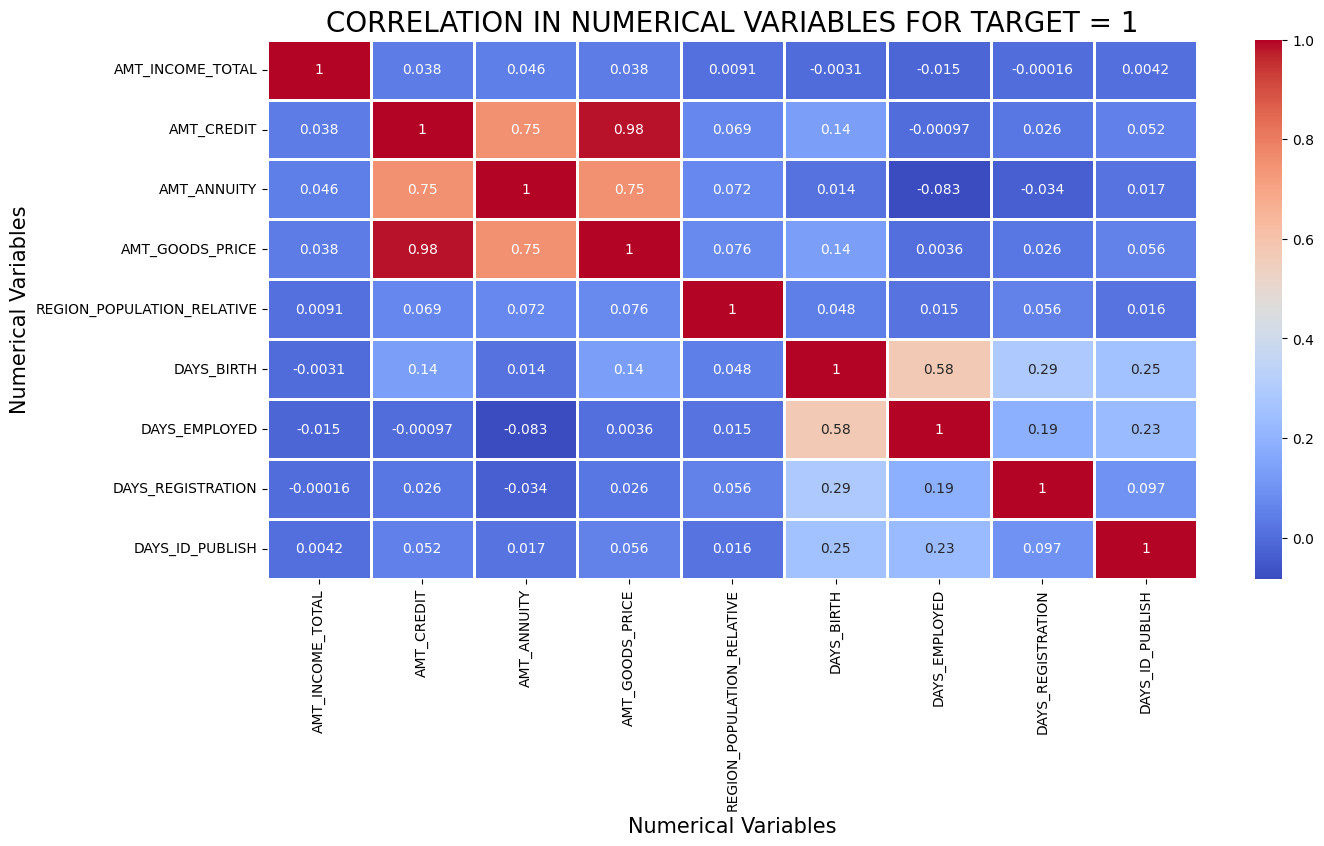

In [59]:
plt.figure(figsize = [15,7])
sns.heatmap(data_numeric_corr_T1, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 15})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 15})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 1",fontdict={"fontsize": 20} )
plt.show()

From the above heatmap(for TARGET=1) the following inferences can be made:
Credit amount and Goods price amount have the highest correlation of 0.98, which is fairly obvious since the client is opting for a loan equal to the price of his goods.
Annuity ammount and goods price amount have a correlation of 0.75. Since the annuity is decided by the price of the goods (credit amount).
Credit amount and annuity amount have a correlation of 0.75. As the annuity amount depends on the credit amount.
Correlation between the income amount and credit amount is very less (0.038) and also between annuity amount and income amount(0.046), might be the reasons for difficulty in repaying.

NUMERICAL TO CATEGORICAL ANALYSIS

In [60]:
def NUMCAT_ANALYSIS(CATVAR, NUMVAR, rot = False):
    
    plt.figure(figsize=[10,5])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = inp0, x=CATVAR, y= NUMVAR, hue = "TARGET")

 BoxPlots for NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL

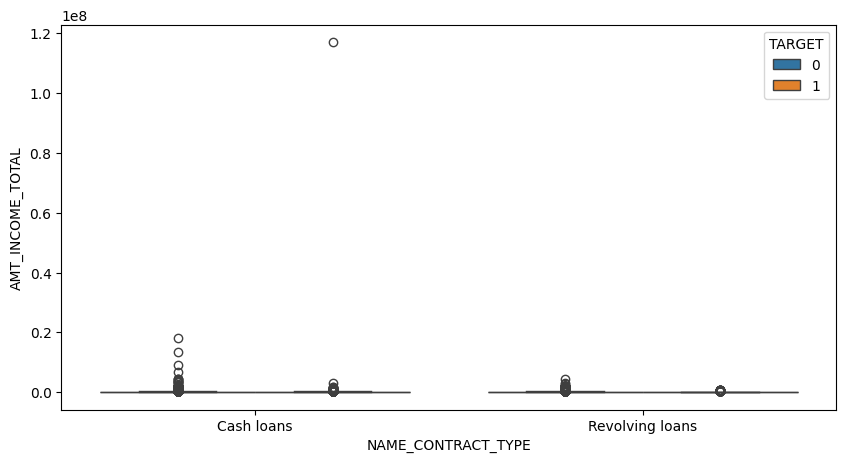

In [61]:
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL" )

From the above plots the following inferences can be made:
Due to the presence of an extreme outlier in the data cannot be visualized properly.
All the plots have outliers.

 BoxPlots for NAME_CONTRACT_TYPE vs AMT_CREDIT

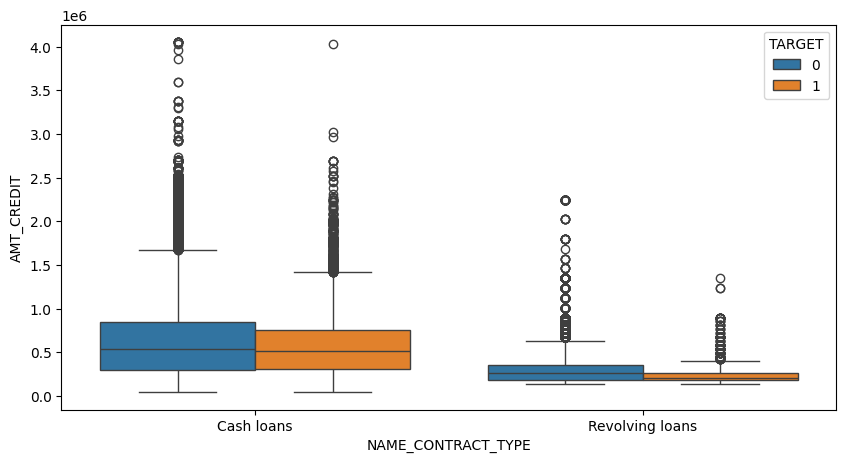

In [62]:
NUMCAT_ANALYSIS("NAME_CONTRACT_TYPE","AMT_CREDIT" )

From the above plots the following inferences can be made:
It is clearly evident that the credit amounts are higher for cash loans when compared to revolving loans
The credit amount is concentrated at the lower end of the IQR for TARGET=1, which suggests that most of the clients who have difficulty in repaying the loans have lesser credit amount.

 BoxPlots for CODE_GENDER vs AMT_CREDIT

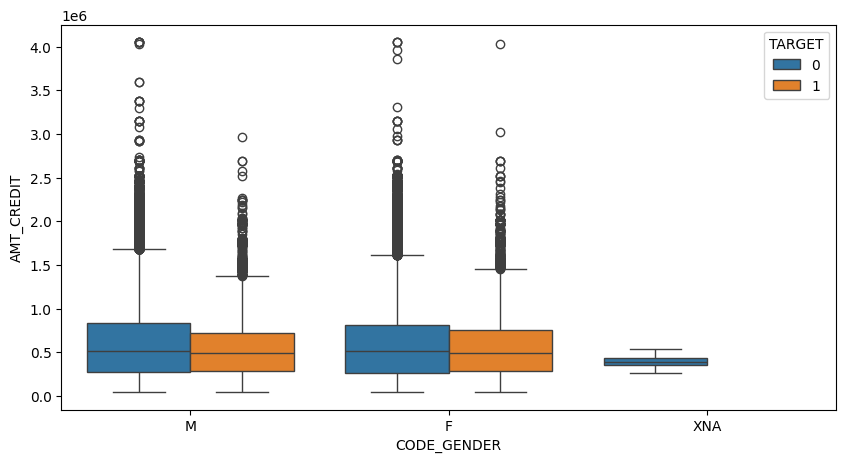

In [63]:
NUMCAT_ANALYSIS("CODE_GENDER", "AMT_CREDIT")

From the above plots the following inferences can be made:
The medians of all the boxlpots are similar and also the IQRs are also quite similar for both the genders.
This shows that the gender is not a huge factor for credit amount.

BoxPlots for FLAG_OWN_CAR vs AMT_CREDIT

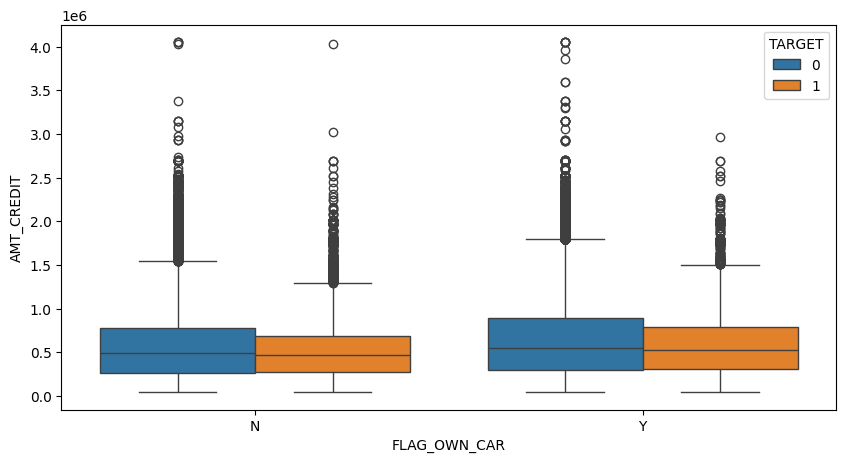

In [64]:
 NUMCAT_ANALYSIS("FLAG_OWN_CAR", "AMT_CREDIT")

From the above plots the following inferences can be made:
The medians of the boxplots are quite similar as well as the IQRs
This suggests that Owning a car does not have a big impact on the credit amount.

BoxPlots for FLAG_OWN_REALTY vs AMT_CREDIT

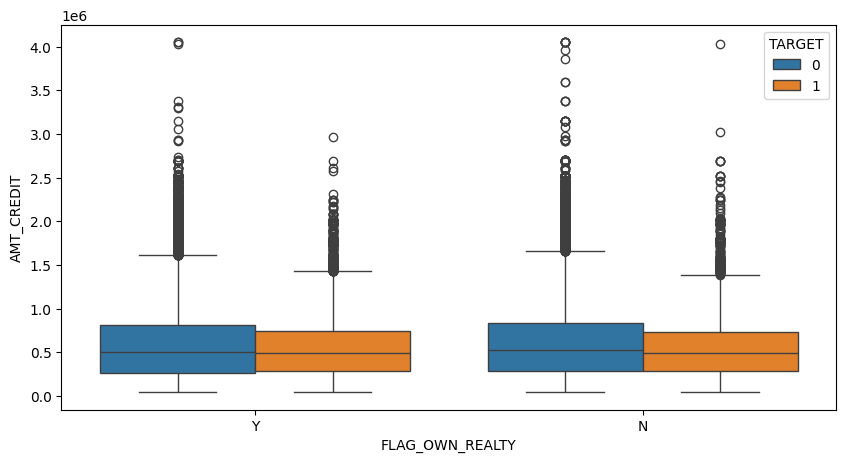

In [65]:
 NUMCAT_ANALYSIS("FLAG_OWN_REALTY", "AMT_CREDIT")

From the above plots the following inferences can be made:
The medians of the boxplots are quite similar as well as the IQRs.
This suggests that Owning a car does not have a big impact on the credit amount.

BoxPlots for CNT_CHILDREN vs AMT_CREDIT

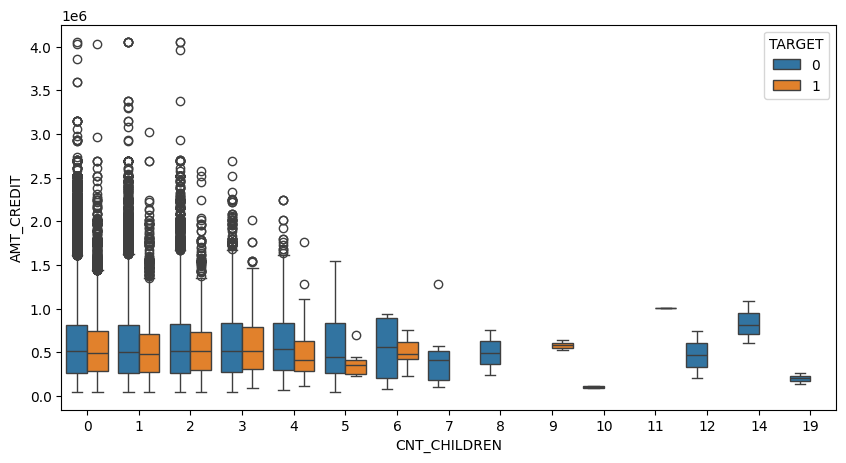

In [66]:
NUMCAT_ANALYSIS("CNT_CHILDREN", "AMT_CREDIT")

From the above plots the following inferences can be made:
As the number of children are more than 6 we observe the lack of data due to the lack of boxplots.

BoxPlots for NAME_TYPE_SUITE vs AMT_CREDIT

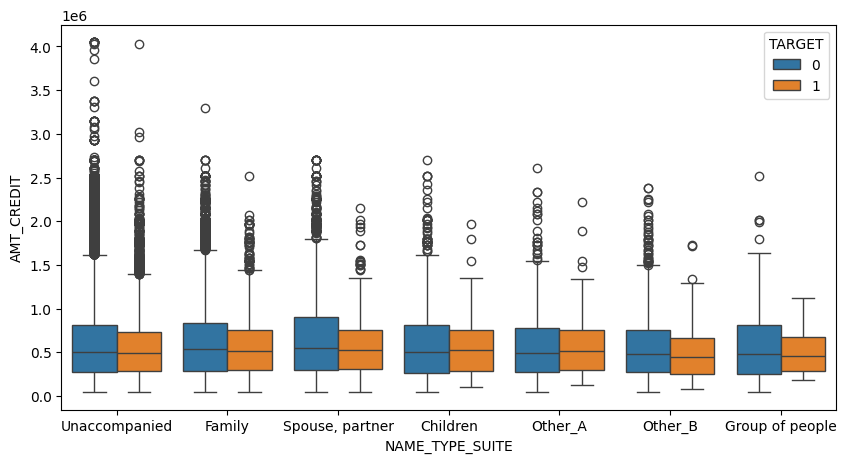

In [67]:
NUMCAT_ANALYSIS("NAME_TYPE_SUITE","AMT_CREDIT" )

From the above plots the following inferences can be made:
The boxplots are fairly similar for all the 'NAME_TYPE_SUITE' categories

BoxPlots for NAME_INCOME_TYPE vs AMT_CREDIT

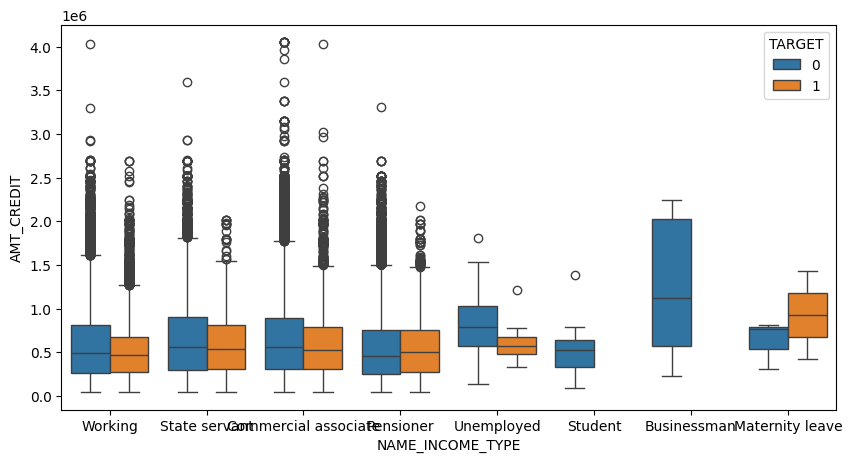

In [68]:
 NUMCAT_ANALYSIS("NAME_INCOME_TYPE", "AMT_CREDIT")

From the above plots the following inferences can be made:
The clients who are businessmen and students do not have a boxlpot for TARGET=1 which shows there are no defaulters
The businessmen have a big IQR which suggests that the credit amount has a huge range

BoxPlots for NAME_EDUCATION_TYPE vs AMT_CREDIT

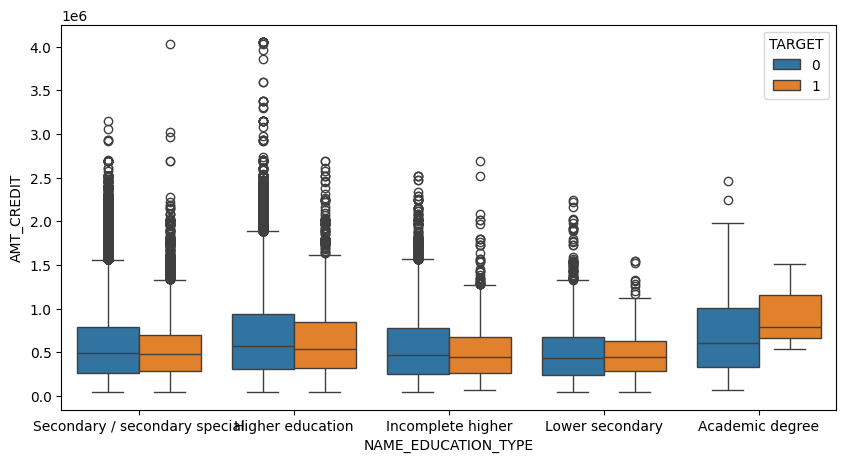

In [69]:
NUMCAT_ANALYSIS("NAME_EDUCATION_TYPE", "AMT_CREDIT")

From the above plots the following inferences can be made:
For the clients with an academic degree, the ones who have difficulty in repaying the loan have higher credit amounts, which might be the reason for defaulting.

CATEGORICAL TO CATEGORICAL VARIABLE ANALYSIS

In [70]:
CAT_VAR_LIST = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", "CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE" ]

In [71]:
def CAT_CAT_ANALYSIS(CAT1, CAT2, rot = False):
    res = pd.pivot_table(data = inp0,index = CAT1, columns= CAT2, values = "TARGET")
    plt.figure(figsize = [25, 5])
    sns.heatmap(data = res, annot = True, cmap = "coolwarm",linewidths= 0.3)
    if rot:
        plt.xticks(rotation = 90)
    plt.show()

 Heatmap to find the association between NAME_CONTRACT_TYPE and CODE_GENDER

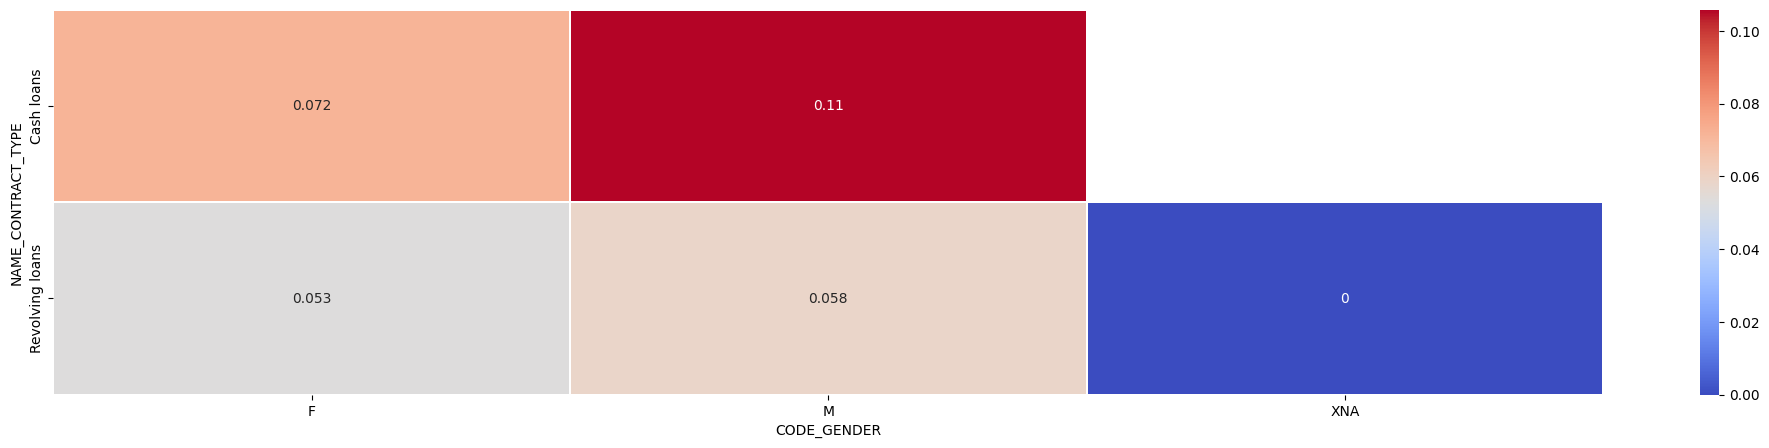

In [72]:
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CODE_GENDER")

From the above heatmap the following inferences can be made:
Male clients who have opted for cash loans are most likely to default.

Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_CAR

CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_CAR")

From the above heatmap the following inferences can be made:
Clients who have opted for cash loans are more likely to default whether they own a car or not.
In general clients who do not own a car are more likely to default.

Heatmap to find the association between NAME_CONTRACT_TYPE and FLAG_OWN_REALTY

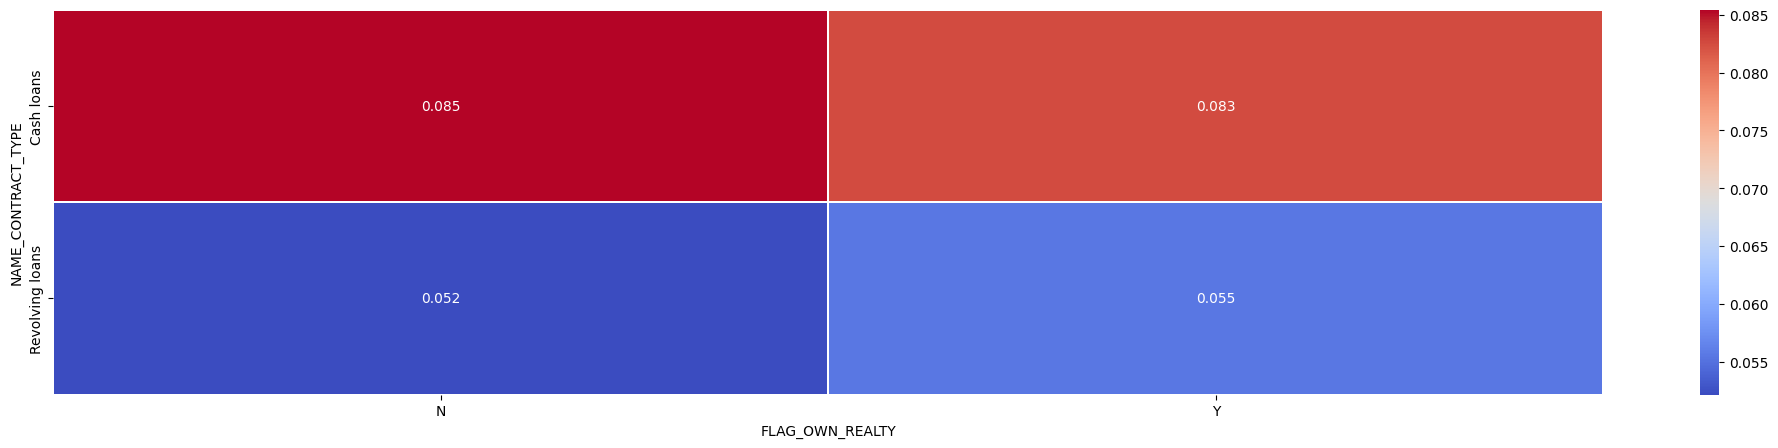

In [73]:
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","FLAG_OWN_REALTY")

From the above heatmap the following inferences can be made:
Clients who have opted for cash loans and do not own realty are most likey to default.
Owning realty does not seem to have much of an impact since the default rate is almost the same for both cash and revolving loans.

 Heatmap to find the association between NAME_CONTRACT_TYPE and CNT_CHILDREN

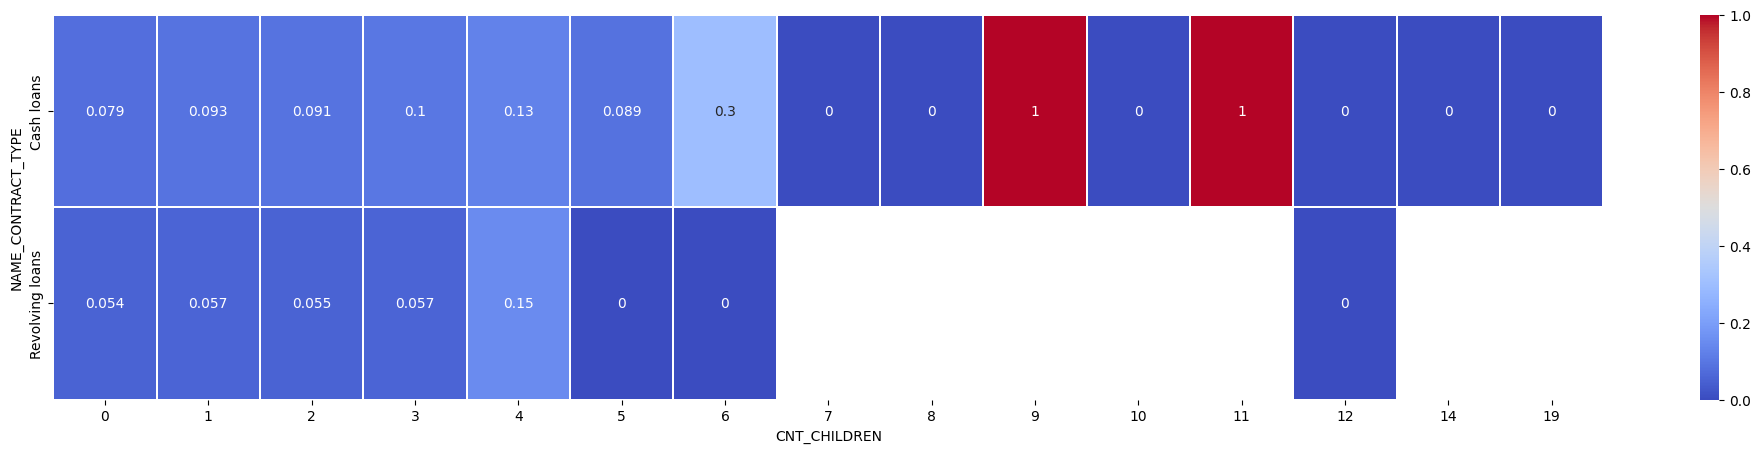

In [74]:
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "CNT_CHILDREN")

From the above heatmap the following inferences can be made:
The default rate increases with increase in the number of children.
Clients with 9 or 11 children are the most likely to default.

Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_TYPE_SUITE

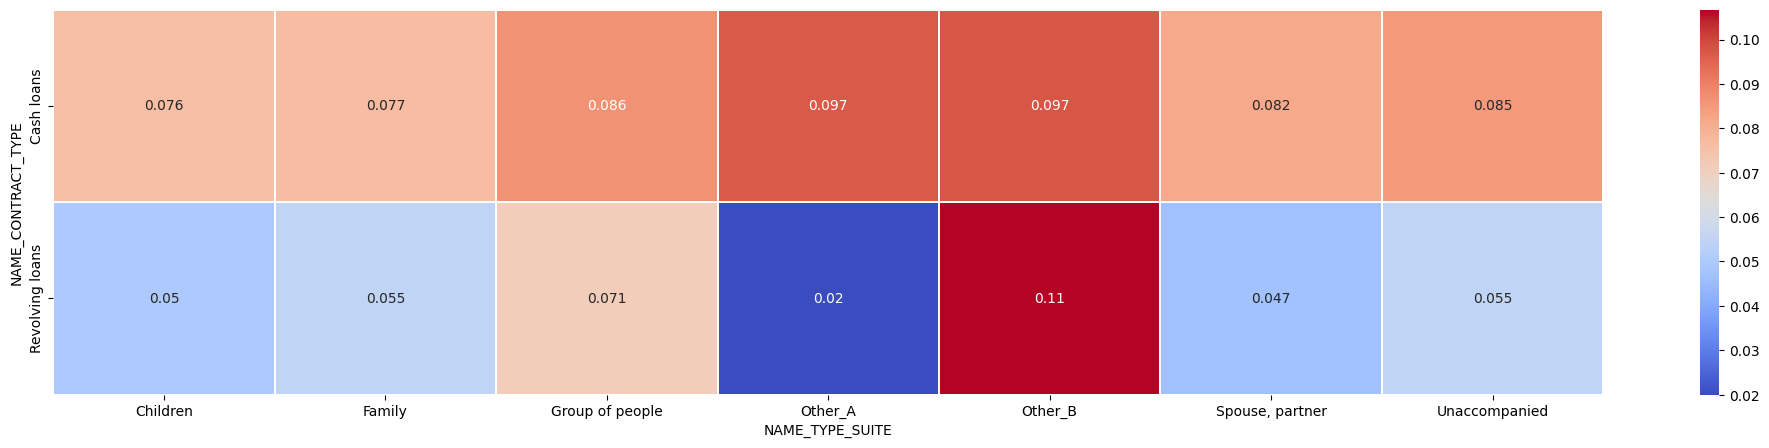

In [75]:
CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE","NAME_TYPE_SUITE")

From the above heatmap the following inferences can be made:
Clients who have opted for revolving loans and belong to 'Other_B' are most likely to default.
Clients who have opted for cash loans and belong to 'Other_A' and 'Other_B' also are more likely to default.

Heatmap to find the association between NAME_CONTRACT_TYPE and NAME_INCOME_TYPE

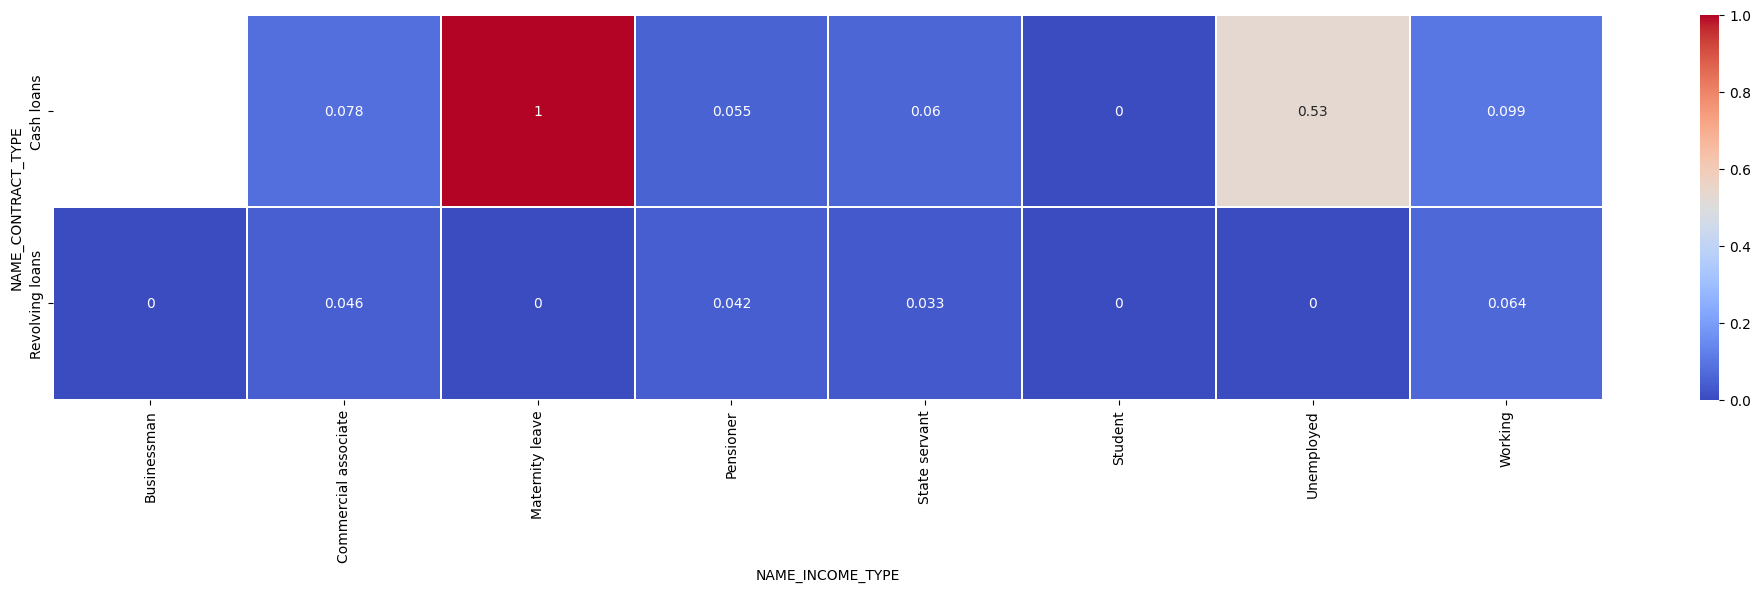

In [76]:
 CAT_CAT_ANALYSIS("NAME_CONTRACT_TYPE", "NAME_INCOME_TYPE", True)

From the above heatmap the following inferences can be made:
It is clearly evident that women on maternity leaves are most likely to default.
Unemployed clients who have opted for cash loans are very likely to default.

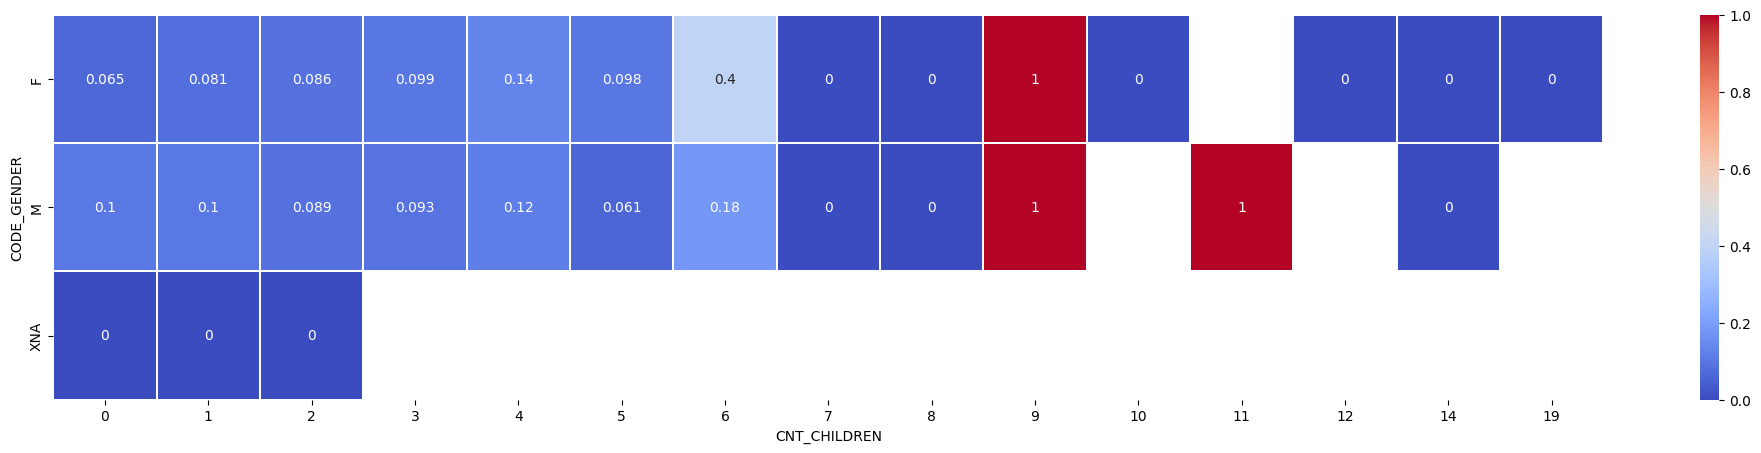

In [77]:
CAT_CAT_ANALYSIS("CODE_GENDER", "CNT_CHILDREN")

From the above heatmap the following inferences can be made:
The default rate increases with the increase in the number of children the client has, irrespective of the gender.
Clients with 9 or 11 children are most likely to default, also female clients with 6 children have chance of defaulting.

Heatmap to find the association between CODE_GENDER and NAME_TYPE_SUITE

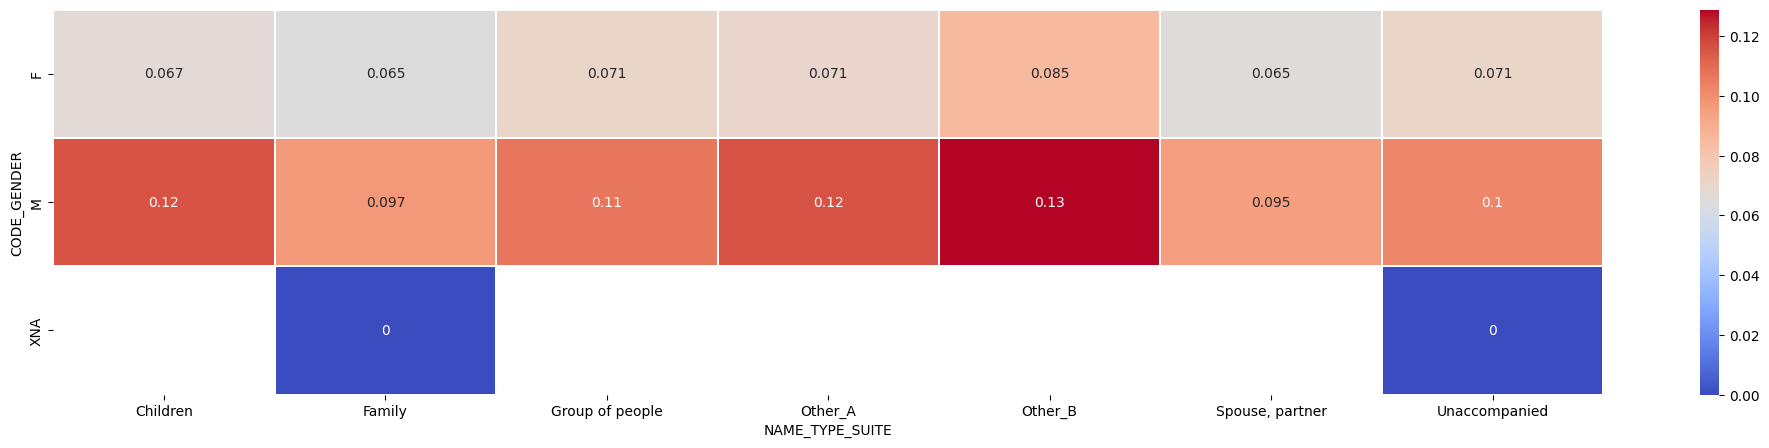

In [78]:
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_TYPE_SUITE")

From the above heatmap the following inferences can be made:
The male clients are are more likely to default irrespective of 'NAME_TYPE_SUITE'

 Heatmap to find the association between CODE_GENDER and NAME_INCOME_TYPE

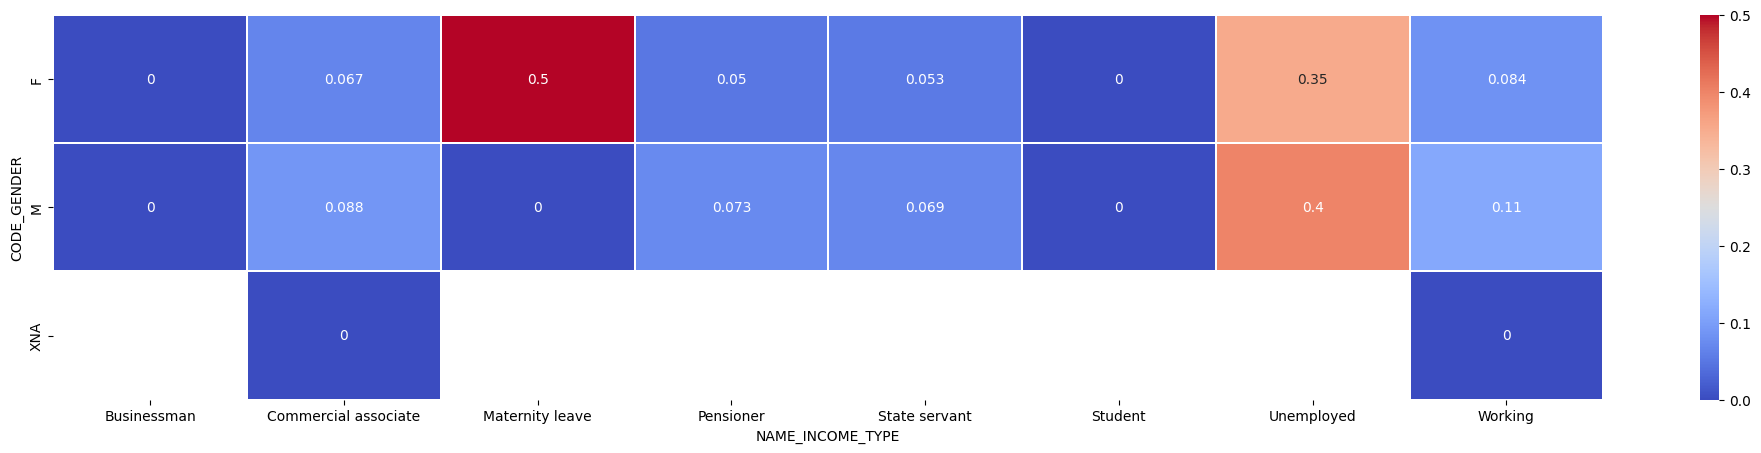

In [79]:
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_INCOME_TYPE")

From the above heatmap the following inferences can be made:
Women on maternity leave are most likely to default.
Also unemployed clients have a high default rate irrespective of gender.

Heatmap to find the association between CODE_GENDER and NAME_EDUCATION_TYPE

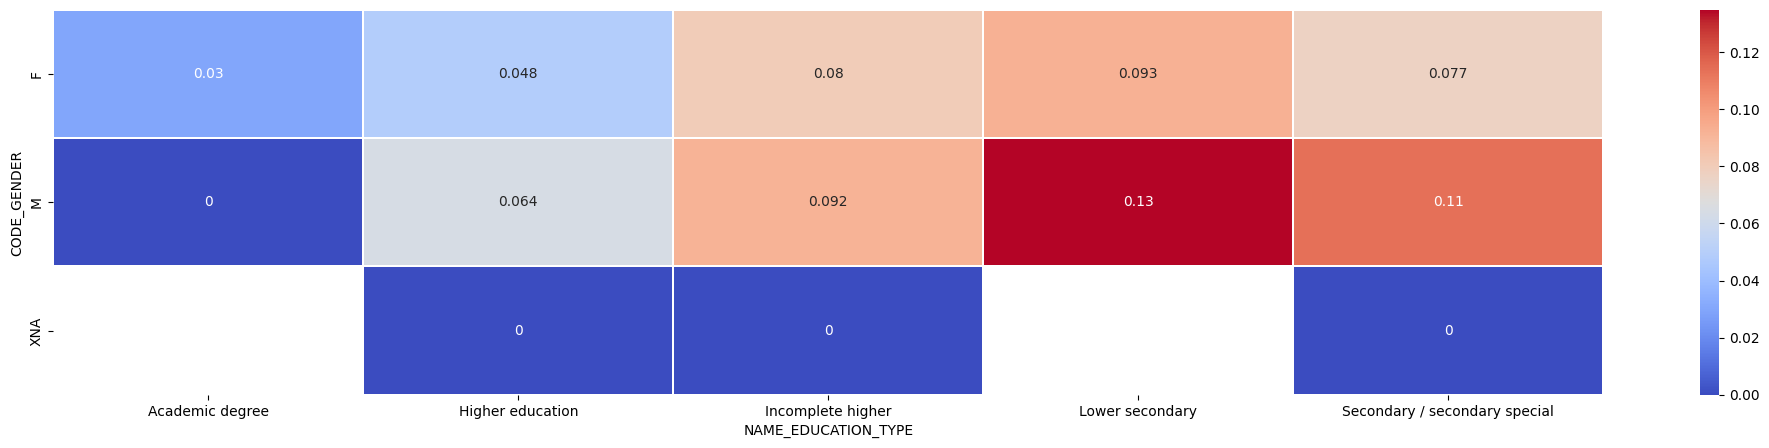

In [80]:
CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_EDUCATION_TYPE")

From the above heatmap the following inferences can be made:
The male clients are are more likely to default irrespective of the education type.

Heatmap to find the association between CODE_GENDER and NAME_FAMILY_STATUS

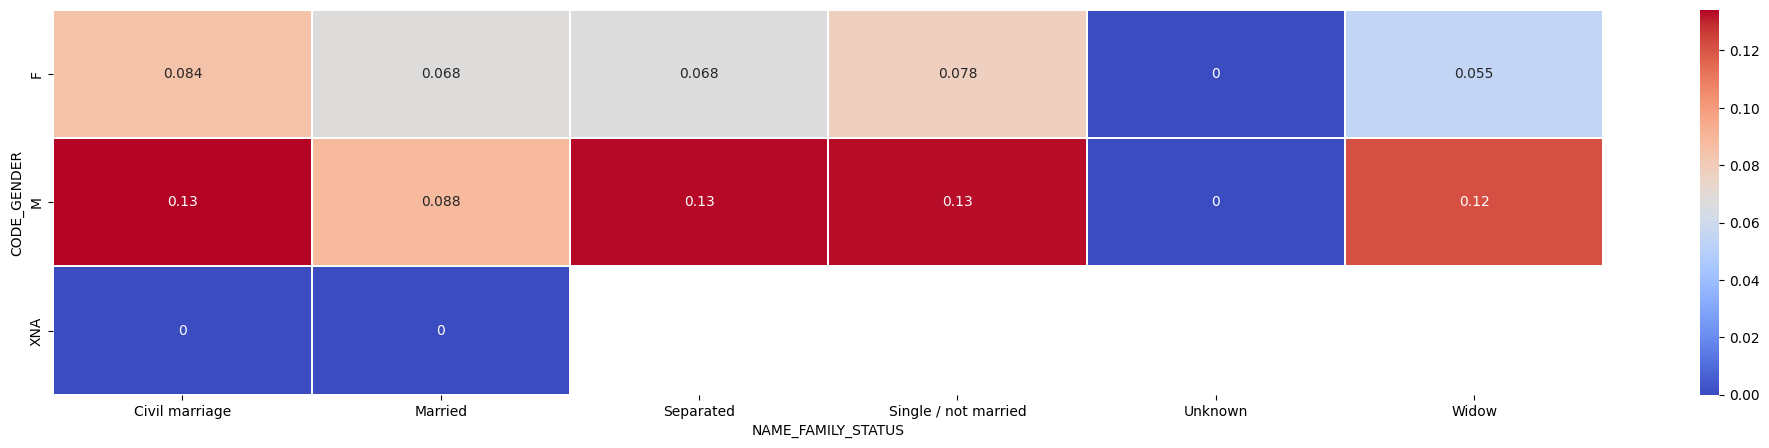

In [81]:
 CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_FAMILY_STATUS")

From the above heatmap the following inferences can be made:
The male clients are are more likely to default irrespective of the family status.

Heatmap to find the association between CODE_GENDER and NAME_HOUSING_TYPE

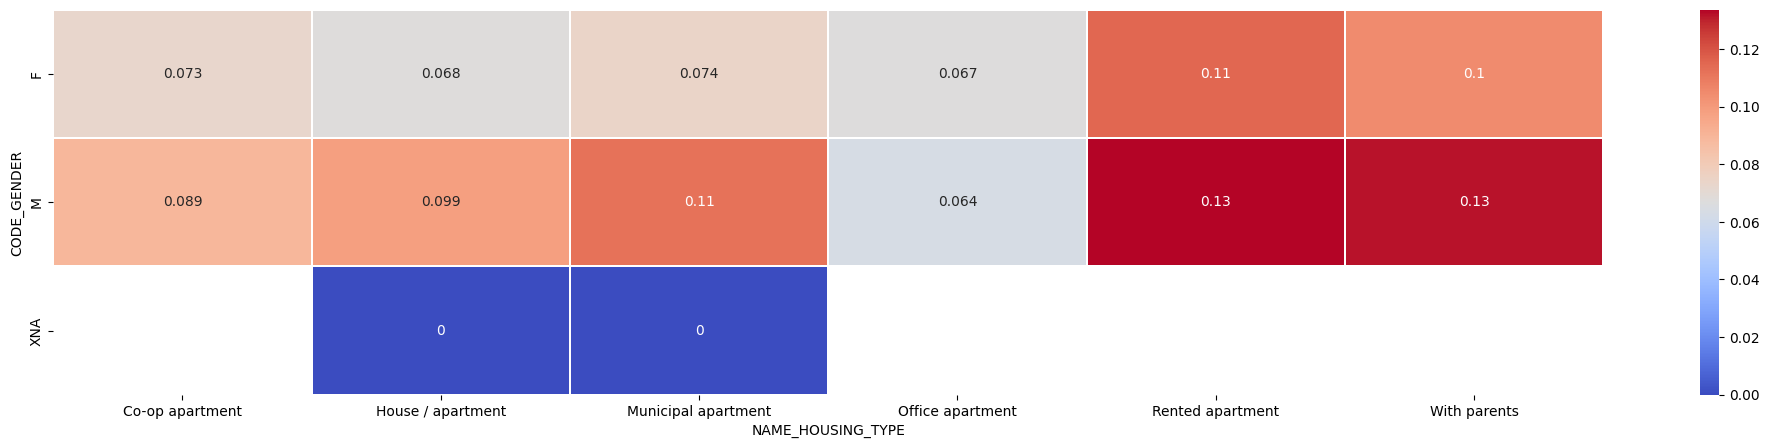

In [82]:
 CAT_CAT_ANALYSIS("CODE_GENDER", "NAME_HOUSING_TYPE")

From the above heatmap the following inferences can be made:
The male clients are are more likely to default irrespective of the housing type.

 Heatmap to find the association between FLAG_OWN_CAR and CNT_CHILDREN

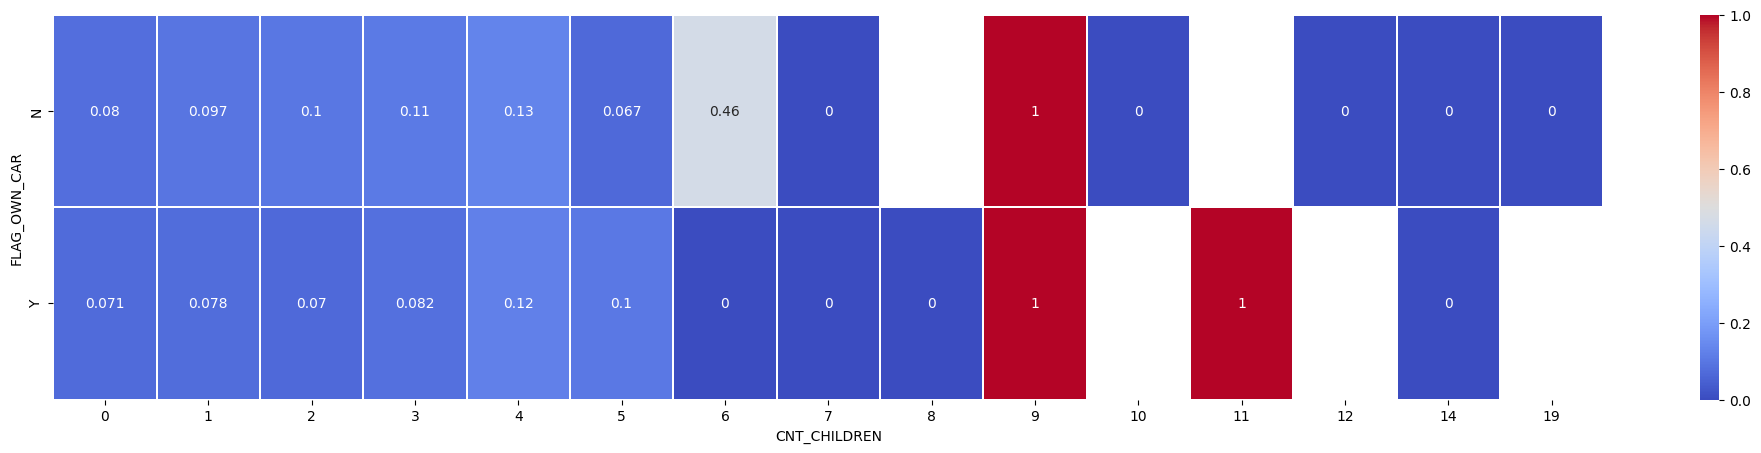

In [83]:
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","CNT_CHILDREN")

From the above heatmap the following inferences can be made:
The default rate increases with the increase in number of children the client has, irrespective of whether they own a car or not.
Ae we saw before, clients with 9 or 11 children are the most likely to default.
Also clients who do not own a car and have 6 children have a high default rate.

Heatmap to find the association between FLAG_OWN_CAR and NAME_INCOME_TYPE

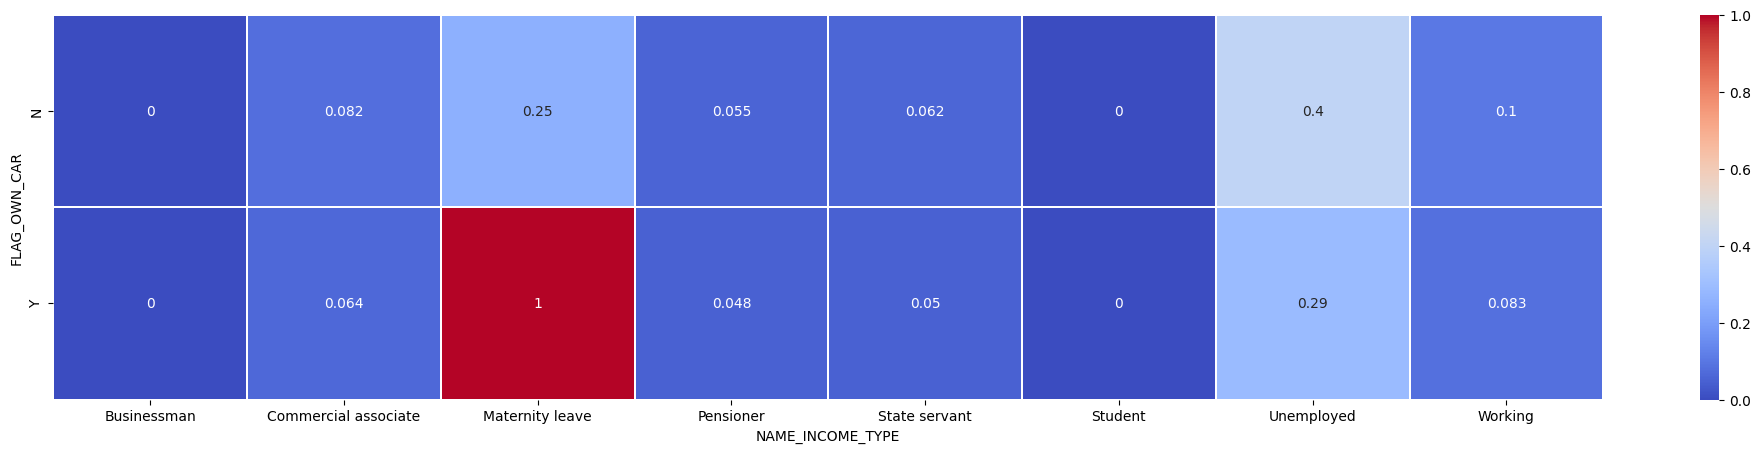

In [84]:
CAT_CAT_ANALYSIS("FLAG_OWN_CAR","NAME_INCOME_TYPE")

From the above heatmap the following inferences can be made:
Women on maternity leave and own a car are most likely to default.
Unemployed clients who do not own a car have a high default rate.

 Heatmap to find the association between FLAG_OWN_REALTY and CNT_CHILDREN

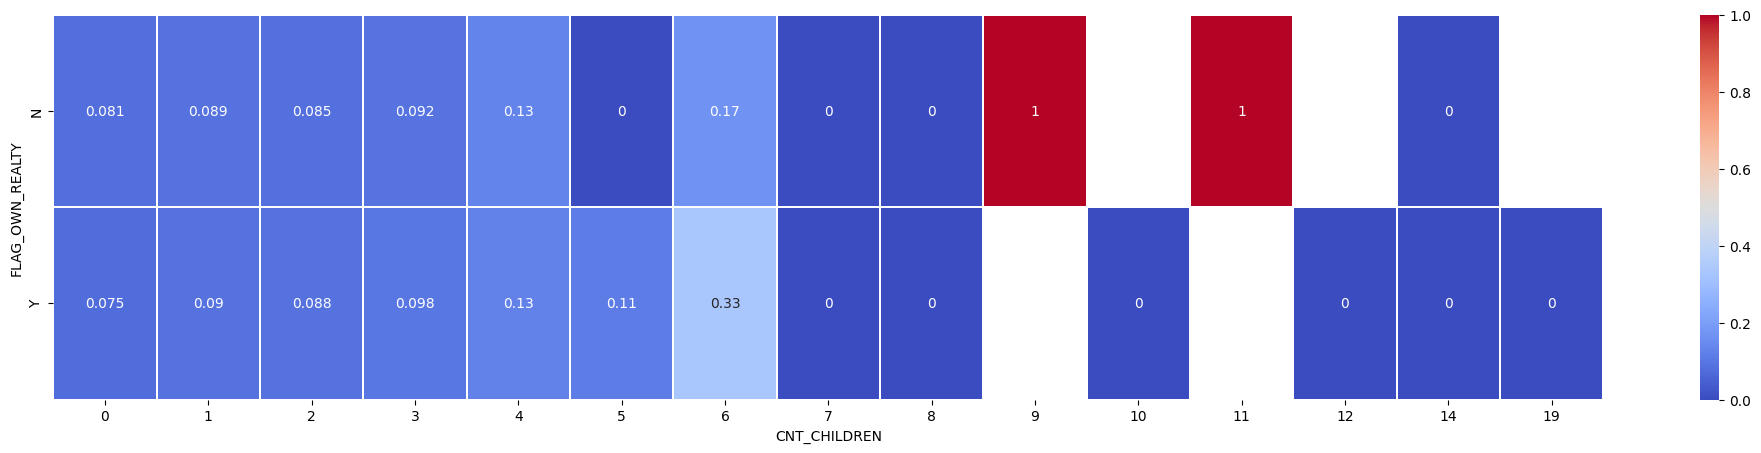

In [85]:
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","CNT_CHILDREN")

From the above heatmap the following inferences can be made:
The default rate increases with the increase in number of children the client has, irrespective of owning realty or not.
As we have seen before, clients with 9 or 11 children are most likely to default, and they also do not own realty.

 Heatmap to find the association between FLAG_OWN_REALTY and NAME_INCOME_TYPE

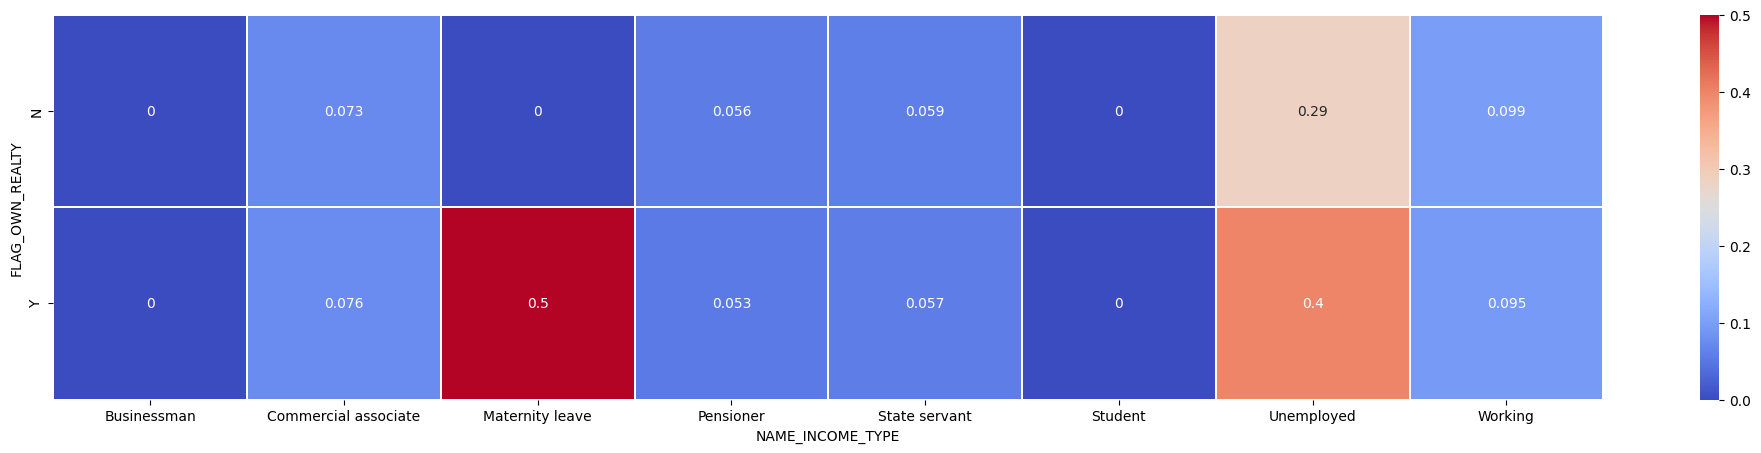

In [86]:
CAT_CAT_ANALYSIS("FLAG_OWN_REALTY","NAME_INCOME_TYPE")

From the above heatmap the following inferences can be made:
Women on maternity leave and own realty are most likely to default.
Unemployed clients who do not own realty have a high default rate as well.
Unemployed clients who own realty are also likely to default.

 Heatmap to find the association between CNT_CHILDREN and NAME_TYPE_SUITE

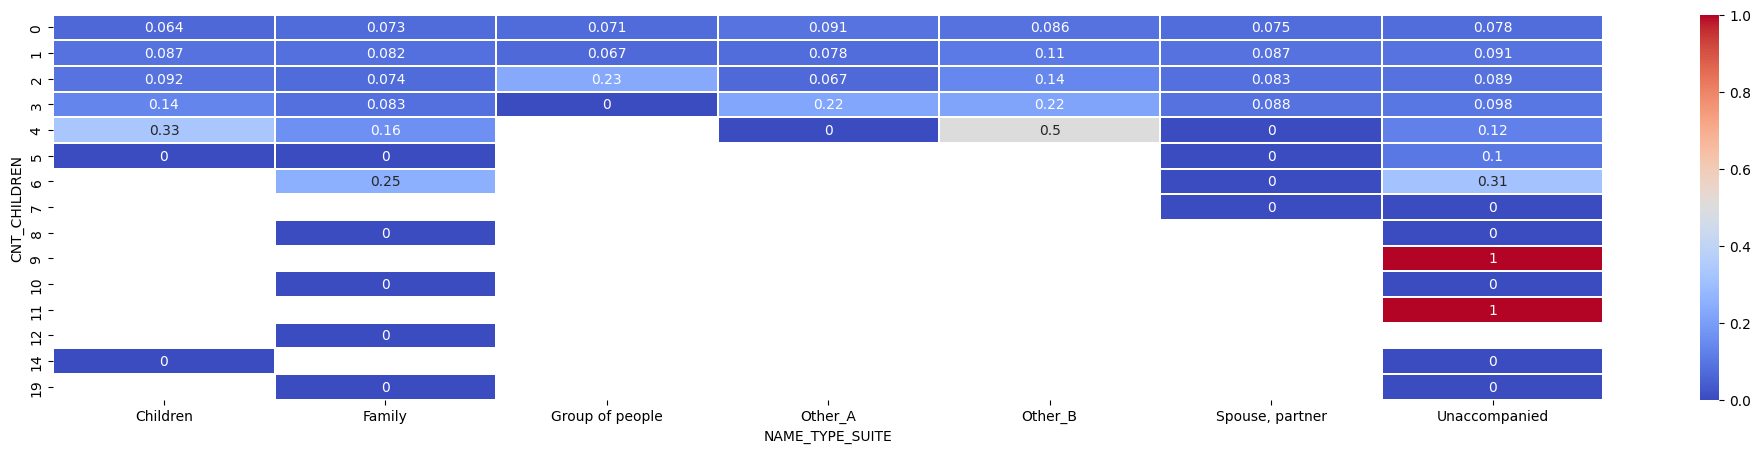

In [87]:
 CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_TYPE_SUITE")

From the above heatmap the following inferences can be made:
Clients who were unnacompanied and have 9 or 11 children are most likely to default.
Clients who have 4 children and in 'Other_B' category have high default rate.

Heatmap to find the association between CNT_CHILDREN and NAME_INCOME_TYPE

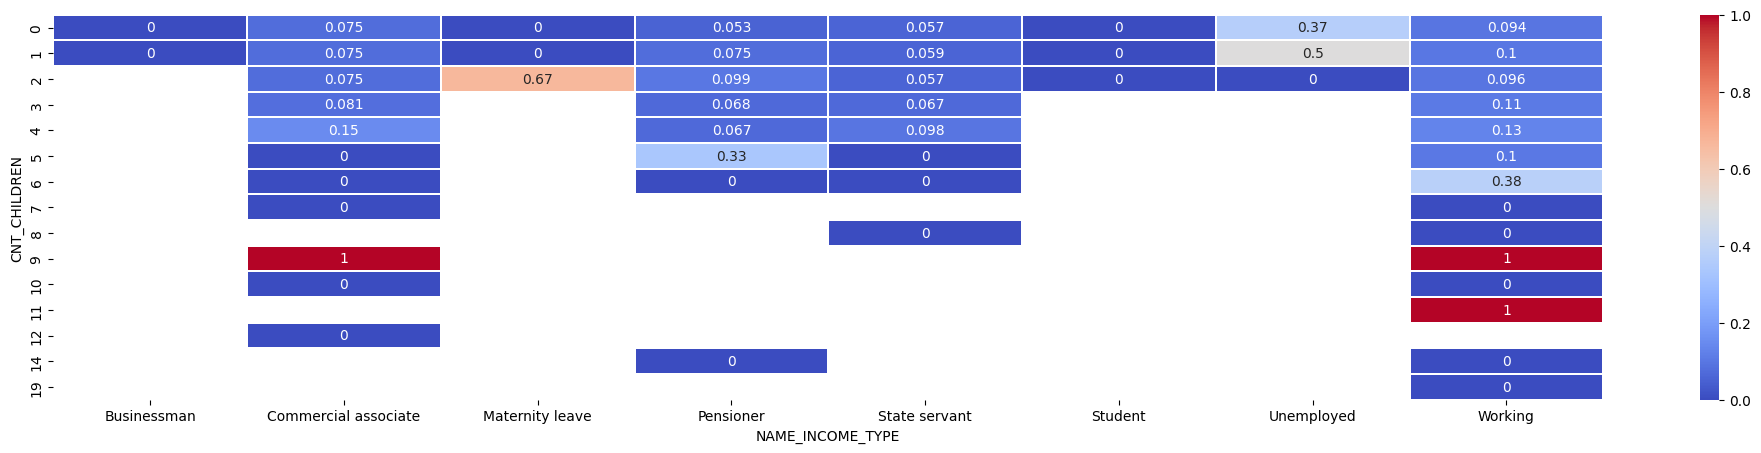

In [88]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_INCOME_TYPE")

From the above heatmap the following inferences can be made:
As we have seen before, clients who have 9 or 11 children are mosty likely to default.
Clients with 6 children and working have a high default rate, clients who are pensioners and have 5 children also have a high default rate.

Heatmap to find the association between CNT_CHILDREN and NAME_EDUCATION_TYPE

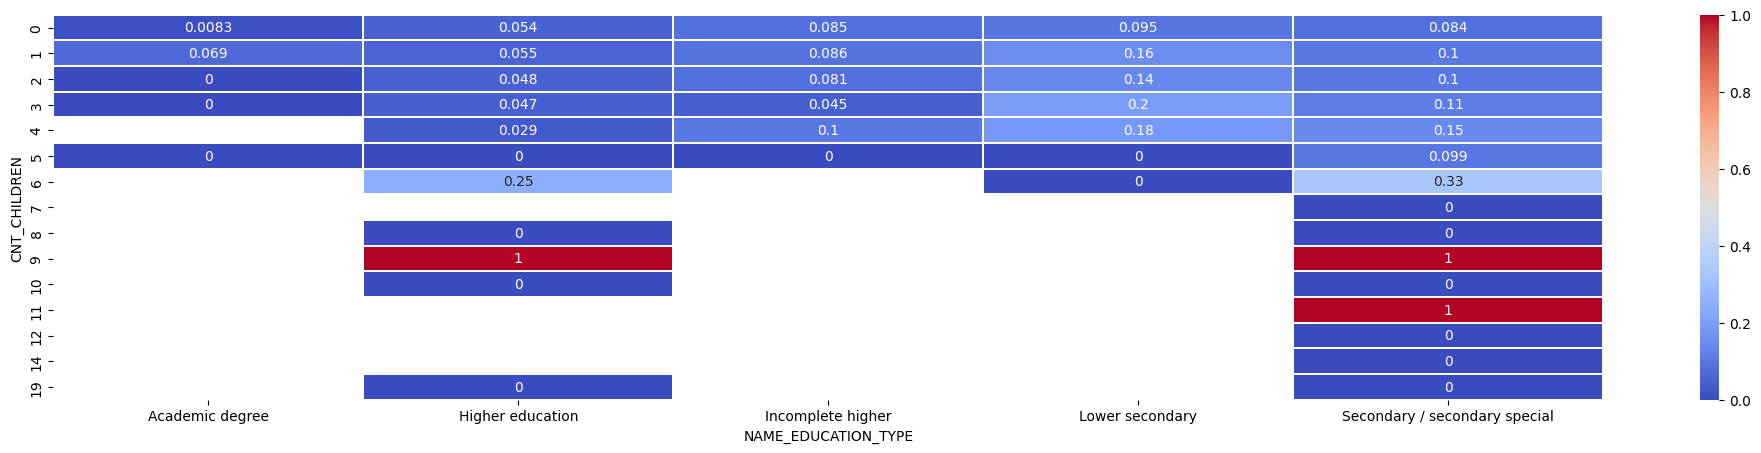

In [89]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_EDUCATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who have 9 or 11 children are most likely to default.
Clients who have 6 children with secondary education have a high default rate, clients with 6 children and completed higher education are also likely to default

 Heatmap to find the association between CNT_CHILDREN and NAME_FAMILY_STATUS

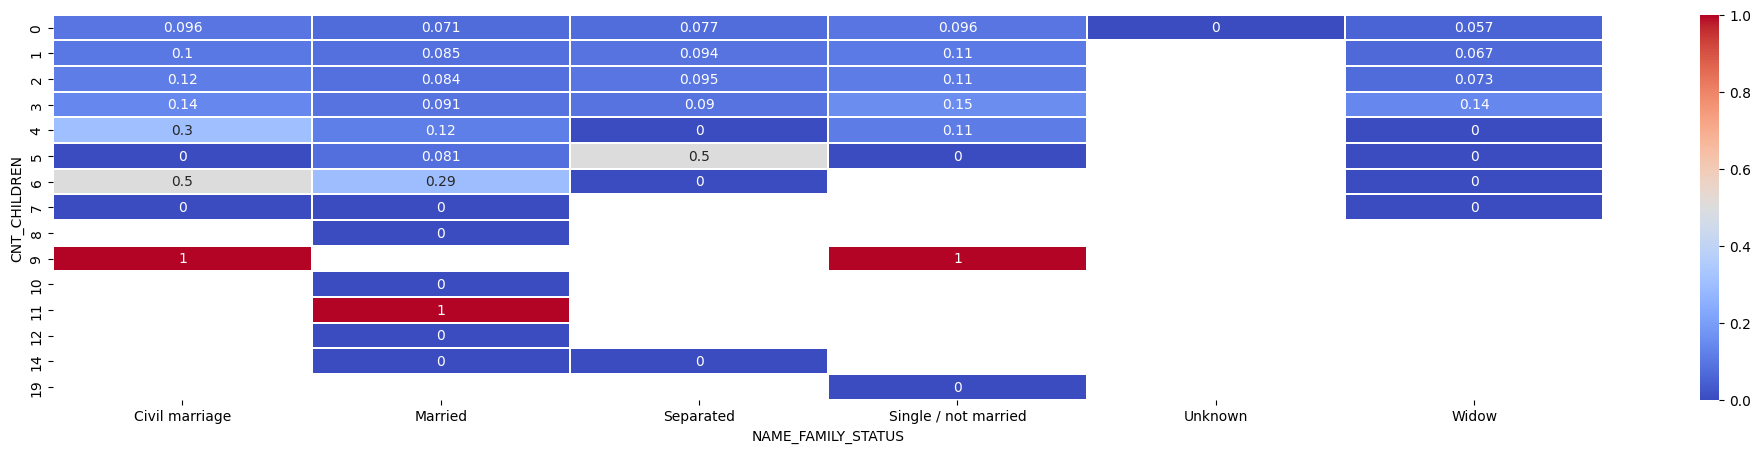

In [90]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_FAMILY_STATUS")

From the above heatmap the following inferences can be made:
Clients who have 9 or 11 children are most likely to default.
Clients who are separated and have 5 children have a high default rate.
Cleints who have 6 children and have undergone civil marriage also have a high default rate 

 Heatmap to find the association between CNT_CHILDREN and NAME_HOUSING_TYPE

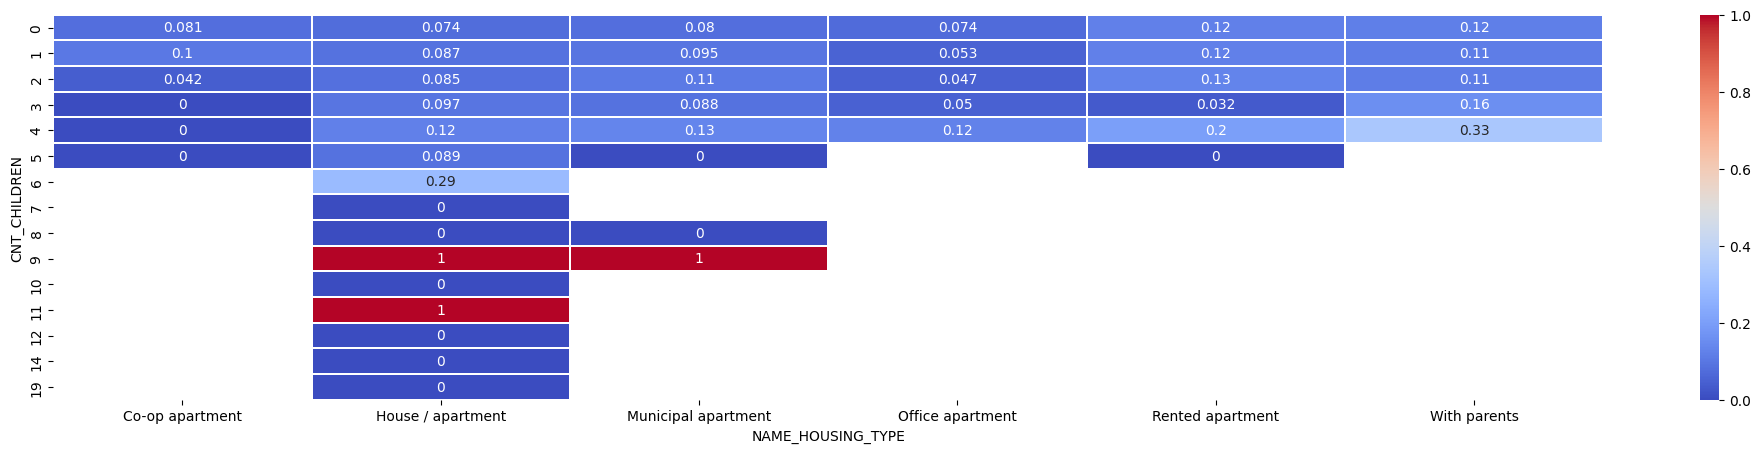

In [91]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","NAME_HOUSING_TYPE")

From the above heatmap the following inferences can be made:
As we have seen before, clients who have 9 or 11 children are mosty likely to default.

 Heatmap to find the association between CNT_CHILDREN and OCCUPATION_TYPE

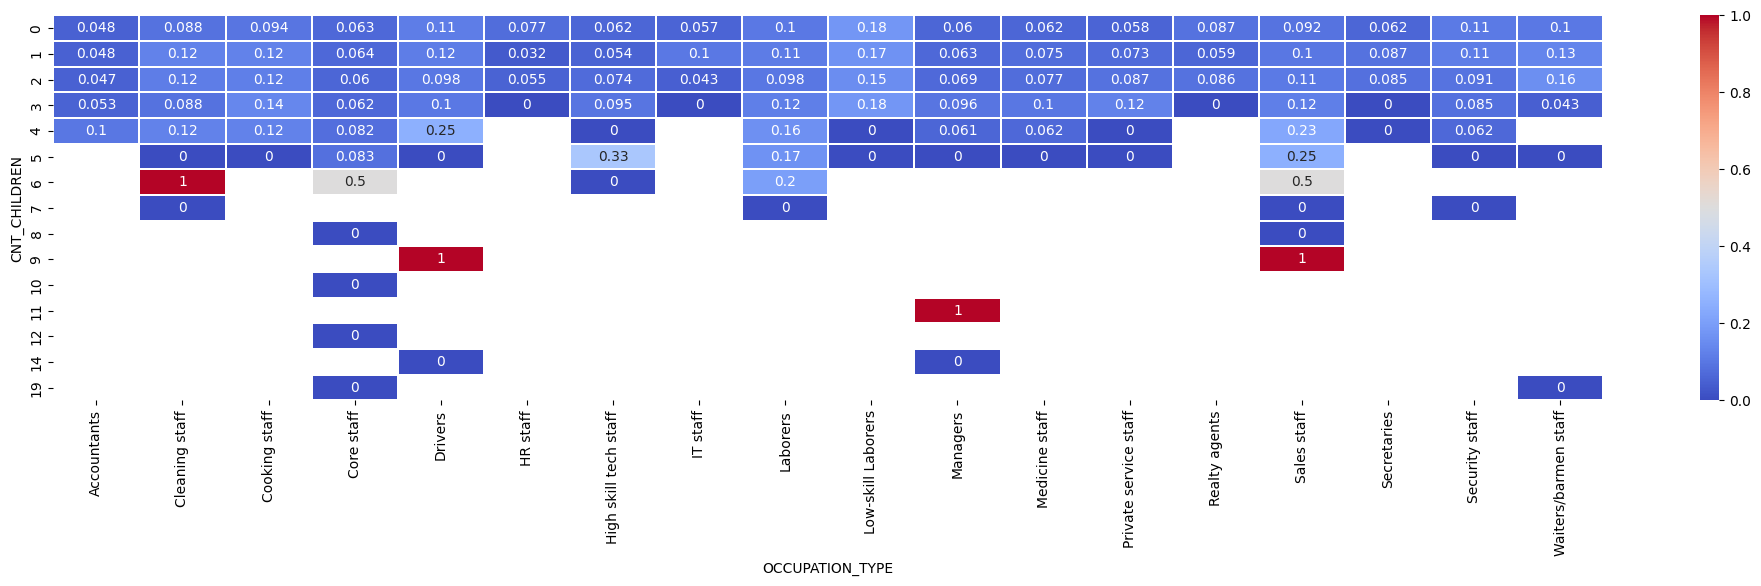

In [92]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","OCCUPATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who were have 9 or 11 children are most likely to default.
Clients who have 6 children and are cleaning staff also are most likely to default

 Heatmap to find the association between CNT_CHILDREN and ORGANIZATION_TYPE

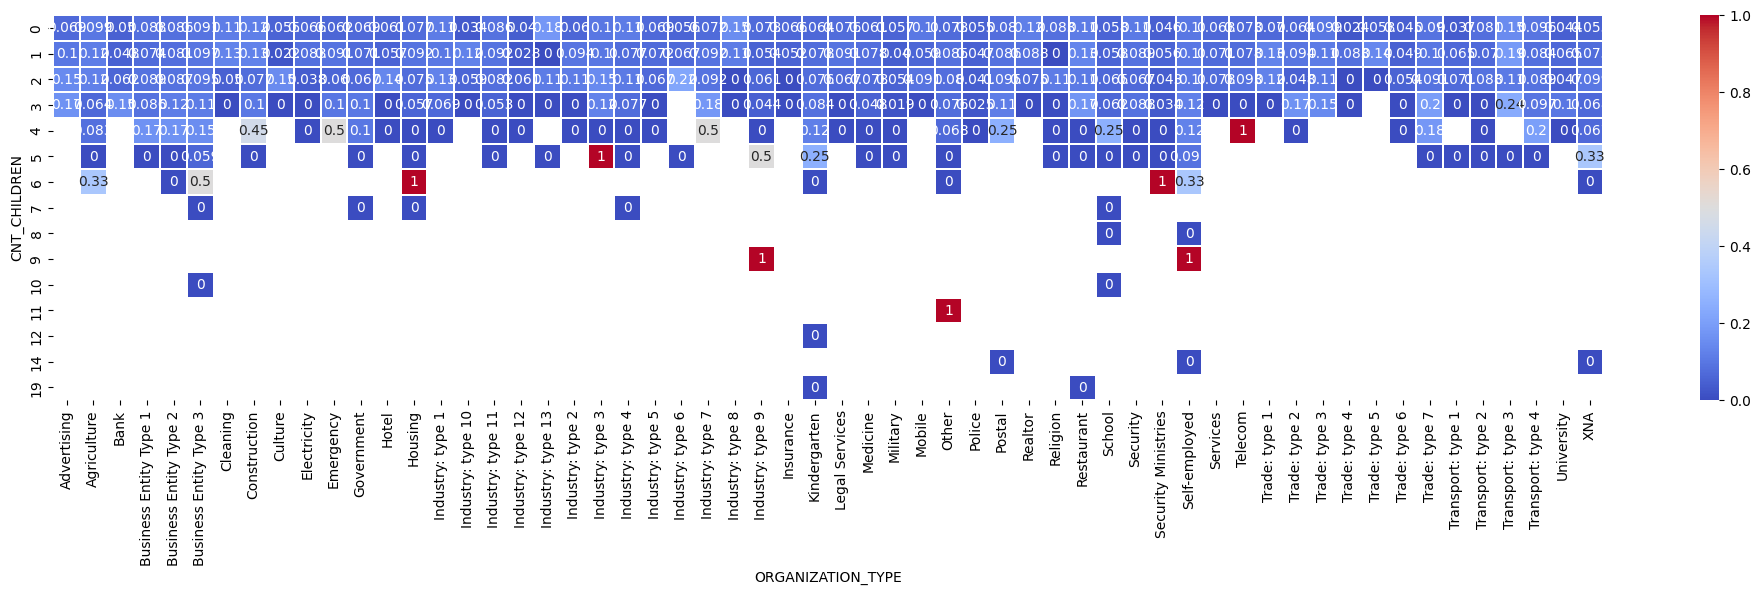

In [94]:
CAT_CAT_ANALYSIS("CNT_CHILDREN","ORGANIZATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who have 9 or 11 children are most likely to default.
We also see a very high default rate from clients having 6 children who are in housing and security ministries, also from clients who have 5 children and in industry type 3 and lastly clients who have 4 children and in telecom.
Since in every case we see that clients with 9 or 11 children are most likely to default, this might be due to insufficient data available

Heatmap to find the association between NAME_TYPE_SUITE and NAME_INCOME_TYPE

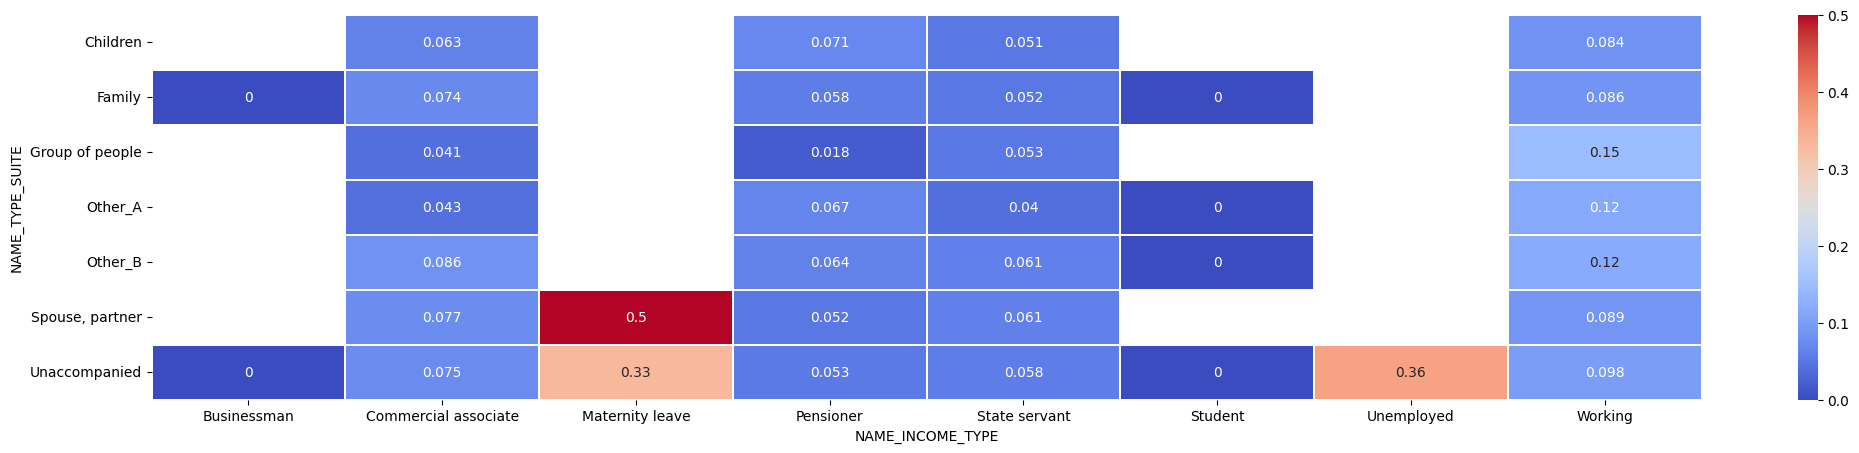

In [95]:
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "NAME_INCOME_TYPE")

From the above heatmap the following inferences can be made:
Clients on maternity leave and with a partner have a high default rate.
Cleints who are unemployed and unaccompanied have a high default rate as well.

 Heatmap to find the association between NAME_TYPE_SUITE and OCCUPATION_TYPE

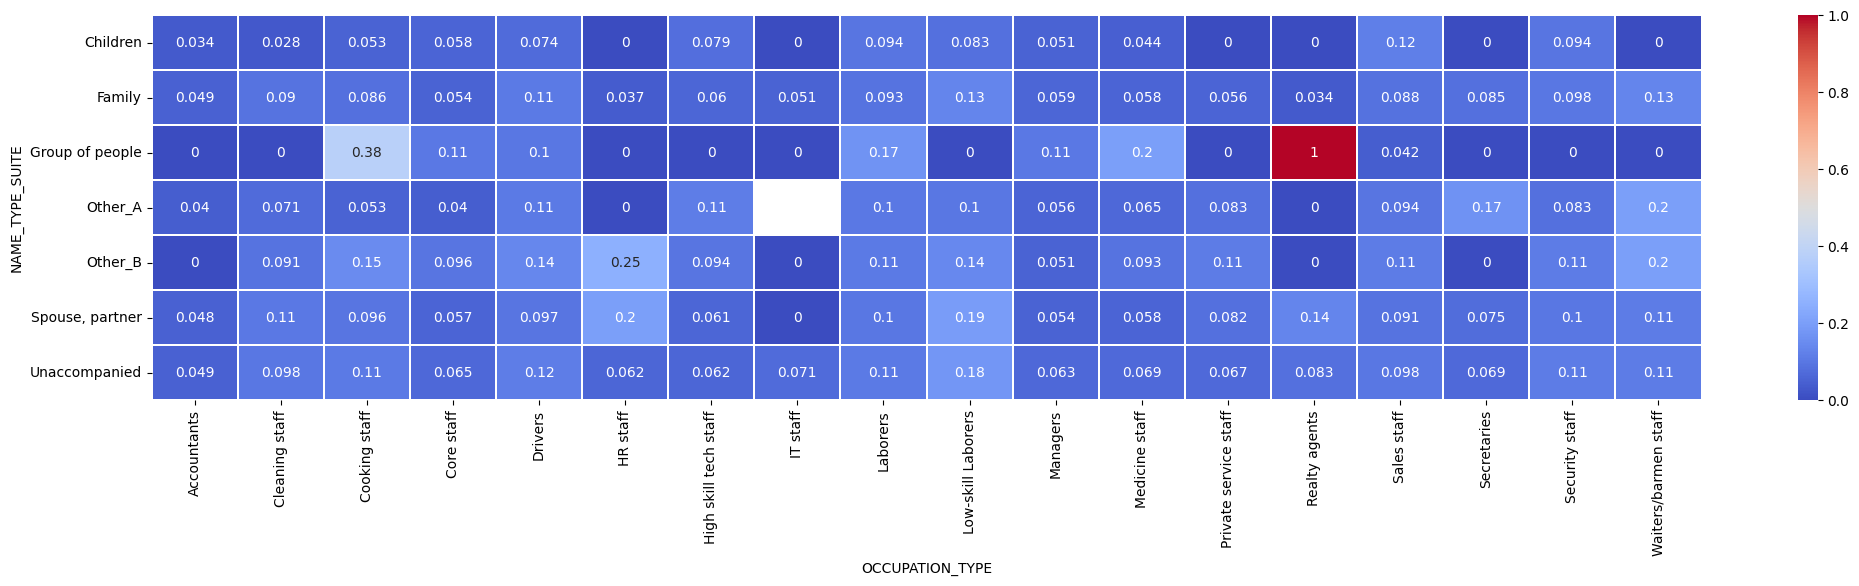

In [96]:
CAT_CAT_ANALYSIS("NAME_TYPE_SUITE", "OCCUPATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who are realty agents and were accompanied by a group of people while applying for loan are most likely to default.
Cooking staff accompanied by a group of people while applying for loan have a high default rate.

 Heatmap to find the association between NAME_INCOME_TYPE and NAME_EDUCATION_TYPE

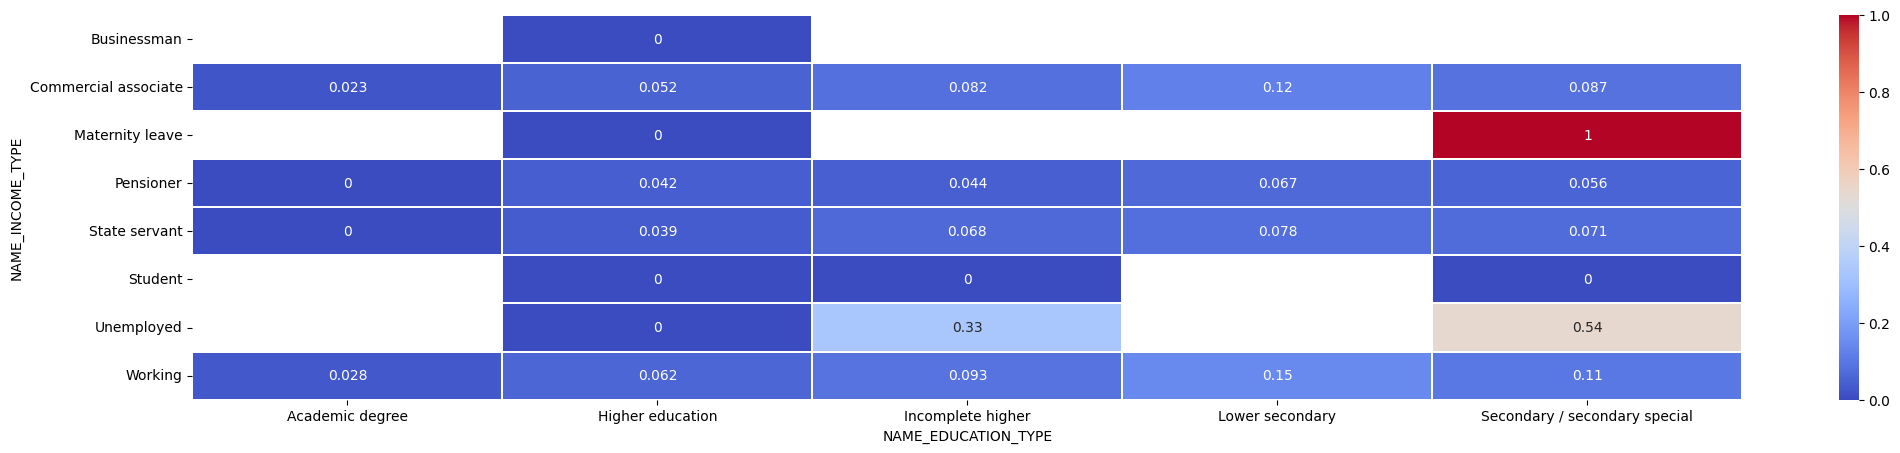

In [97]:
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who are on maternity leave and have completed secondary education are most likely to default.
Unemployed clients who have completed secondary education have a high default rate

Heatmap to find the association between NAME_INCOME_TYPE and NAME_FAMILY_STATUS

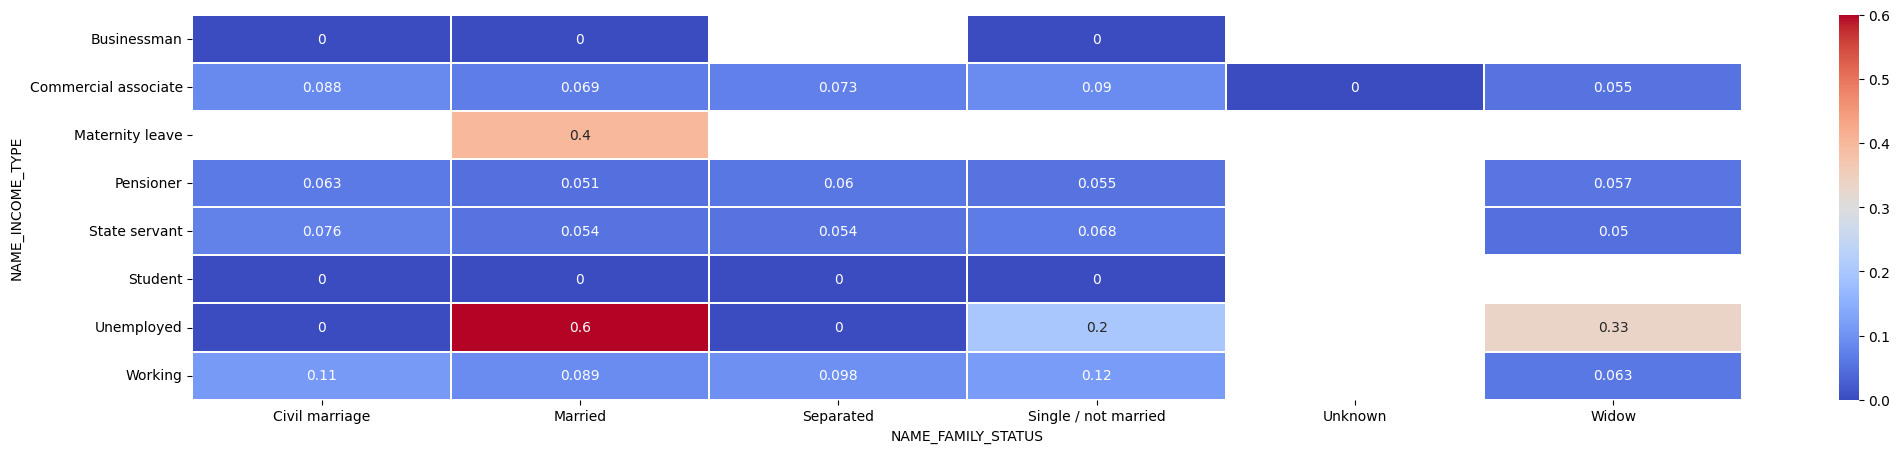

In [98]:
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","NAME_FAMILY_STATUS")

From the above heatmap the following inferences can be made:
Clients who are unemployed and married are most likely to default.
Clients on maternity leave and married have a high default rate.
Unemployed clients who are also widows have a high default rate as well.

Heatmap to find the association between NAME_INCOME_TYPE and NAME_HOUSING_TYPE

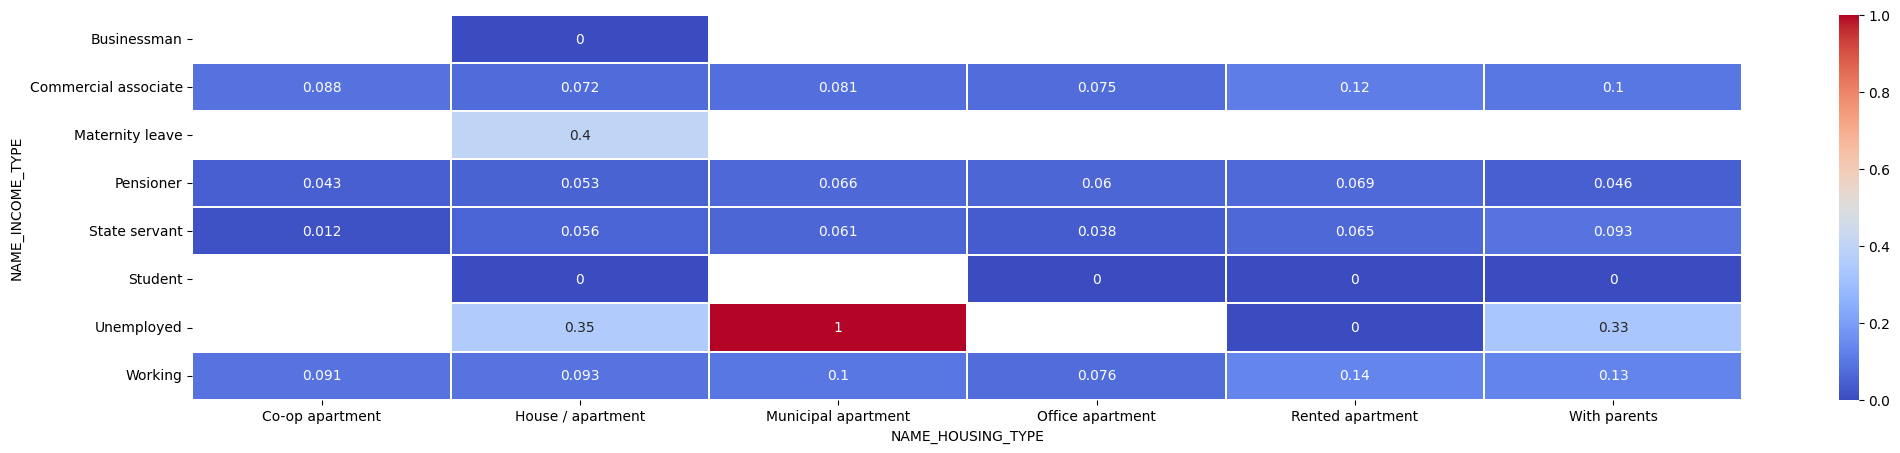

In [99]:
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","NAME_HOUSING_TYPE")

From the above heatmap the following inferences can be made:
Clients who are unemployed in general have high default rate, specifically the ones living in a municipal apartment.
Clients on maternity leave and living in a house/apartment also have high default rate.

 Heatmap to find the association between NAME_INCOME_TYPE and ORGANIZATION_TYPE

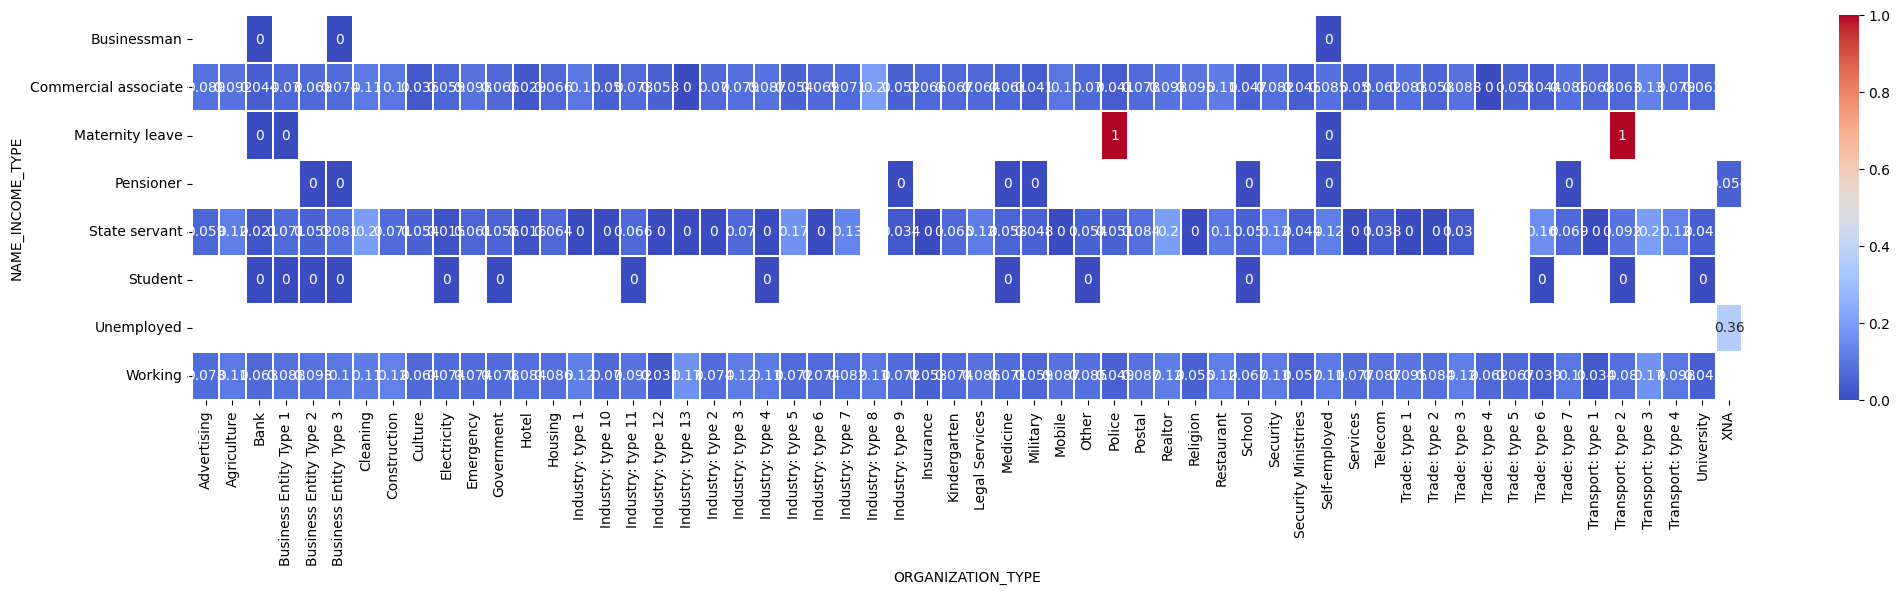

In [100]:
CAT_CAT_ANALYSIS("NAME_INCOME_TYPE","ORGANIZATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who are on maternity leave are most likely to default irrespective of the organization type.

Heatmap to find the association between NAME_EDUCATION_TYPE and ORGANIZATION_TYPE

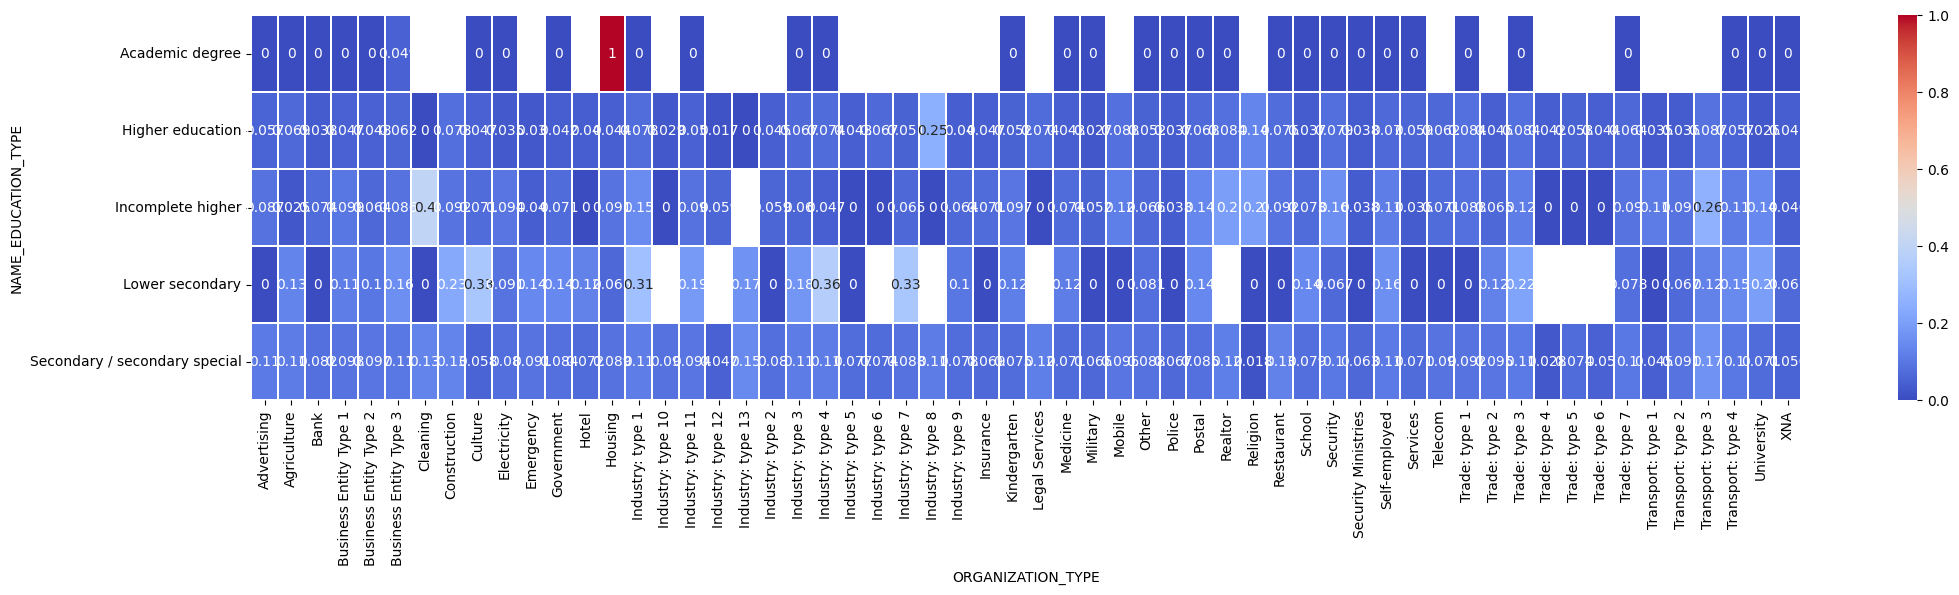

In [101]:
CAT_CAT_ANALYSIS("NAME_EDUCATION_TYPE", "ORGANIZATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who have an academic degree and are in housing category have higher chance of defaulting.
Clients with Lower secondary education have relatively high default rate.

Heatmap to find the association between NAME_FAMILY_STATUS and ORGANIZATION_TYPE

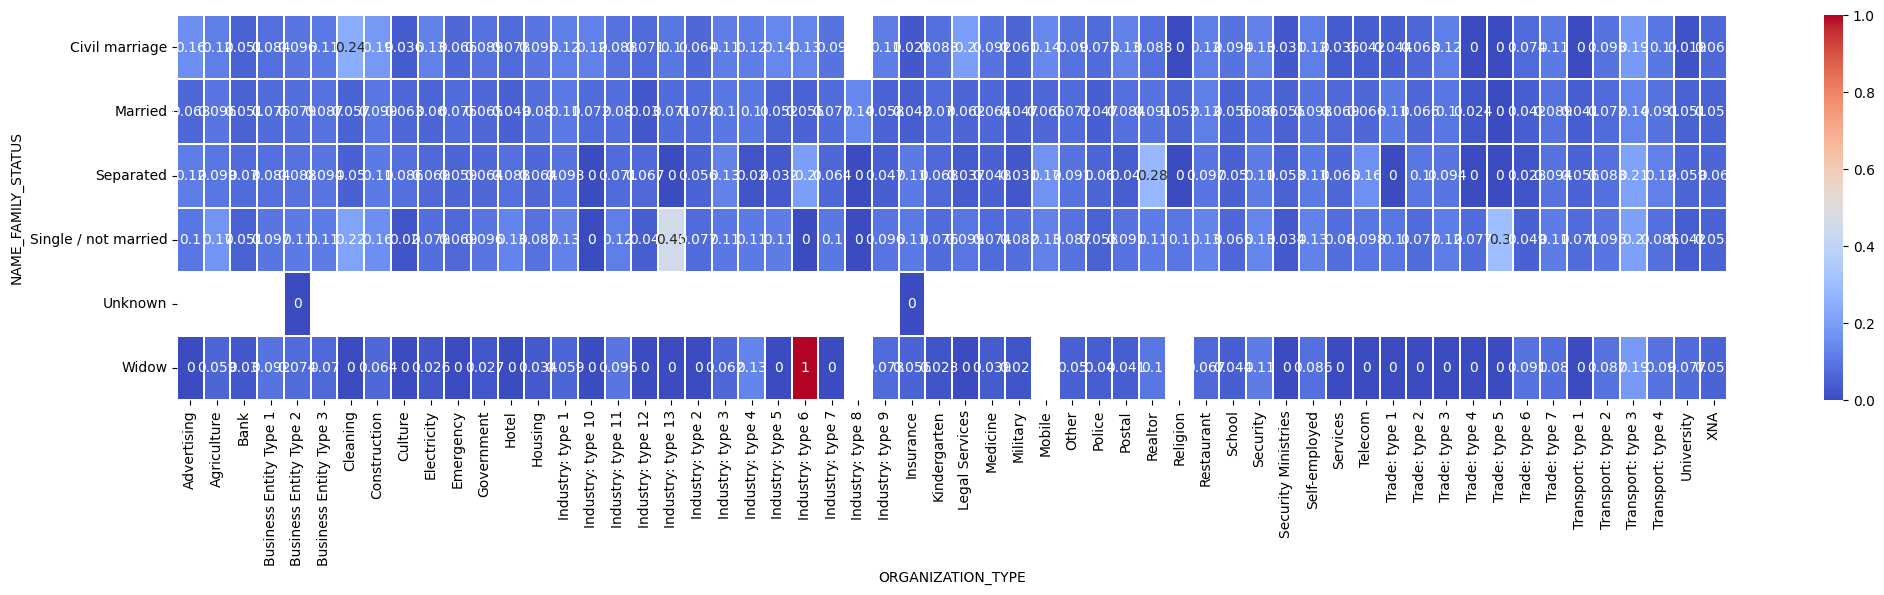

In [102]:
CAT_CAT_ANALYSIS("NAME_FAMILY_STATUS","ORGANIZATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who are widows and belong to Industry-type 6 have higher chance of defaulting

Heatmap to find the association between NAME_HOUSING_TYPE and OCCUPATION_TYPE

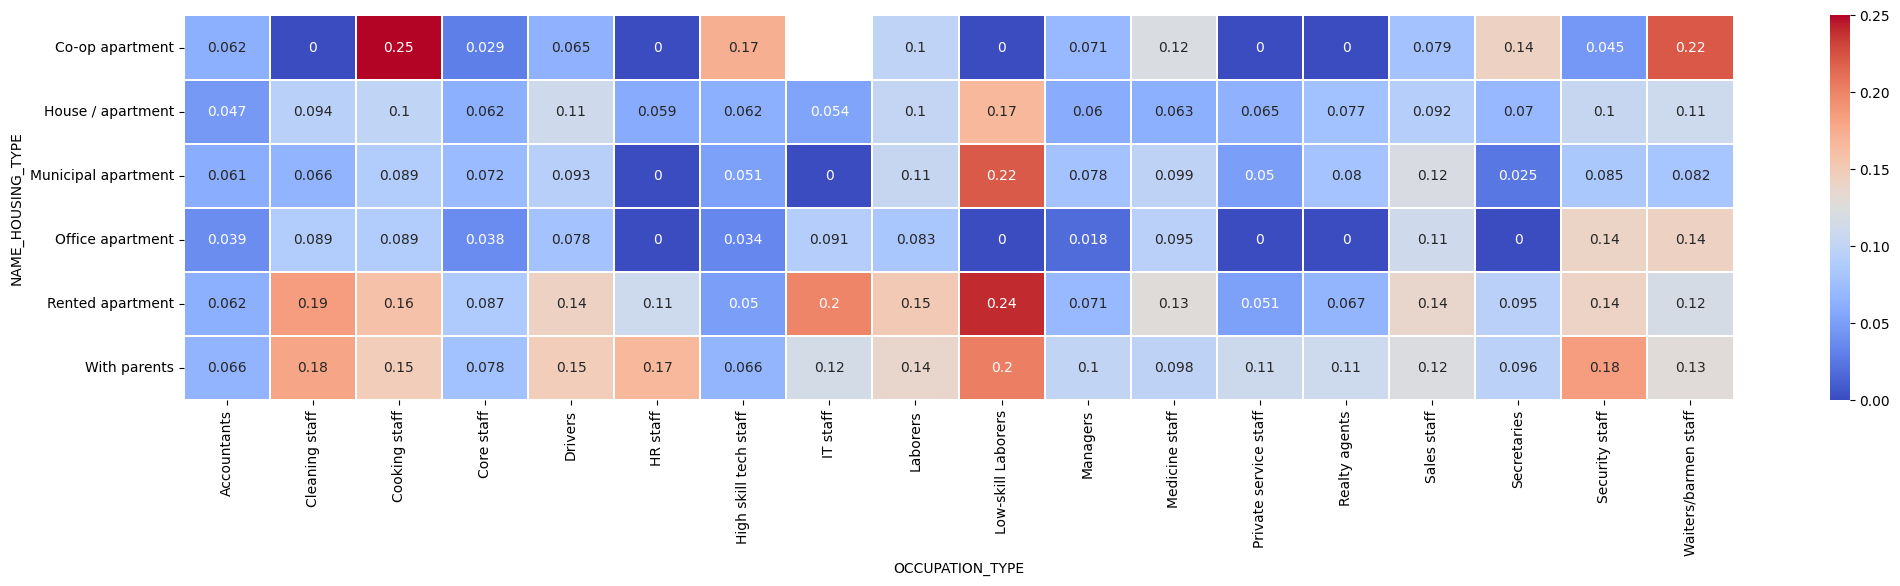

In [103]:
CAT_CAT_ANALYSIS("NAME_HOUSING_TYPE","OCCUPATION_TYPE")

From the above heatmap the following inferences can be made:
Clients who are low-skill labourers are more likely to default in general.
Cooking staff in co-op apartments are most likely to default.

 Importing the 'previous_application' Dataset.

In [105]:
inp1 = pd.read_csv("previous_application.csv")

In [106]:
inp1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [107]:
Previous_data_null = (inp1.isnull().sum()/len(inp1))*100
Previous_data_null

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [108]:
inp1.drop(Previous_data_null[Previous_data_null.values>=40].index, axis = 1, inplace = True)

Merging both the data files(application_data and previous_application)

In [109]:
merged_data = inp0.merge(inp1, on= 'SK_ID_CURR', how = 'inner')

In [110]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0        24700.5  ...               New              Vehicles            POS   
1        35698.5  ...          Repeater                   XNA           Cash   
2        35698.5  ...         Refreshed             Furniture            POS   
3        35698.5  ...         Refreshed  Consumer Electronics            POS   
4         6750.0  ...               New                Mobile            POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0               XNA                    Stone              500   
1            x-sell  Credit and cash offices               -1   
2               XNA                    Stone             1400   
3               XNA             Country-wide              200   
4               XNA         Regional / Local               30   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 148 columns]

In [111]:
merged_data.shape

(1413701, 148)

STUDY OF OUTLIERS AND DATA DISTRIBUTION IN PREVIOUS DATA

In [112]:

def box_plot_p(VAR):
    g = sns.catplot(x="TARGET", y=VAR, kind="box", data=merged_data, height=5, aspect=2)
    plt.show()

 BoxPlot for AMT_ANNUITY_y

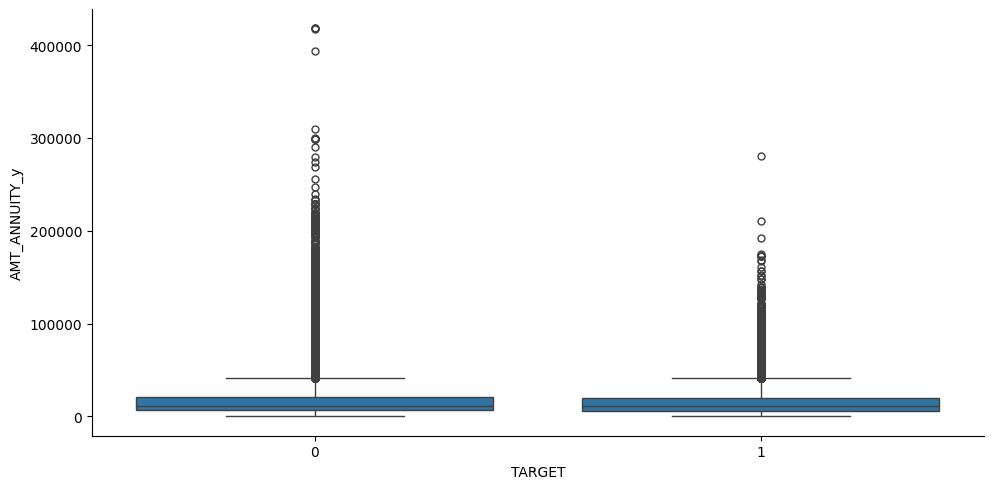

In [113]:
box_plot_p("AMT_ANNUITY_y")

Observations:
Both the target types have outliers with respect to annuity amount.
Both the target types seem to have similar annuity amounts.

BoxPlot for AMT_APPLICATION

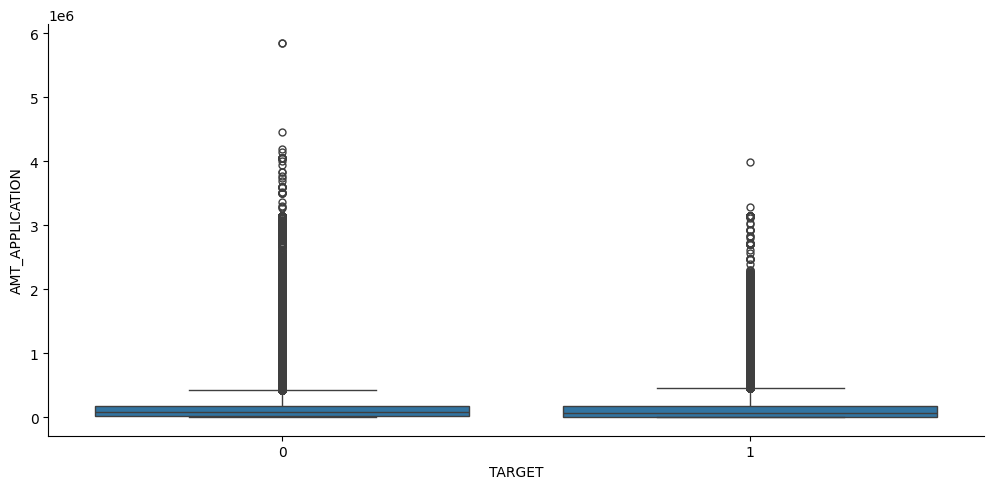

In [114]:
 box_plot_p("AMT_APPLICATION")

Observations:
Both the target types have outliers with respect to credit amount asked.
Clients of both the target types seem to have asked for the same credit amount.

 BoxPlot for AMT_CREDIT_y

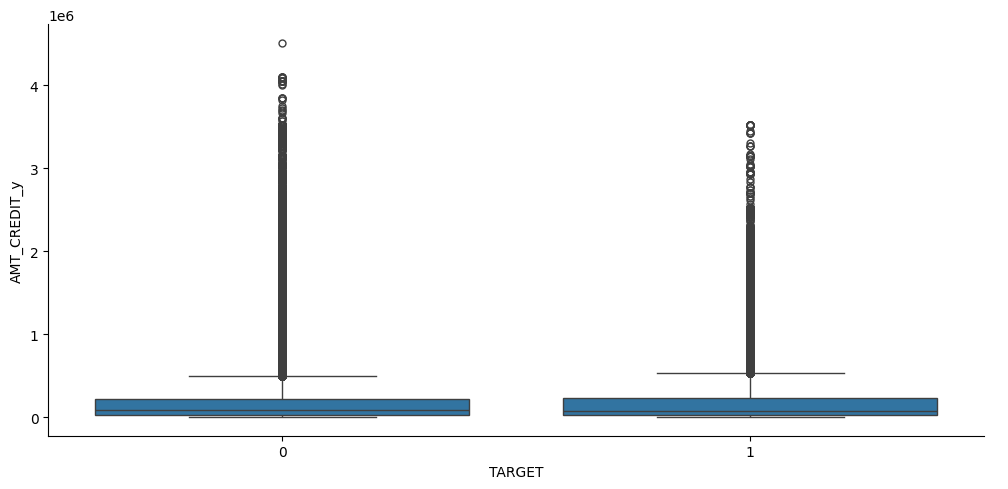

In [115]:
box_plot_p("AMT_CREDIT_y")

Both the target types have outliers with respect to credit amount offered.
Both the target types seem to have similar credit amounts offered.

BoxPlot for AMT_GOODS_PRICE_y

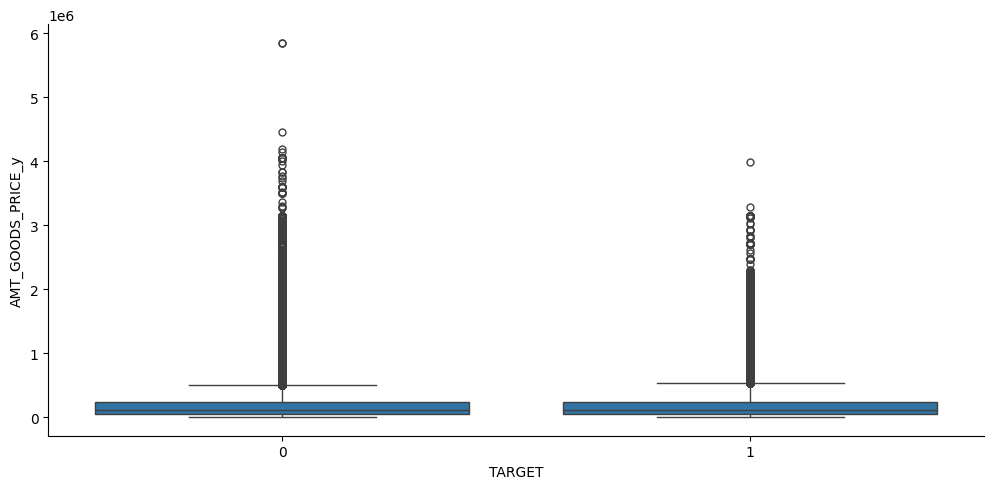

In [116]:
box_plot_p("AMT_GOODS_PRICE_y")

Observations:
Both the target types have outliers with respect to credit amount offered.
Both the target types seem to have similar credit amounts offered.

In [117]:
def bar_plot_previous(Attribute, hori=True, rot=False):
    variable = merged_data[Attribute].value_counts(normalize=True)
    
    # Fix: Apply mean only to numeric columns
    Variable_Data_Percentage = merged_data.groupby(Attribute).mean(numeric_only=True)
    
    Variable_Data_plot = Variable_Data_Percentage['TARGET']
    
    if hori:
        plt.figure(figsize=[15, 7])
        plt.subplot(1, 2, 1)
        sns.barplot(x=variable.index, y=variable.values, palette='magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation=90)    
        
        plt.subplot(1, 2, 2)
        sns.barplot(x=Variable_Data_plot.index, y=Variable_Data_plot.values, palette='magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation=90)
        plt.show()
    else:
        plt.figure(figsize=[14, 20])
        plt.subplot(2, 1, 1)
        sns.barplot(x=variable.index, y=variable.values, palette='magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of Applicants")
        if rot:
            plt.xticks(rotation=90)
        
        plt.subplot(2, 1, 2)
        sns.barplot(x=Variable_Data_plot.index, y=Variable_Data_plot.values, palette='magma')
        plt.xlabel(Attribute)
        plt.ylabel("Percentage of clients having difficulty in repaying loan")
        if rot:
            plt.xticks(rotation=90)
        plt.show()

 BarPlots for NAME_CONTRACT_TYPE_y

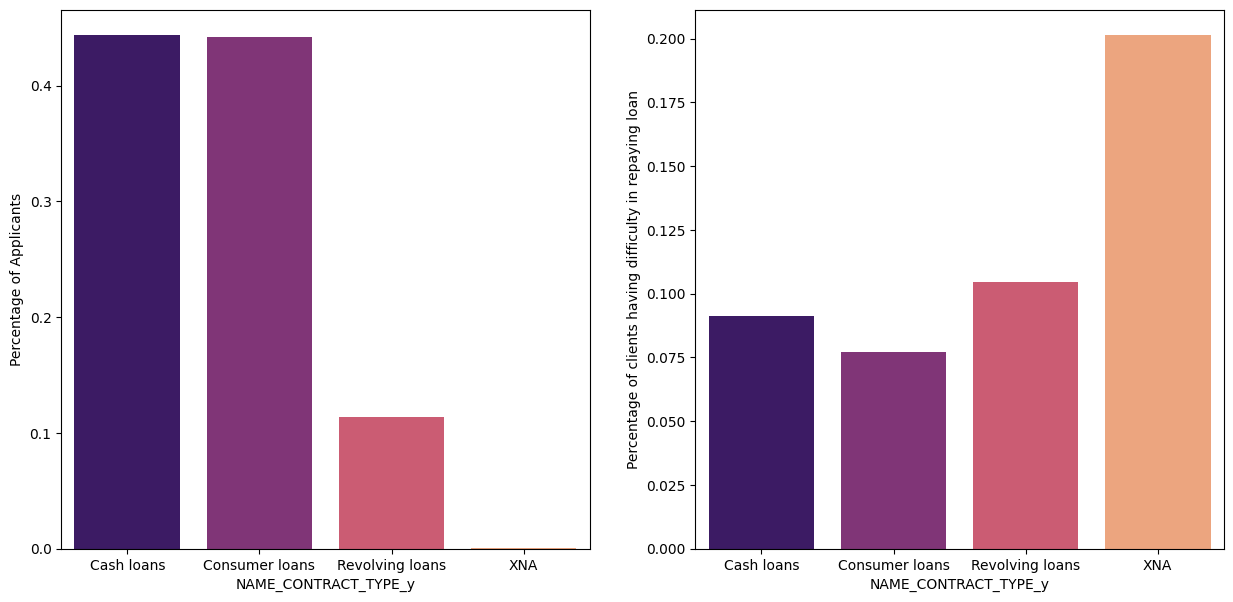

In [118]:
bar_plot_previous("NAME_CONTRACT_TYPE_y")

From the above plots the following inferences can be made:
From the previous data most of the clients have opted for cash and consumer loans (approximately 45% each) and about 10% have opted for revolving loans.
Clients who have opted for revolving loans have the highest default rate, followed by cash loans and consumer loans. Also to be noted that revolving loans category was not present in application data.

 BarPlots for NAME_CONTRACT_STATUS

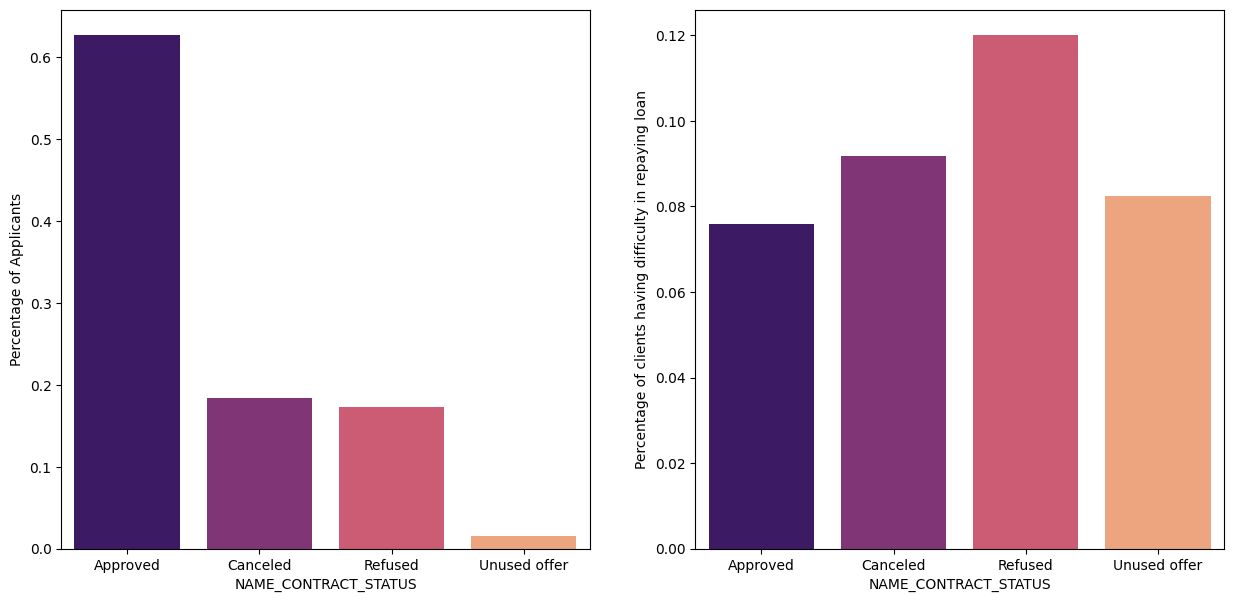

In [119]:
bar_plot_previous('NAME_CONTRACT_STATUS')

From the above plots the following inferences can be made:
Majority of the clients had their loans approved (about 60%), followed by clients who have cancelled their application (nearly 20%) followed by clients who had their applications rejected (nearly 20%).
The clients who got their applications rejected are most likely to default (about 12%), followed by clients who cancelled (around 9%), followed by clients who cancelled at different stages of the application process. As expected, the clients who had their applications approved are least likely to default.

BarPlots for NAME_CASH_LOAN_PURPOSE

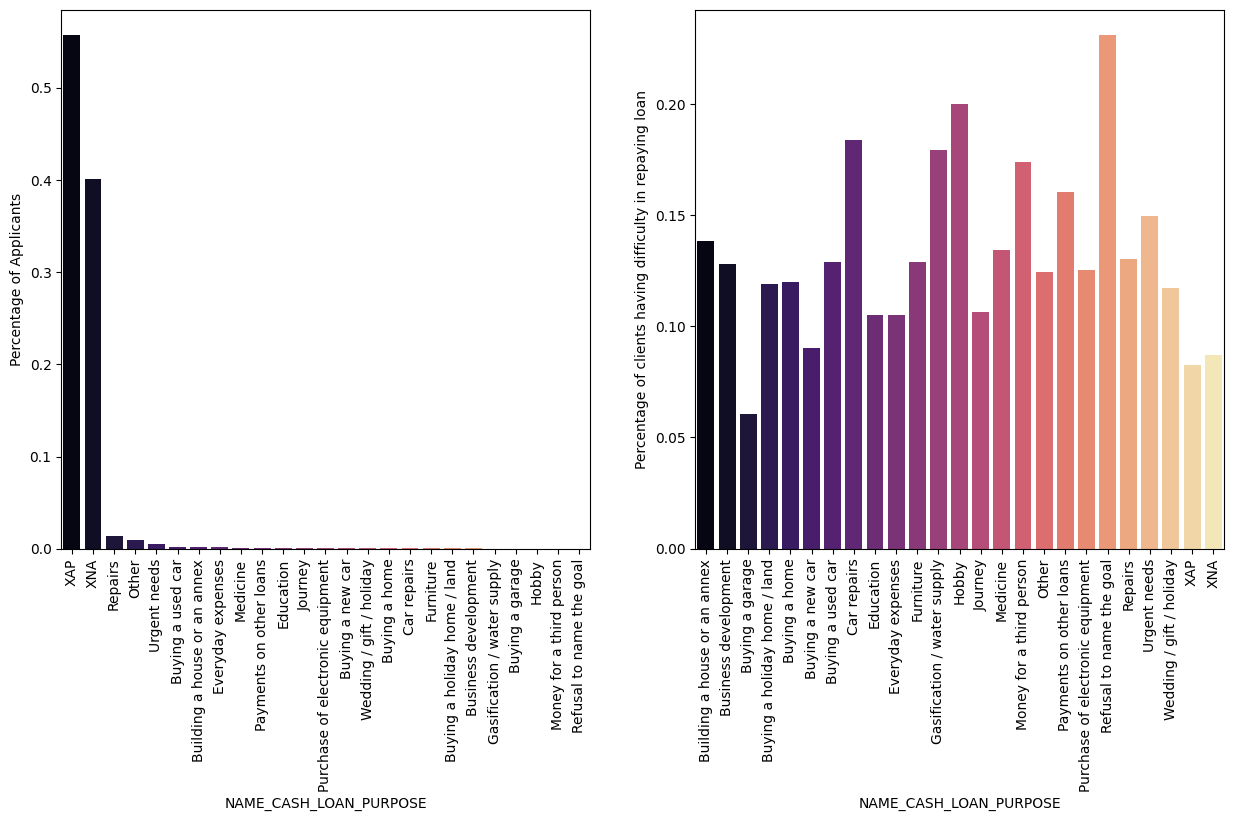

In [120]:
bar_plot_previous("NAME_CASH_LOAN_PURPOSE",rot = True)

 BarPlots for CODE_REJECT_REASON

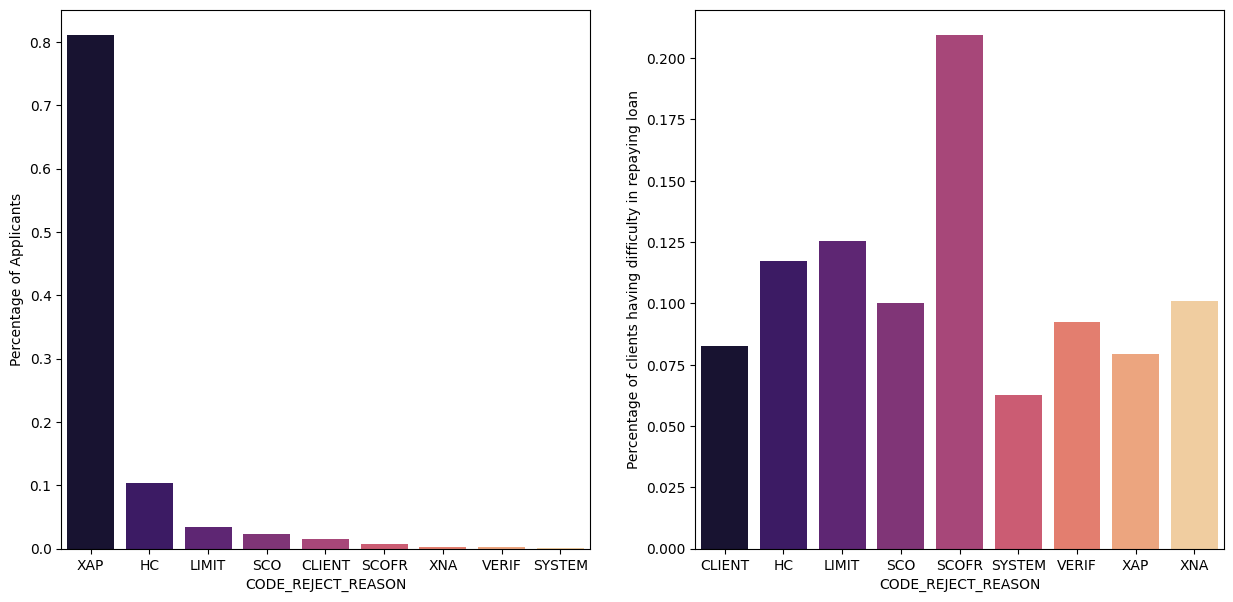

In [121]:
bar_plot_previous('CODE_REJECT_REASON')

From the above plots the following inferences can be made:
Majority of the clients belong to XAP category (approx 80%), followed by HC (approx 10%).
Clients belonging to SCOFR have the highest default rate (approx 20%), followed by Limit (approx 12.5%), followed by HC (~11%).

 BarPlots for NAME_GOODS_CATEGORY

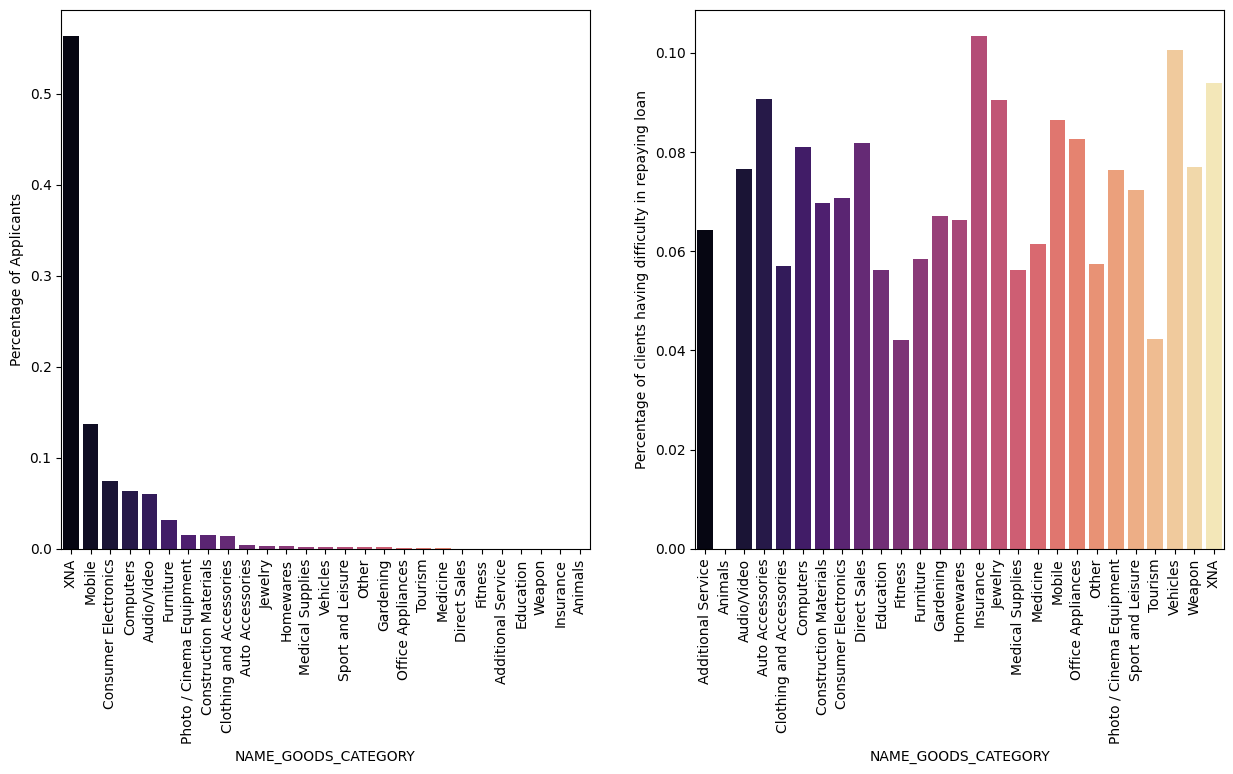

In [122]:
bar_plot_previous("NAME_GOODS_CATEGORY", rot = True)

From the above plots the following inferences can be made:
Insurance category has the highest default rate, followed by vehicles, auto accessories, jewelry.

 BarPlots for NAME_PORTFOLIO

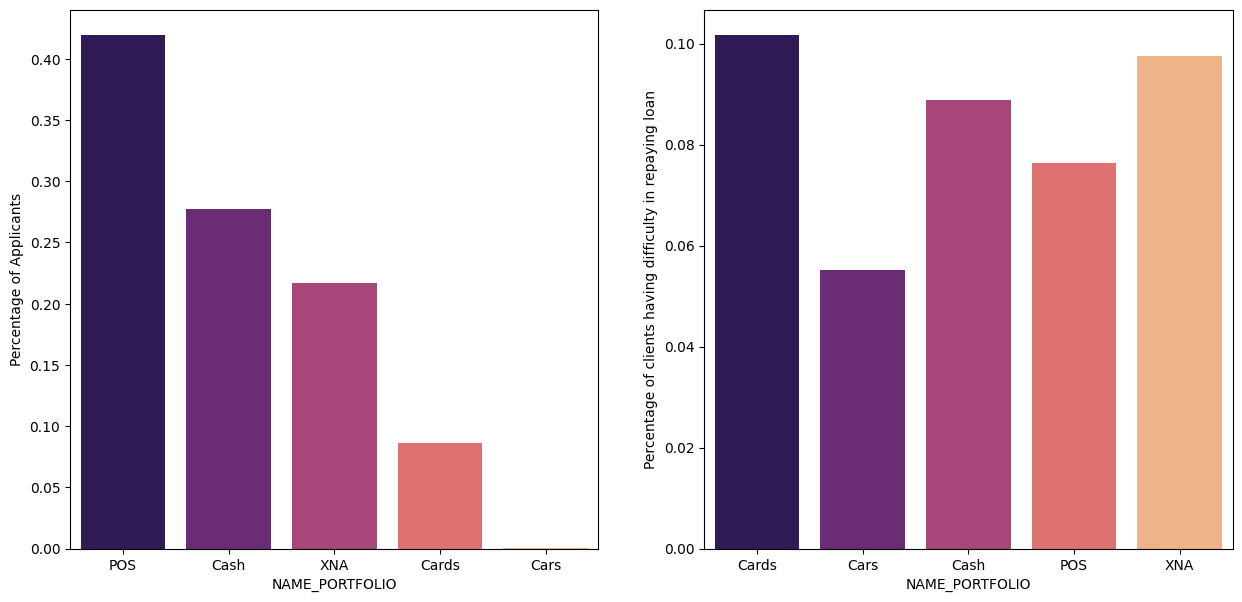

In [123]:
bar_plot_previous("NAME_PORTFOLIO")

From the above plots the following inferences can be made:
Majority of the clients have opted for POS (~40%), followed by cash (approx 26-27%) , followed by Cards etc.
Clients who have opted for Cards have the highest default rate (around 10%), followed by cash, POS etc.

BarPlots for NAME_PRODUCT_TYPE

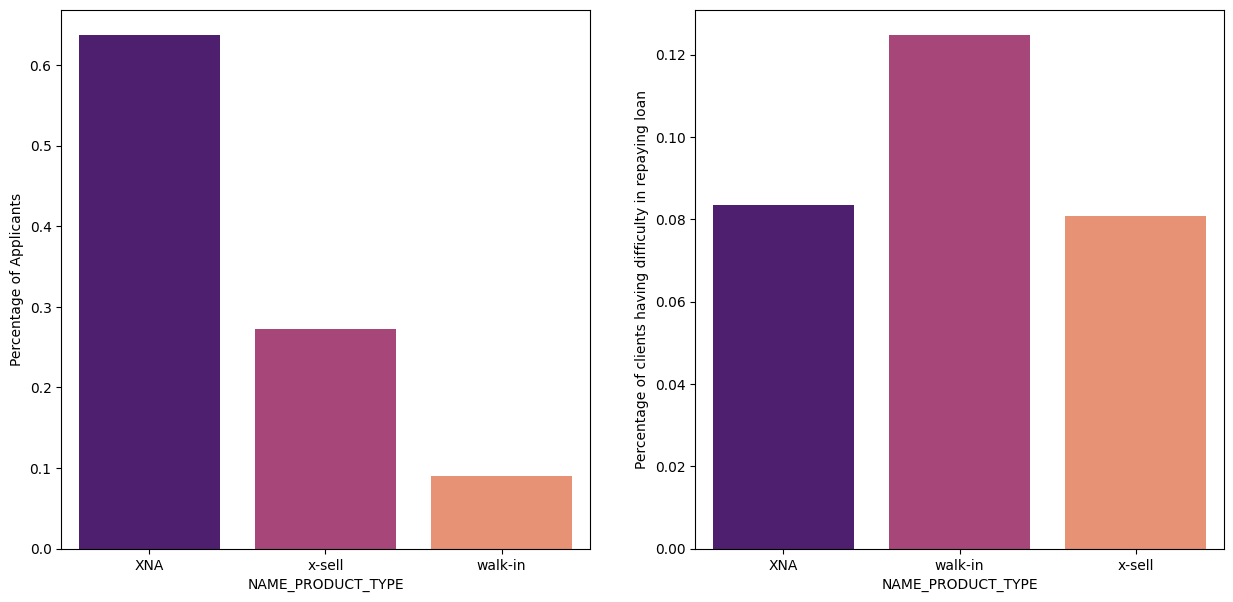

In [124]:
bar_plot_previous("NAME_PRODUCT_TYPE")

From the above plots the following inferences can be made:
Most of the clients application belong to x-sell (nearly 30%) and about 10% belong to walk in. Most of the data is not available in this case.
Clients with walk-in applications are most likely to default (approximately 12%) and cleints with x-sell applications have around 8% default rate

BarPlots for CHANNEL_TYPE

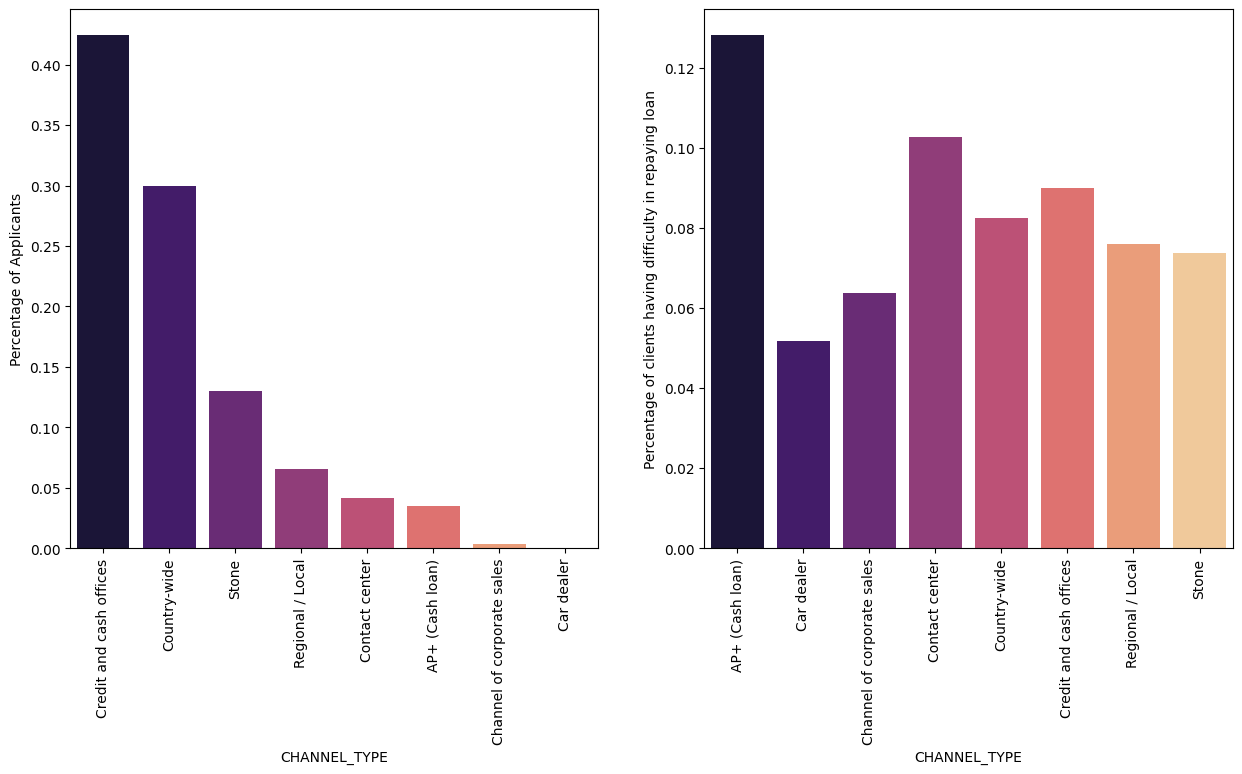

In [125]:
bar_plot_previous("CHANNEL_TYPE", rot = True)

From the above plots the following inferences can be made:
Majority of the clients were acquired from Credit and cash offices, followed by country-wide, Stone etc.
Clients acquired through AP+ have the highest default rate (approx 12%), followed by contact center ( ~10%), followed by credit and cash offices (approx 9%).

BarPlots for NAME_YIELD_GROUP

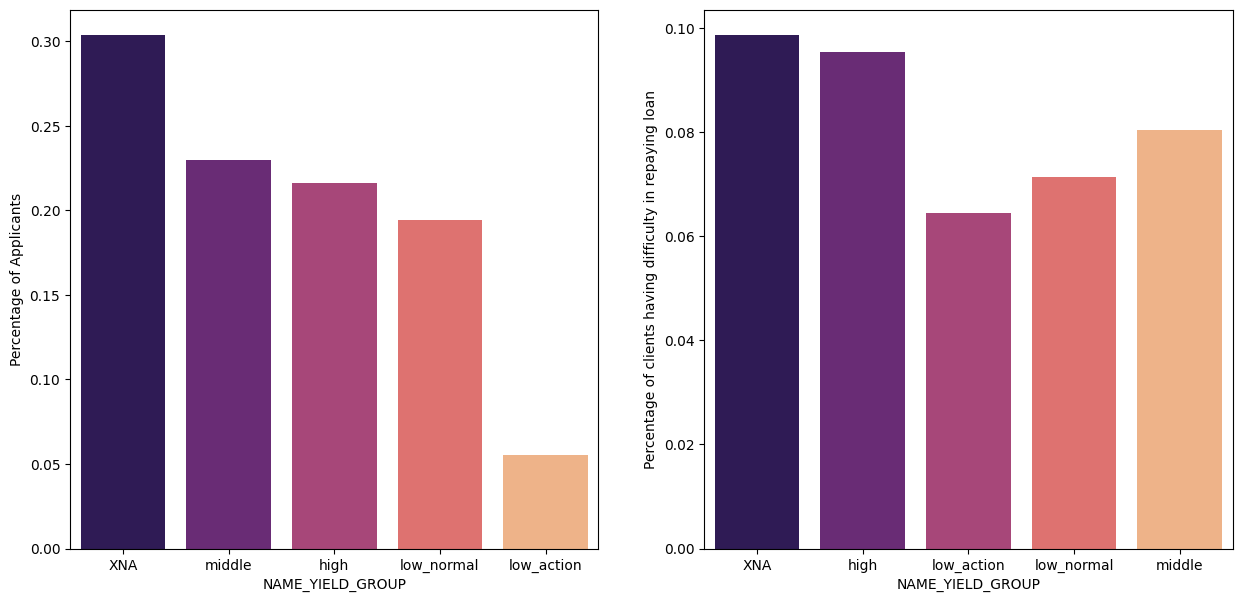

In [126]:
bar_plot_previous("NAME_YIELD_GROUP")

From the above plots the following inferences can be made:
Around 20% of the clients have middle, followed by high and low_normal interest rates.
Clients with high interest rate are most likely to default (nearly 10%), followed by middle , low_normal

In [127]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0        24700.5  ...               New              Vehicles            POS   
1        35698.5  ...          Repeater                   XNA           Cash   
2        35698.5  ...         Refreshed             Furniture            POS   
3        35698.5  ...         Refreshed  Consumer Electronics            POS   
4         6750.0  ...               New                Mobile            POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0               XNA                    Stone              500   
1            x-sell  Credit and cash offices               -1   
2               XNA                    Stone             1400   
3               XNA             Country-wide              200   
4               XNA         Regional / Local               30   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 148 columns]

In [128]:
target_p_0 = merged_data.loc[merged_data['TARGET'] == 0]
target_p_1 = merged_data.loc[merged_data['TARGET'] == 1]

In [129]:
def distribution_plot_previous(Attribute):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.distplot(merged_data[Attribute], bins= 50, kde= True, rug = True, hist = False)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    sns.distplot(target_p_0[Attribute], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
    sns.distplot(target_p_1[Attribute], bins = 50, kde = True, rug = True, hist = False, label= 'TARGET = 1')
    plt.ylabel("Frequency")
    plt.show()

 DistPlots for AMT_ANNUITY_y

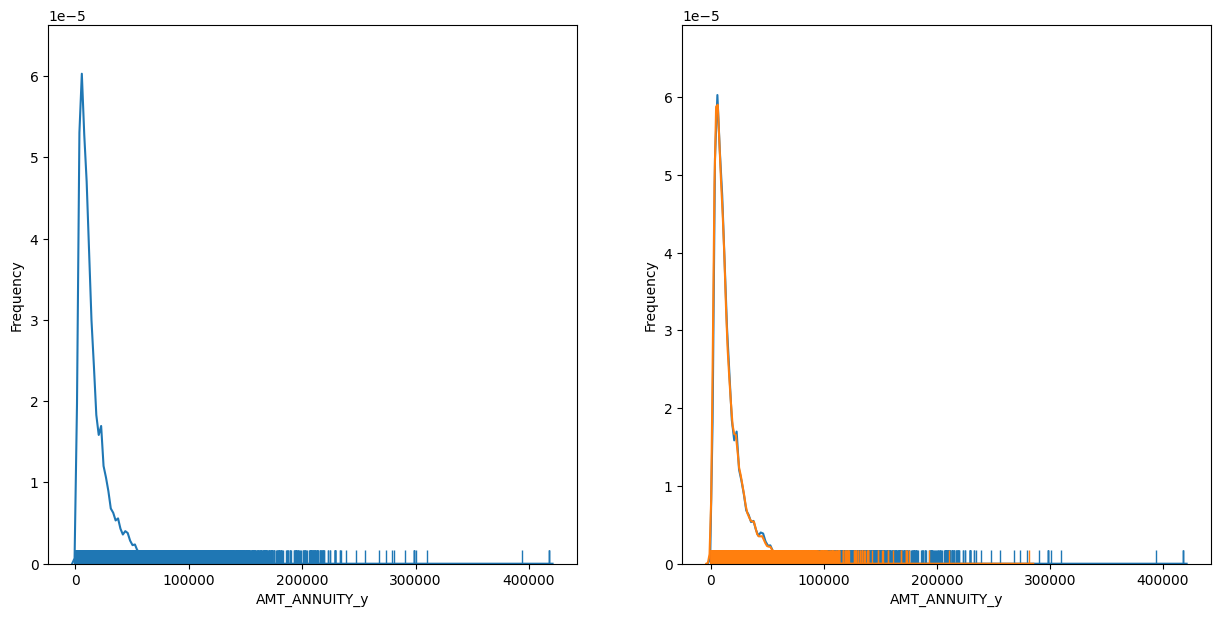

In [130]:
distribution_plot_previous("AMT_ANNUITY_y")

From the above plots the following inferences can be made:
From the previous data it is evident that the annuity is concentrated at around 10000

 DistPlots for AMT_APPLICATION

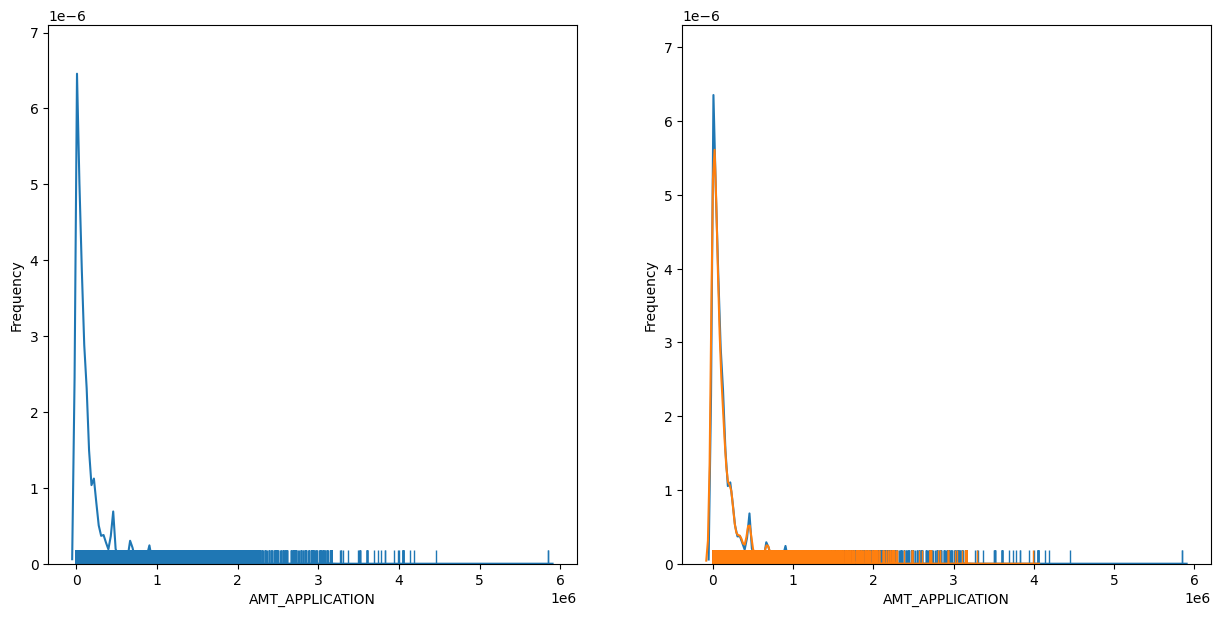

In [131]:
distribution_plot_previous("AMT_APPLICATION")

From the above plots the following inferences can be made:
The credit amount asked by clients of both target types mostly lie at around 100000.
The peak of TARGET=1 is higher than TARGET=0 which suggests there are more clients at around 100000.

DistPlots for AMT_CREDIT_y

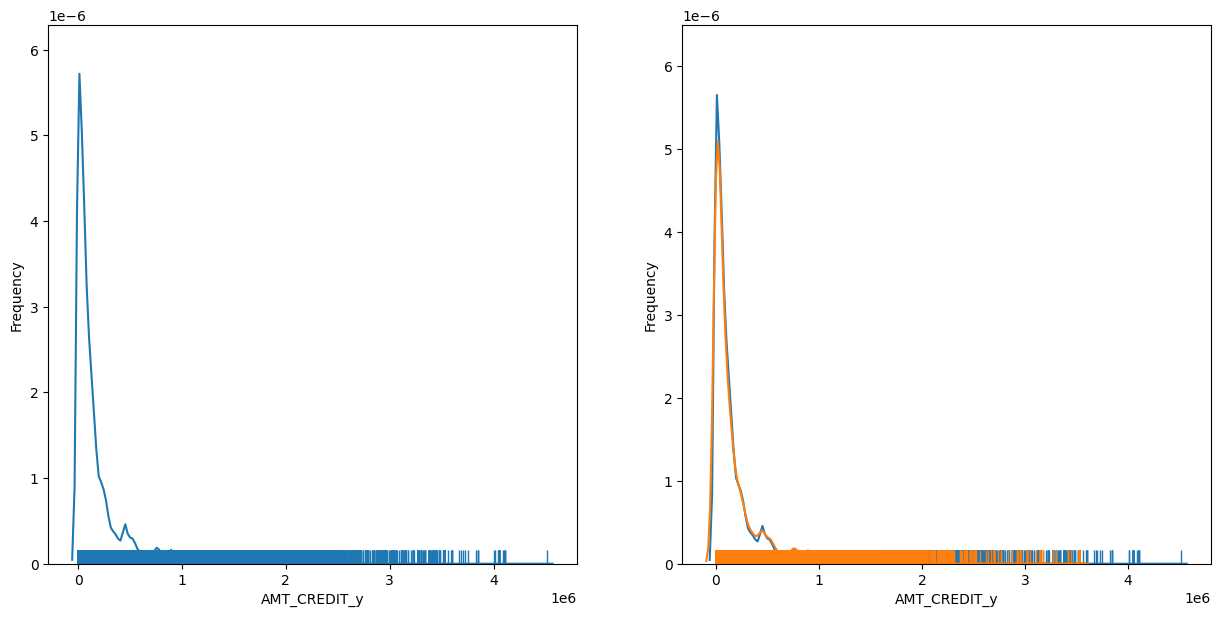

In [132]:
distribution_plot_previous("AMT_CREDIT_y")

From the above plots the following inferences can be made:
The credit amounts are concentrated at around 100000.
Both the target types have a similar distribution.

 DistPlots for AMT_GOODS_PRICE_y

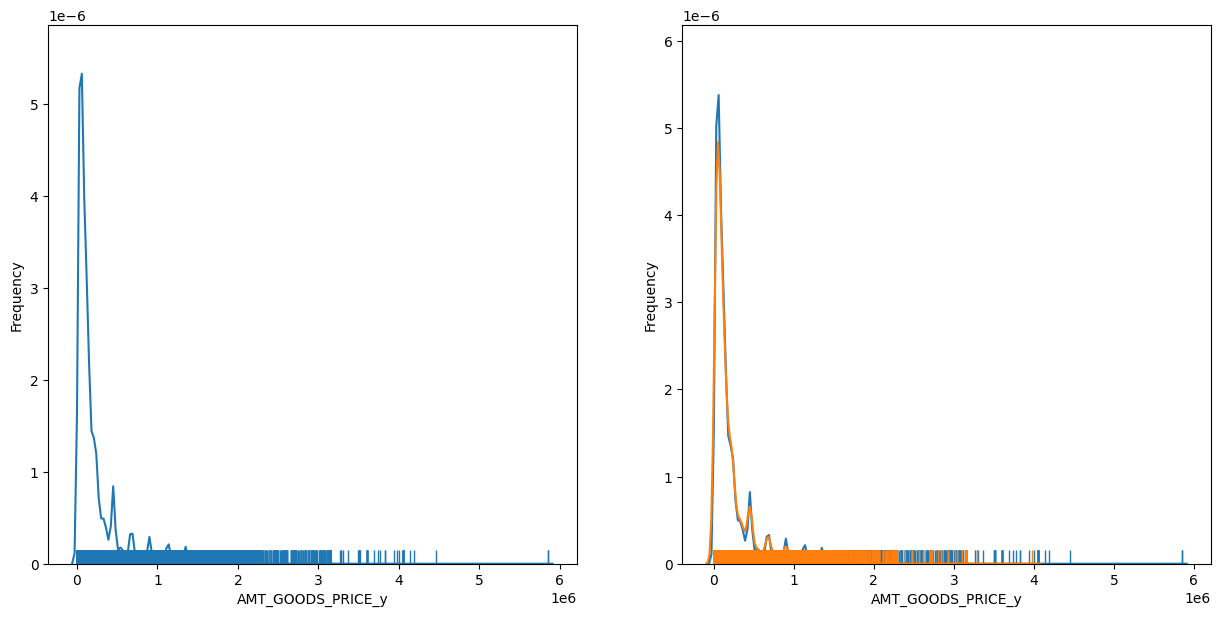

In [133]:
distribution_plot_previous("AMT_GOODS_PRICE_y")

From the above plots the following inferences can be made:
The goods price are concentrated at around 100000.
Both the target types have a similar distribution.

In [134]:
def NUMCAT_ANALYSIS_Pre(CATVAR, NUMVAR, rot = False):
    
    plt.figure(figsize=[15,7])
    if rot:
        plt.xticks(rotation = 90)
    sns.boxplot(data = merged_data, x=CATVAR, y= NUMVAR, hue = "TARGET")

BoxPlots for NAME_CONTRACT_TYPE_y vs AMT_CREDIT_y

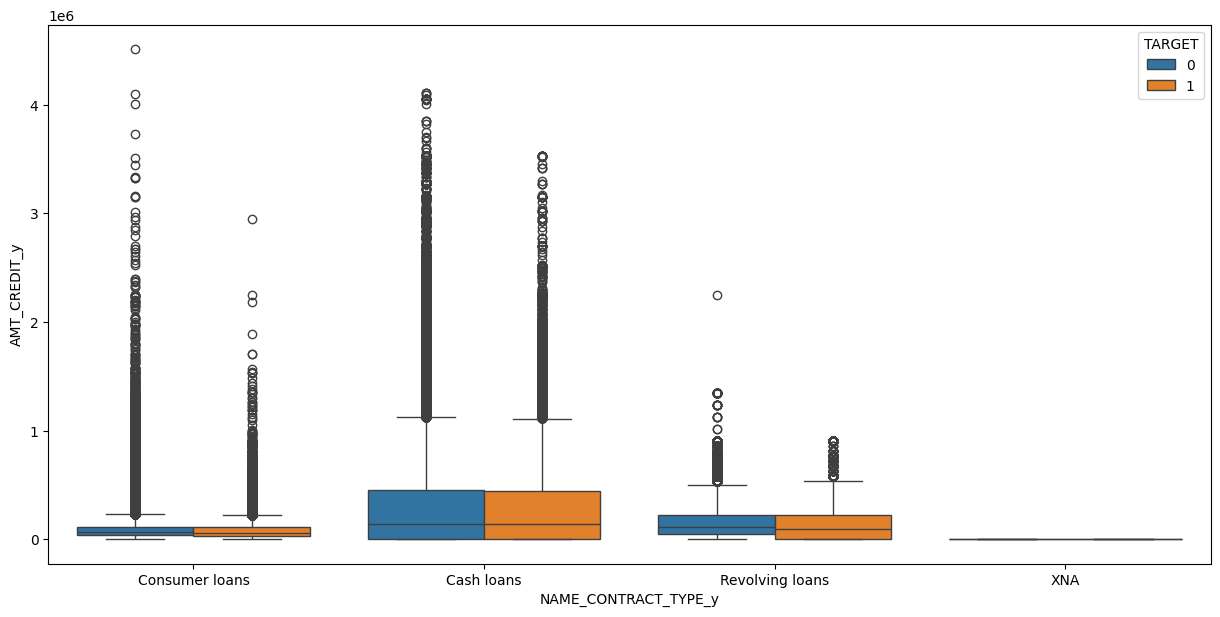

In [135]:
 NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_TYPE_y", "AMT_CREDIT_y")

From the above plots the following inferences can be made:
The clients who have opted for cash loans have higher credit amounts compared to the other 2 loan types.
All the 3 loan types seem to have a lot of outliers.

 BoxPlots for NAME_CASH_LOAN_PURPOSE vs AMT_CREDIAMT_CREDIT_y

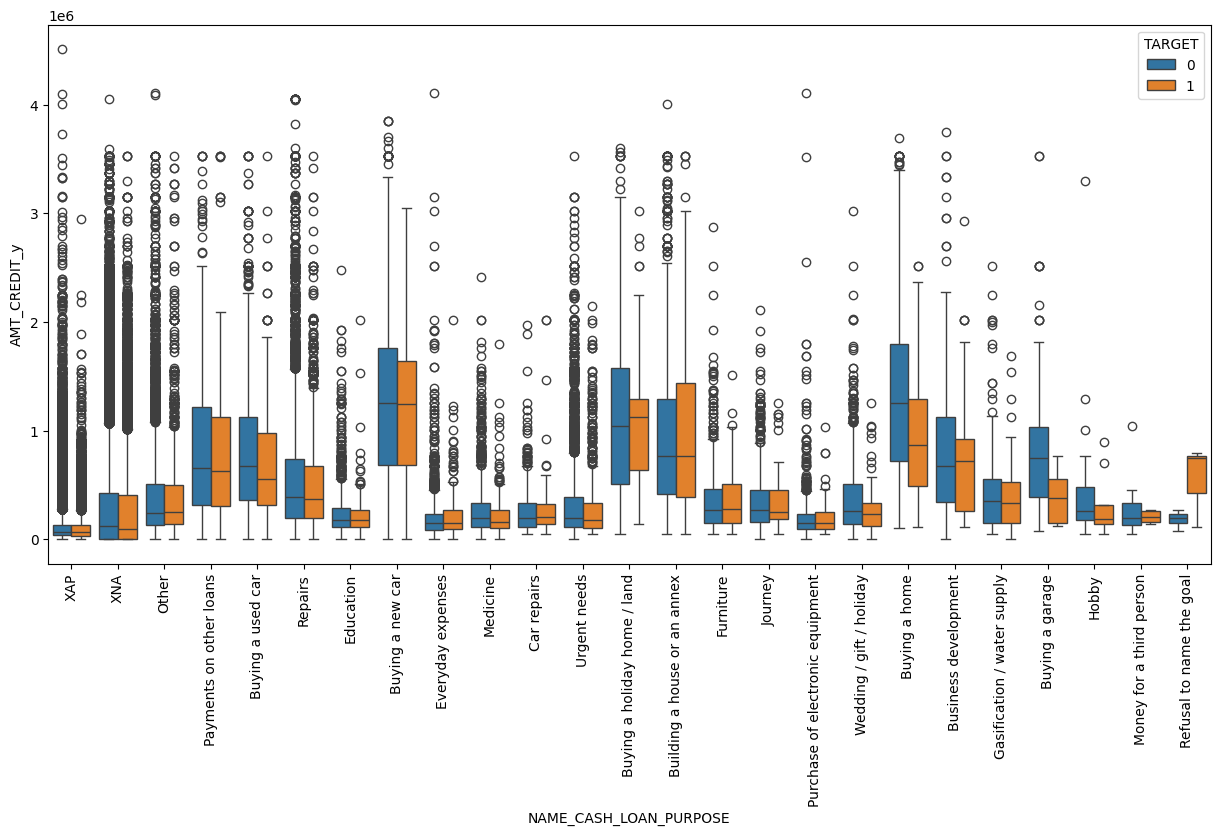

In [136]:
NUMCAT_ANALYSIS_Pre("NAME_CASH_LOAN_PURPOSE", "AMT_CREDIT_y", rot = True)

From the above plots the following inferences can be made:
The credit amounts are relatively high for buying a car, buying a holiday home/land, buying a house and buying a home.
When the clients are refusing to name the goal, they are defaulting for high credit amounts compared to non defaulters in the same category.

 BoxPlots for NAME_CONTRACT_STATUS vs AMT_CREDIT

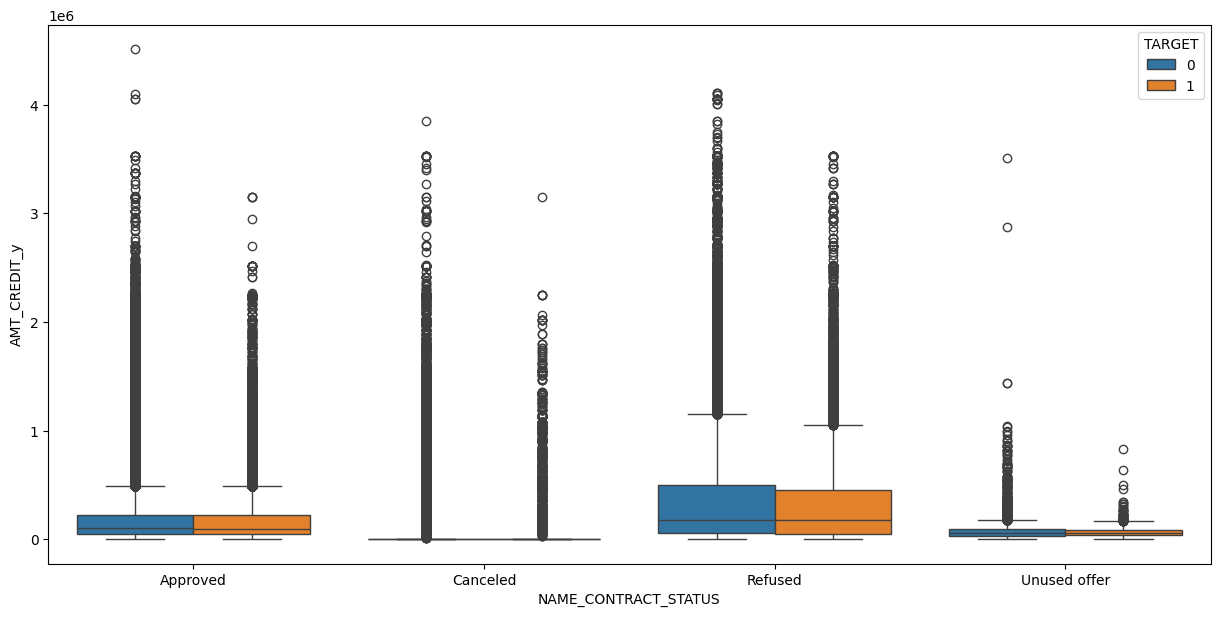

In [137]:
NUMCAT_ANALYSIS_Pre("NAME_CONTRACT_STATUS", "AMT_CREDIT_y")

From the above plots the following inferences can be made:
The loans have been refused most likely due to clients demanding high credit amounts, which is evident by the IQR being in the higher range.

BoxPlots for CODE_REJECT_REASON vs AMT_CREDIT_y

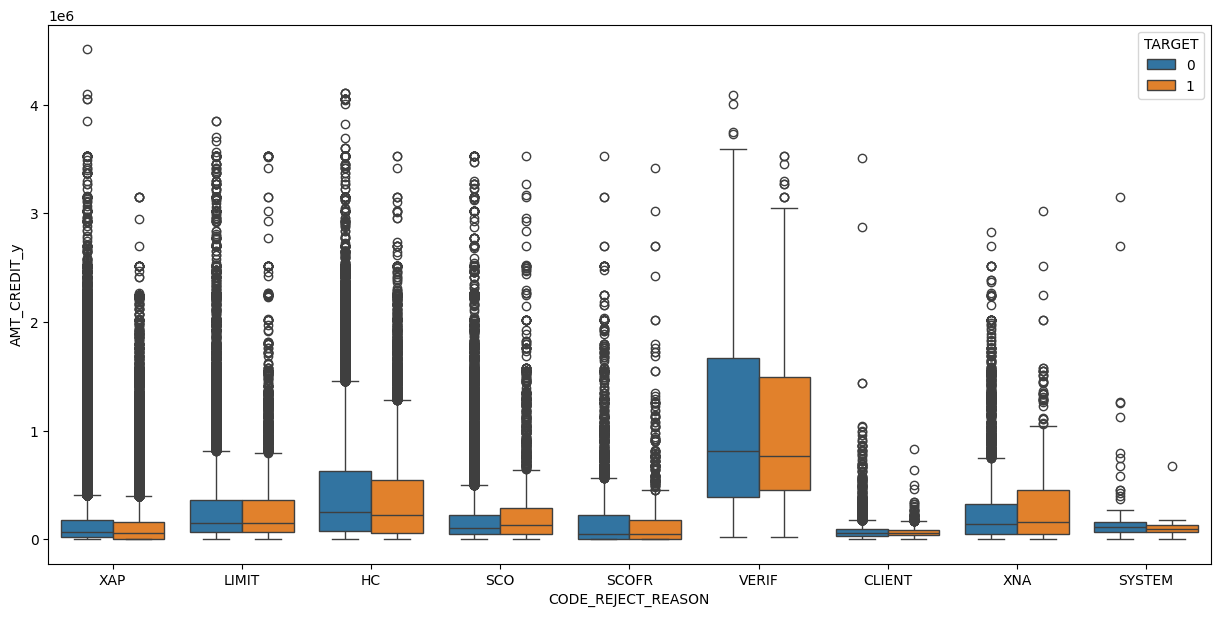

In [138]:
NUMCAT_ANALYSIS_Pre("CODE_REJECT_REASON", "AMT_CREDIT_y")

From the above plots the following inferences can be made:
The clients belonging to VERIF category have relatively high credit amount which is evident from the IQR.

 BoxPlots for NAME_CLIENT_TYPE vs AMT_CREDIT_y

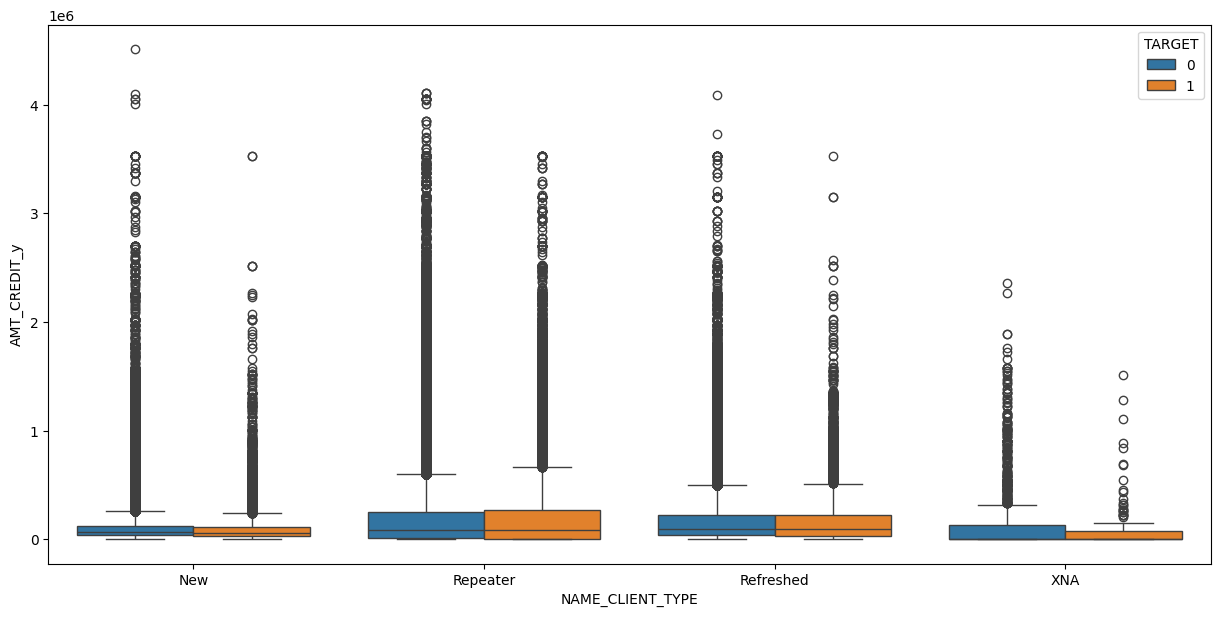

In [139]:
NUMCAT_ANALYSIS_Pre("NAME_CLIENT_TYPE", "AMT_CREDIT_y")

From the above plots the following inferences can be made:
Looks like new clients are being offered lesser credit amount when compared to old clients, comparing the IQR's.

BoxPlots for NAME_YIELD_GROUP vs AMT_CRAMT_CREDIT_yEDIT

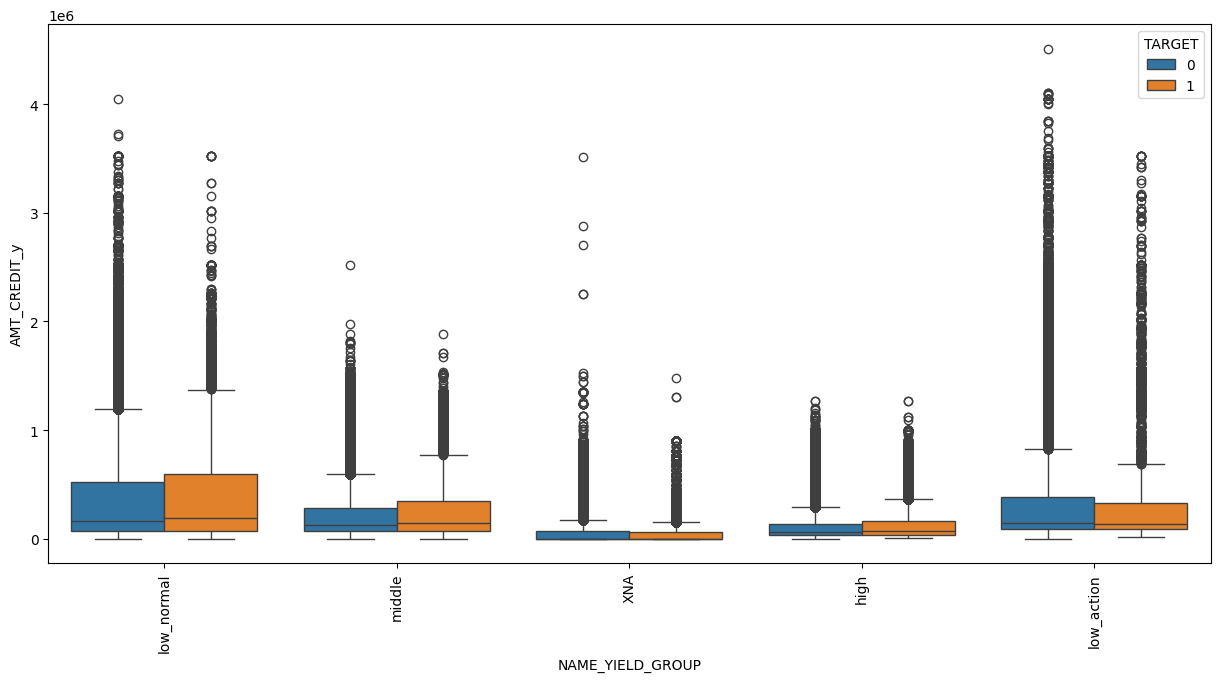

In [140]:
NUMCAT_ANALYSIS_Pre("NAME_YIELD_GROUP", "AMT_CREDIT_y", rot = True)

From the above plots the following inferences can be made:
It is evident that when the clients are offered higher credit amounts their interest rate is relatively lesser when compared to lower credit amounts.
Therefore higher the credit amount lesser is the interest rate.

In [141]:
LIST_P = ["NAME_CONTRACT_TYPE_x", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY","NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "NAME_CLIENT_TYPE","NAME_YIELD_GROUP", "CNT_CHILDREN"]

In [142]:
def CAT_CAT_ANALYSIS_Prev(LIST_P, rot = False):
    for i in range(1, len(LIST_P)):
        res = pd.pivot_table(data = merged_data, index = LIST_P[i], columns= 'NAME_CONTRACT_STATUS', values = "TARGET")
        plt.figure(figsize=[20,100])
        plt.subplot(len(LIST_P), 1, i)
        plt.subplots_adjust(hspace= 0.5)
        sns.heatmap(data = res, annot = True, cmap = "coolwarm")
        if rot:
            plt.xticks(rotation = 90)
        plt.show()

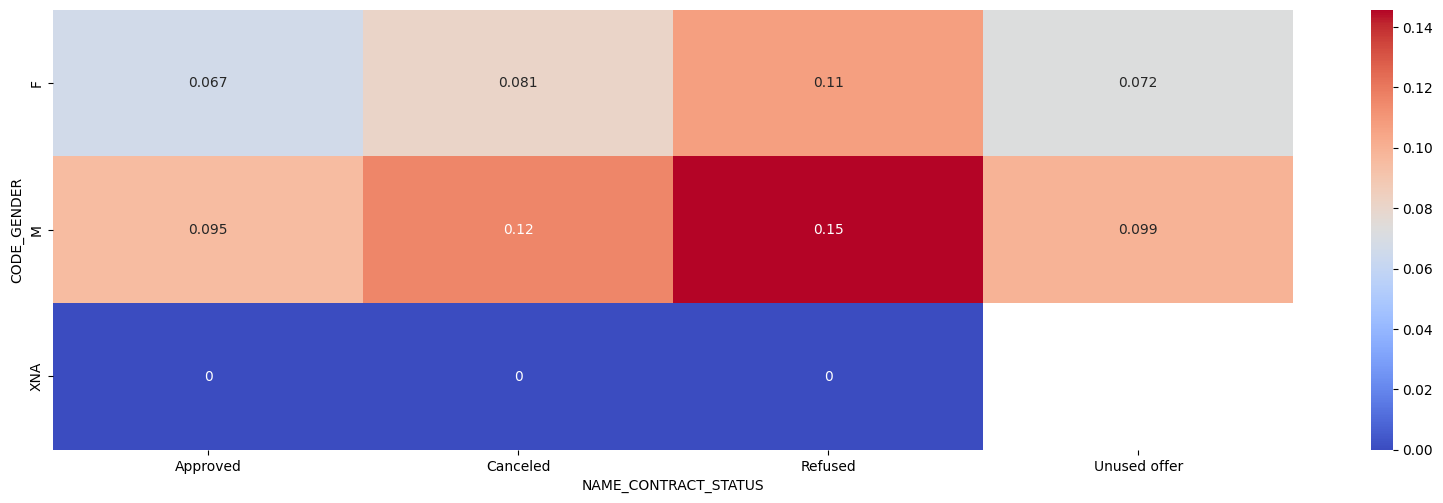

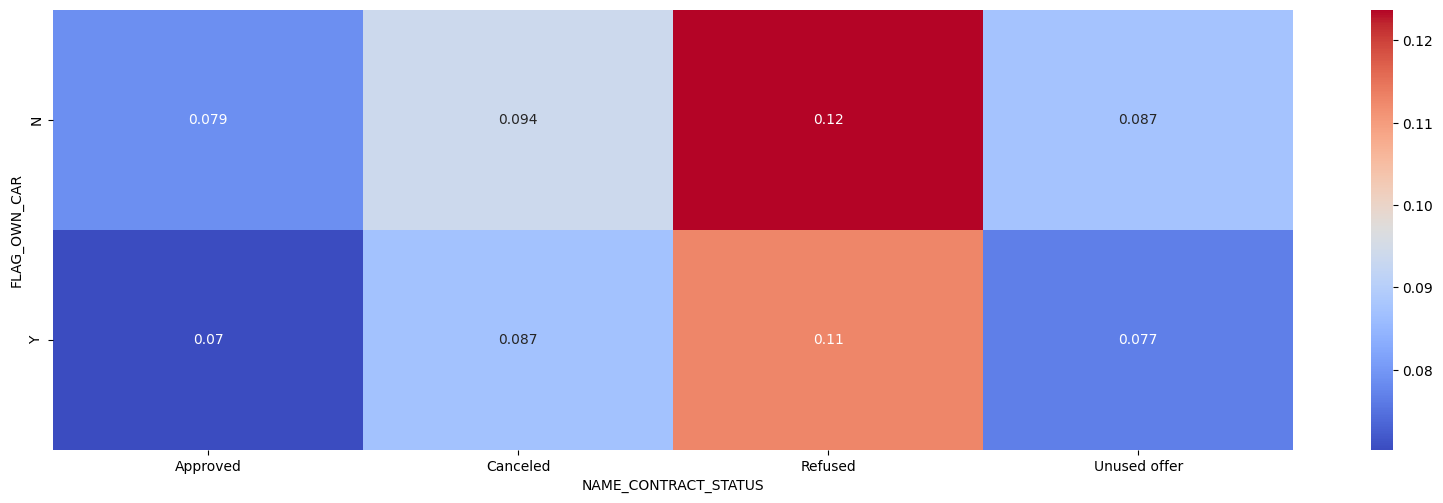

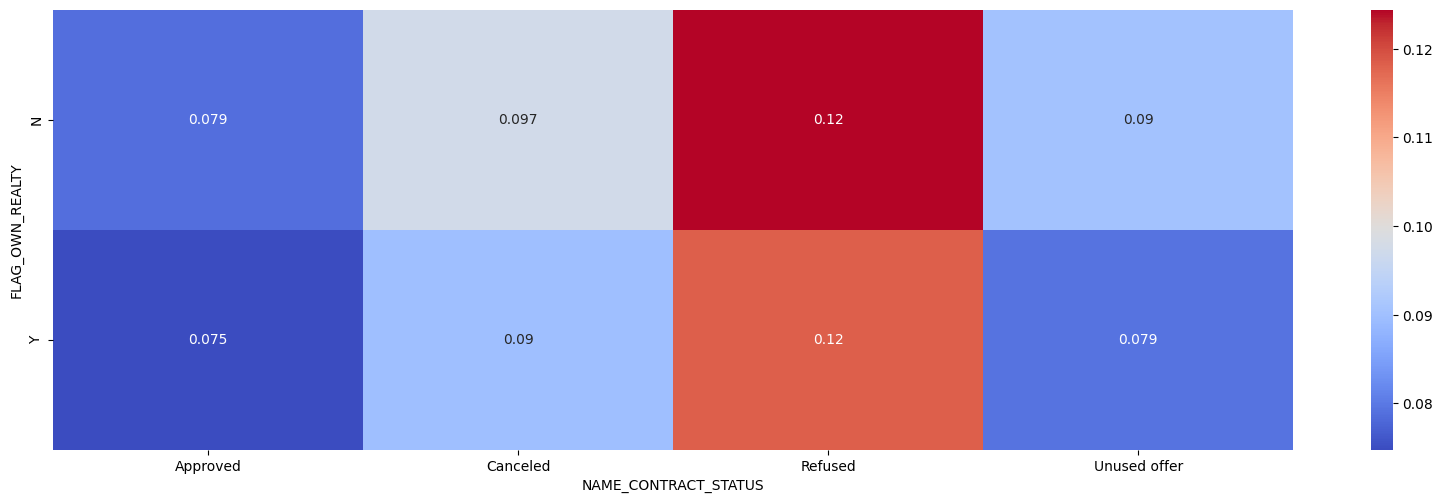

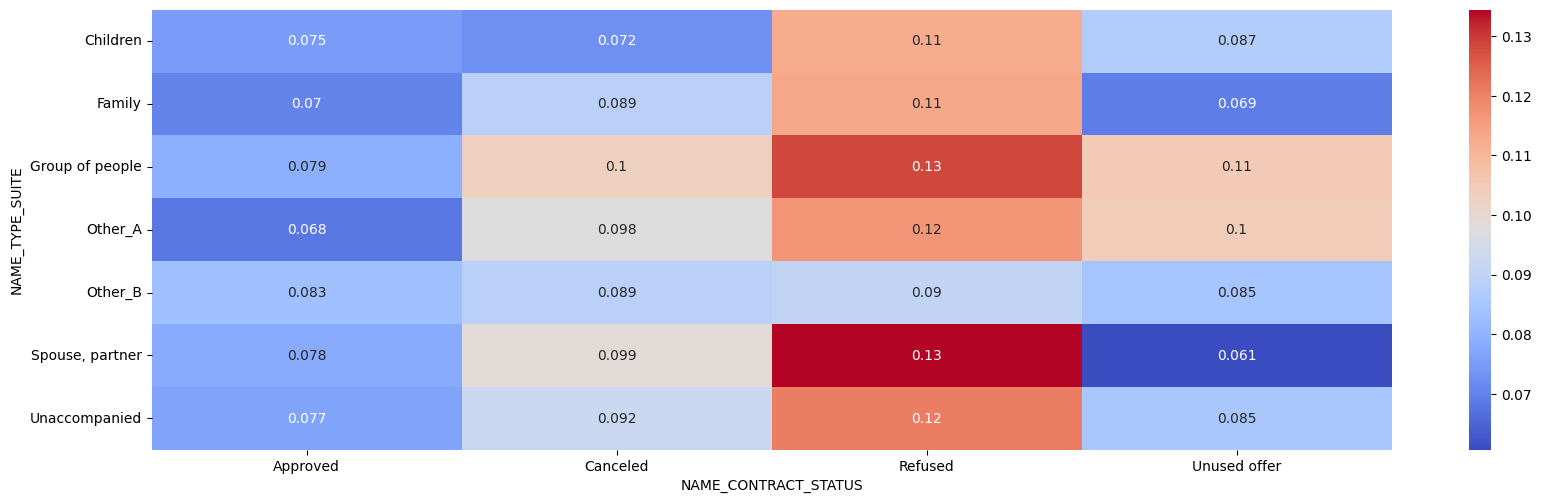

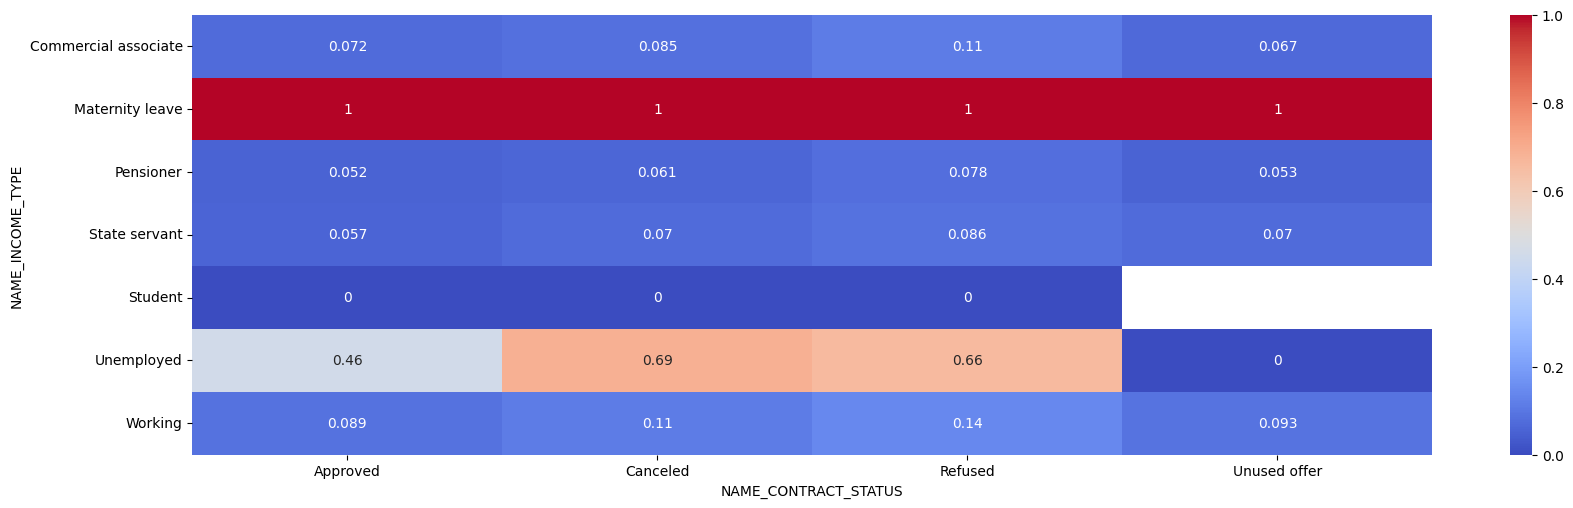

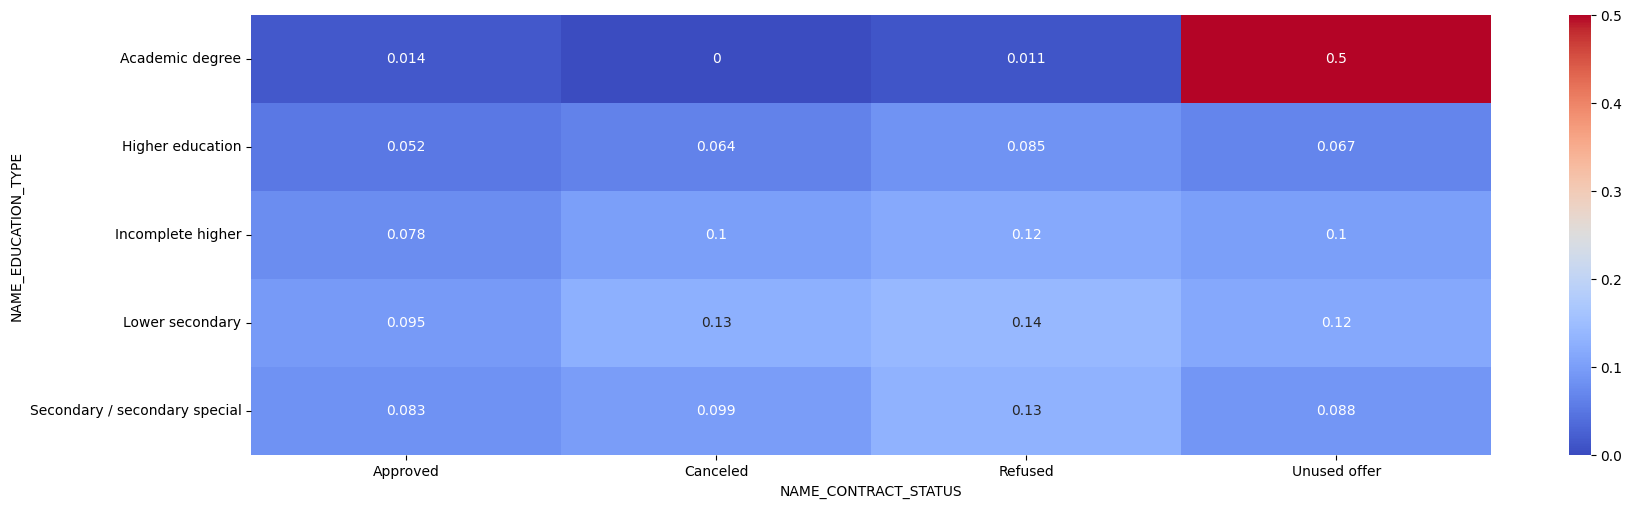

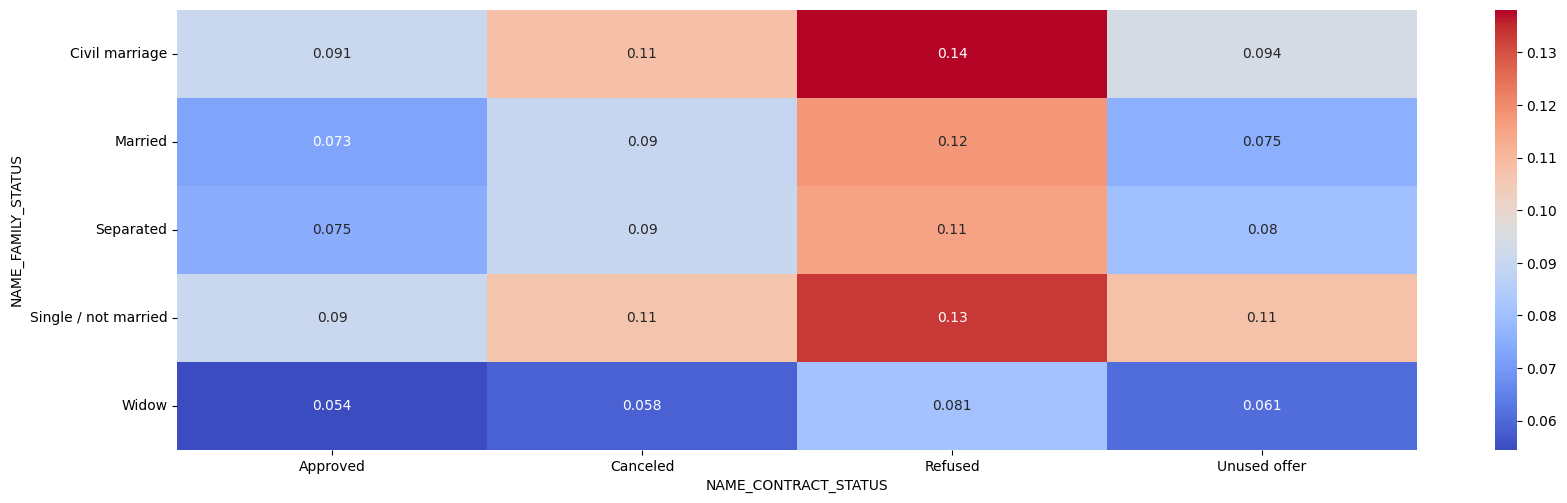

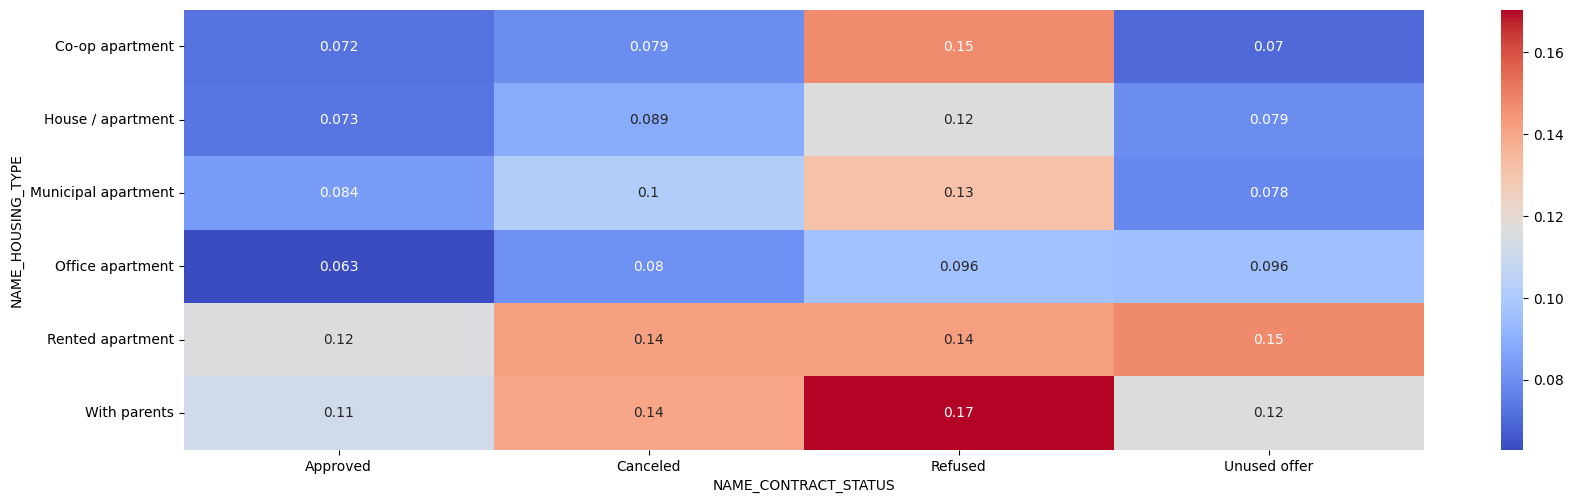

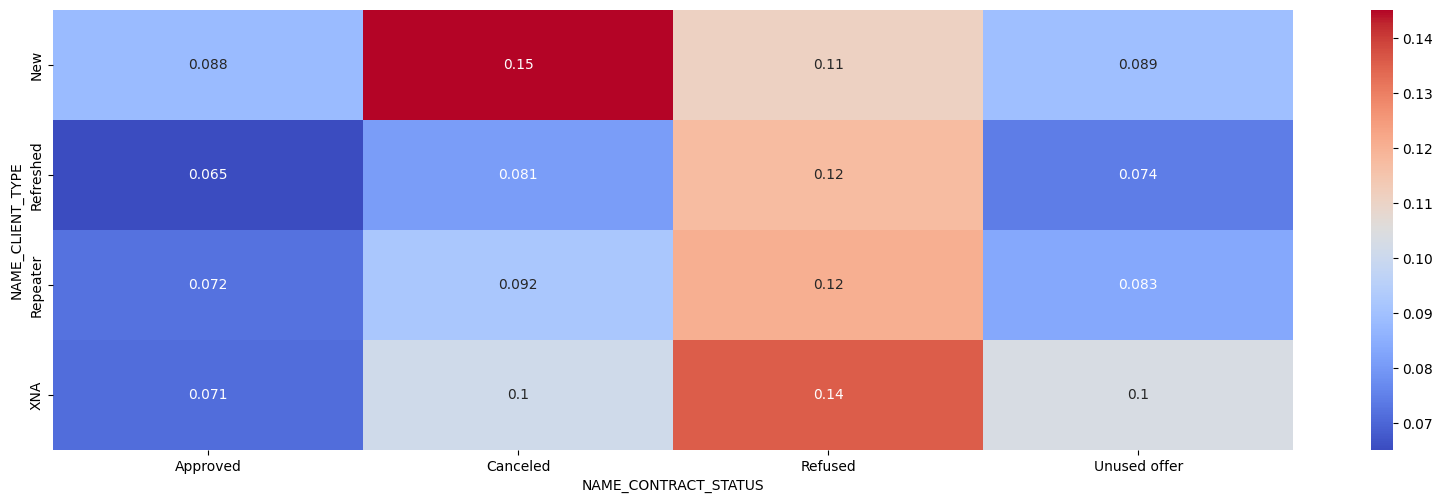

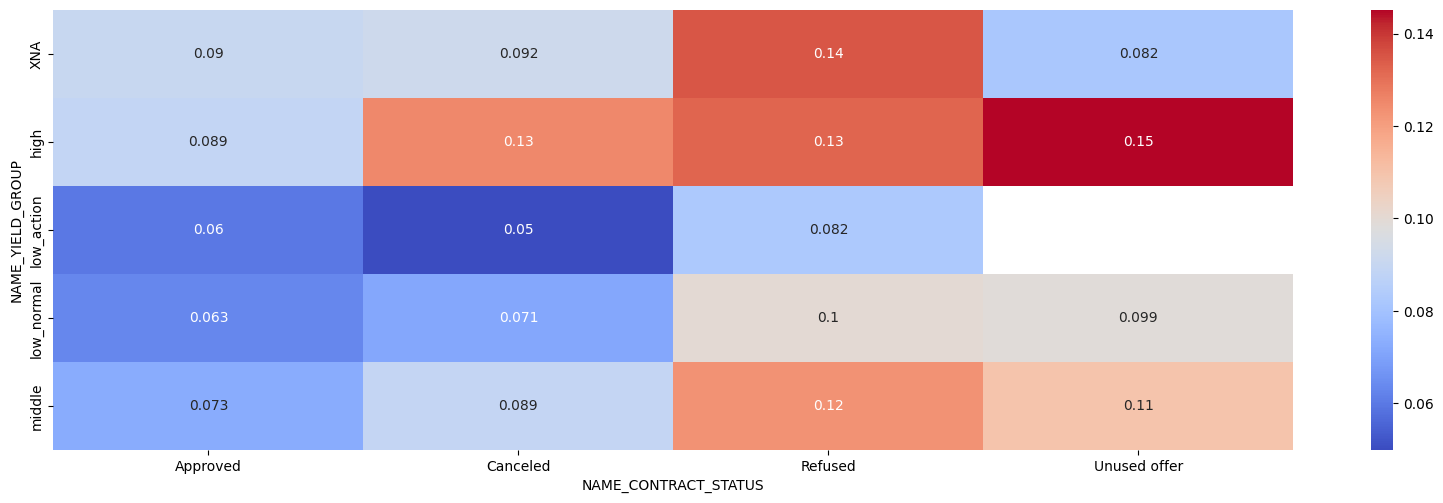

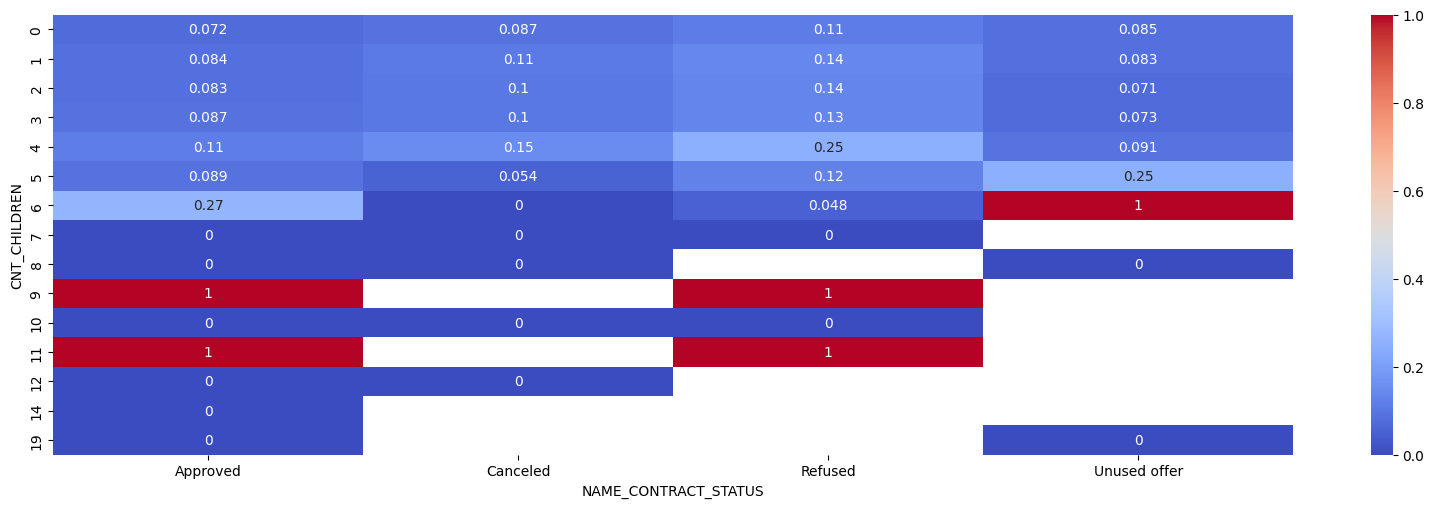

In [143]:
CAT_CAT_ANALYSIS_Prev(LIST_P)

We have plotted the above heatmaps to analyse the contract status which is available in previous data against important categorical variables, following are the inferences

A male client whose contract status is Refused is more likely to default.
In general clients whose contract status is refused is more likely to default.
Clients who are on maternity leave are more likely to default irrespective of Contract status
Unemployed clients whose contract status is refused or cancelled are more likely to default.
Clients who have an academic degree whose contract status is unused offer are more likely to default.
Clients whose contract status is Refused are more liekly to default irrespective of family status, except widows.
Clients who are staying with parents whose contract status is refused are more likely to default.
New clients having contract status 'Cancelled' are more likely to default.
Clients who have high interest rate for their loans and having contract status 'Unused offer' are more likely to default.
The clients with 6 children and unused offer are most likely to default, as we saw before the clients with 9 or 11 children have the highest default rate.
Clients who have more number of children are more likely to default irespective of contract status.
Clients who are Realty agents and accompanied by a group of people while applying for the loan are most likely to default.

Conclusions:

Clients to avoid:
In general clients who are on maternity leave are more likely to default.
In general clients who are unemployed are more likely to default.
In general clients who have relatively more number of children are more likely to default.
Unemployed Male clients who have opted for Cash loans/ having relatively more number of children are more likely to default.
Clients who have lower-secondary education/ living in a rented apartment/ with parents are more likely to default.
Male Clients who are relatively younger / low-skilled labourers / having more number of family members are more likely to default.
Clients to look for:
Clients who have opted for Revolving loans are less likely to default.
Clients with contract status 'Approved' are less likely to default irrespective of other variables.
Clients who are businessmen or students are less likely to default.
Clients with an academic degree are less likely to default.
Clients living in an office apartment are less likely to default.